In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# モジュールのインポート
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys

In [4]:
# 自作モジュール
sys.path.append("../src")
import dataloader
import module_extraction
from module_extraction import Filters, Modules
import anomaly_detection
from anomaly_detection import HotspotDetectors, AnomalyTypeClassifier
import utils

分析対象の指定

In [5]:
input_img_path = "../images/ortho/1466.tif"
#input_img_path = "../images/ortho/1391.tif"
input_dir_path = "../outputs/"+input_img_path.split("/")[-1][:-4]
print(input_dir_path)

../outputs/1466


画像データの取得

In [6]:
img_org = cv2.imread(input_img_path, 0)

In [7]:
thermal_img_files = dataloader.get_img_files(dir_path=input_dir_path+"/modules",gray=False)

モジュール情報の取得

In [8]:
import pickle
with open(input_dir_path+'/module_contours.pkl', 'rb') as pkl:
    module_contours = pickle.load(pkl)
with open(input_dir_path+'/module_labels_split.pkl', 'rb') as pkl:
    module_labels = pickle.load(pkl)

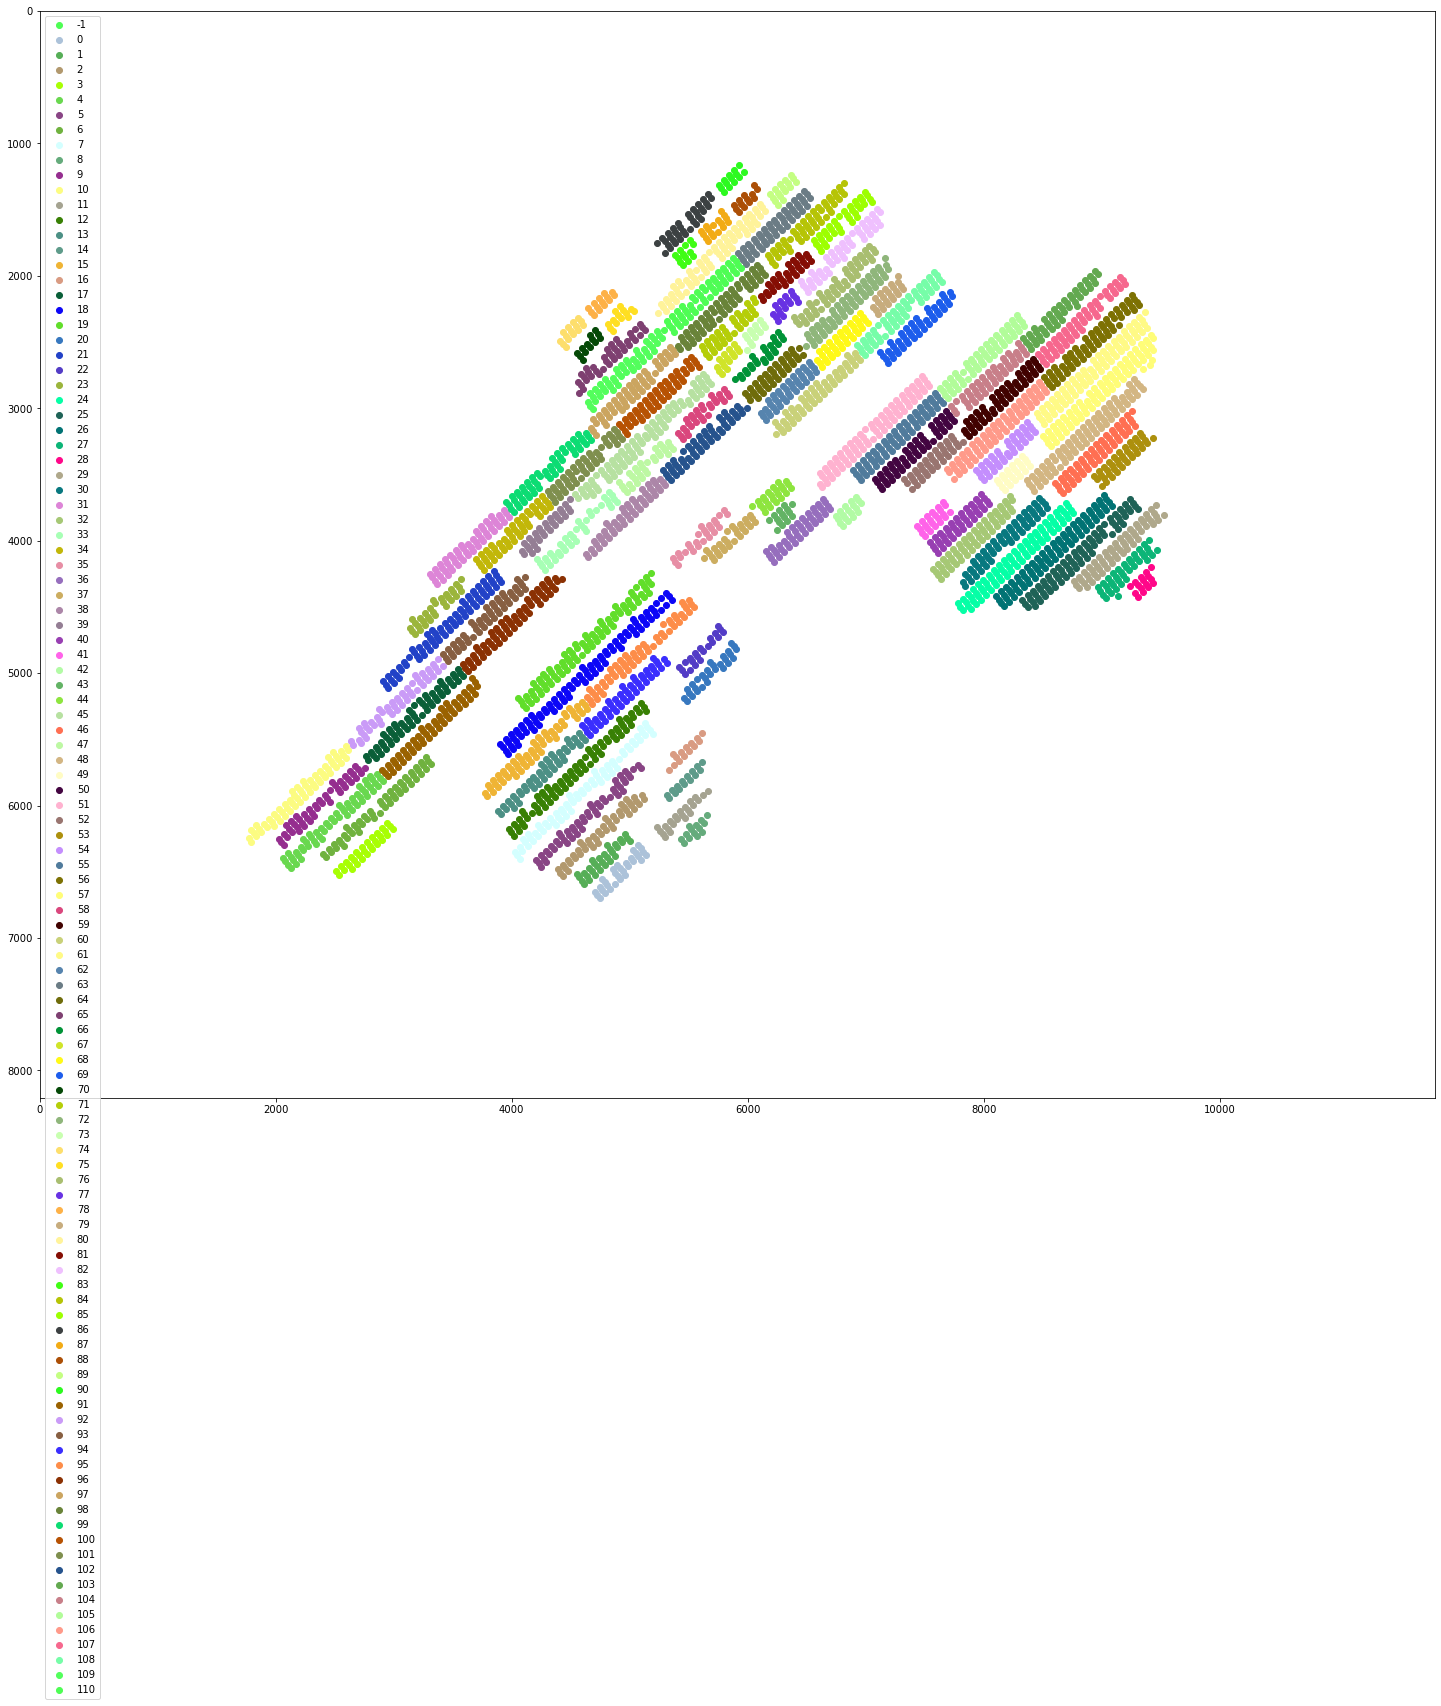

In [9]:
module_extraction.plot_module_map_with_labels(img_org, module_contours, module_labels)

温度データの取得

In [10]:
%%time
# This part requires expensive calculations
thermal_data = dataloader.get_thermal_data(thermal_img_files, module_labels) # group

100%|██████████| 111/111 [09:08<00:00,  4.94s/it]

CPU times: user 38min 31s, sys: 2min 57s, total: 41min 29s
Wall time: 9min 8s


ホットスポット検出モデルの学習

In [11]:
detectors = HotspotDetectors()

In [12]:
%%time
detectors.fit(thermal_data, module_labels)

100%|██████████| 111/111 [00:13<00:00,  8.39it/s]

CPU times: user 13.1 s, sys: 411 ms, total: 13.5 s
Wall time: 13.6 s


In [13]:
classifier = AnomalyTypeClassifier(detectors)

In [14]:
# -- check outliers (blue plots) --
#detectors.check_pred_labels(thermal_data, module_labels, anomodels.lof, anomodels.isof)

異常検知の実行

In [15]:
list_anomaly_modules = [
    "172.jpg", 
    "300.jpg",                 
    "717.jpg",         
    "877.jpg",     
    "900.jpg",         
    "1248.jpg",             
    "1397.jpg",                 
    "1531.jpg",         
    "1638.jpg",     
    "1705.jpg",         
    "1955.jpg",     
    "3237.jpg",             
    "4036.jpg",         
    "4517.jpg",             
    "4908.jpg",             
]

63.jpg Normal
823.jpg Normal
4217.jpg Normal
3578.jpg Normal
2666.jpg Normal
5109.jpg Junction-Box-Error
2100.jpg Normal
4571.jpg Normal
1409.jpg Normal
189.jpg Normal
2114.jpg Normal
4565.jpg Normal
4203.jpg Normal
2672.jpg Normal
77.jpg Normal
837.jpg Normal
2882.jpg Normal
3544.jpg Normal
5135.jpg Normal
1353.jpg Normal
1435.jpg Normal
3222.jpg Normal
2128.jpg Normal
3236.jpg Normal
4559.jpg Junction-Box-Error
1421.jpg Normal
1347.jpg Normal
2896.jpg Normal
3550.jpg Normal
5121.jpg Normal
638.jpg Normal
2869.jpg Normal
1390.jpg Normal
604.jpg Normal
2699.jpg Normal
2841.jpg Normal
3587.jpg Normal
162.jpg Normal
176.jpg Normal
2855.jpg Normal
3593.jpg Normal
88.jpg Normal
610.jpg Normal
1384.jpg Normal
4773.jpg Normal
2302.jpg Normal
2464.jpg Normal
4015.jpg Normal
1179.jpg Normal
2470.jpg Normal
4001.jpg Normal
4767.jpg Normal
3008.jpg Normal
2316.jpg Normal
3020.jpg Normal
4997.jpg Normal
1637.jpg Normal
1151.jpg Normal
2458.jpg Normal
3746.jpg Normal
4029.jpg Normal
3752.jpg Norma

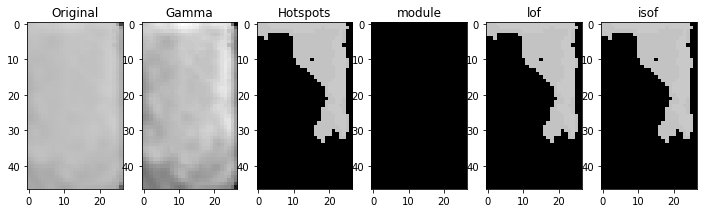

2538.jpg Normal
1031.jpg Normal
1757.jpg Normal
3140.jpg Normal
228.jpg Normal
1964.jpg Normal
3815.jpg Normal
3801.jpg Normal
1970.jpg Normal
4808.jpg Normal
214.jpg Normal
1780.jpg Normal
1958.jpg Normal
3197.jpg Normal
4820.jpg Normal
2289.jpg Multi-Hotspots


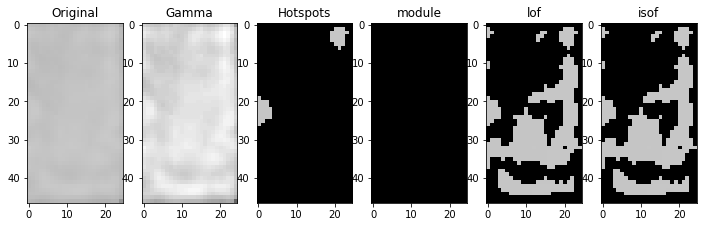

3829.jpg Normal
572.jpg Normal
566.jpg Normal
3183.jpg Normal
4834.jpg Normal
1794.jpg Normal
200.jpg Normal
957.jpg Normal
2712.jpg Normal
4363.jpg Normal
4405.jpg Normal
2074.jpg Normal
1569.jpg Normal
4411.jpg Normal
2060.jpg Normal
5069.jpg Normal
2706.jpg Normal
3418.jpg Single-Hotspot


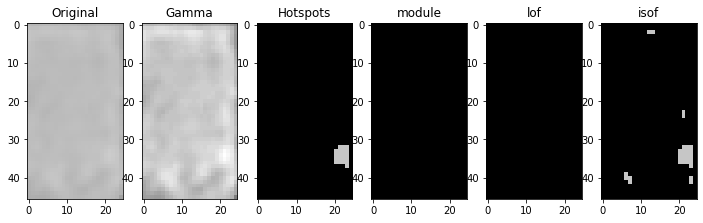

4377.jpg Normal
943.jpg Normal
5041.jpg Normal
3430.jpg Normal
1227.jpg Normal
1541.jpg Normal
4439.jpg Single-Hotspot


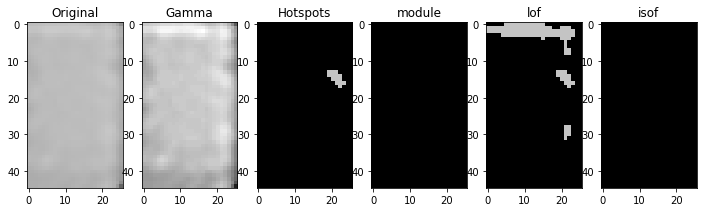

3356.jpg Normal
2048.jpg Normal
3342.jpg Normal
1555.jpg Normal
1233.jpg Normal
5055.jpg Normal
3424.jpg Normal
2909.jpg Normal
994.jpg Normal
758.jpg Normal
980.jpg Normal
770.jpg Normal
2935.jpg Normal
5082.jpg Normal
3395.jpg Normal
1582.jpg Normal
1596.jpg Normal
3381.jpg Normal
2921.jpg Normal
4388.jpg Normal
5096.jpg Normal
764.jpg Normal
3380.jpg Normal
1597.jpg Normal
765.jpg Normal
5097.jpg Normal
4389.jpg Normal
2920.jpg Normal
5083.jpg Normal
2934.jpg Normal
771.jpg Normal
1583.jpg Normal
3394.jpg Normal
981.jpg Normal
759.jpg Normal
995.jpg Normal
2908.jpg Normal
1554.jpg Normal
3343.jpg Junction-Box-Error
3425.jpg Normal
5054.jpg Normal
1232.jpg Normal
1226.jpg Normal
3431.jpg Normal
5040.jpg Normal
2049.jpg Normal
3357.jpg Normal
4438.jpg Normal
1540.jpg Normal
2061.jpg Normal
4410.jpg Normal
1568.jpg Normal
942.jpg Normal
4376.jpg Normal
3419.jpg Normal
2707.jpg Normal
5068.jpg Normal
4362.jpg Normal
2713.jpg Normal
956.jpg Normal
2075.jpg Normal
4404.jpg Normal
567.jpg 

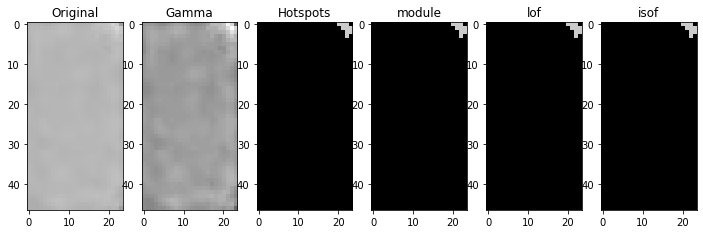

2288.jpg Normal
4821.jpg Normal
3196.jpg Normal
1959.jpg Normal
1781.jpg Multi-Hotspots


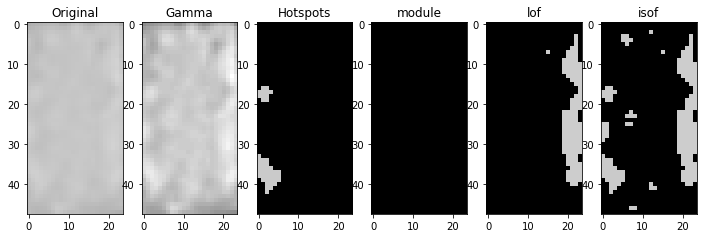

215.jpg Normal
573.jpg Normal
3828.jpg Normal
3800.jpg Normal
4809.jpg Normal
1971.jpg Normal
1965.jpg Normal
229.jpg Normal
3814.jpg Normal
1030.jpg Normal
2539.jpg Normal
3627.jpg Normal
4148.jpg Normal
3141.jpg Normal
1756.jpg Normal
1742.jpg Normal
3155.jpg Normal
3633.jpg Normal
1024.jpg Normal
2505.jpg Normal
4174.jpg Normal
598.jpg Normal
4612.jpg Normal
2263.jpg Normal
4606.jpg Normal
3169.jpg Normal
2277.jpg Normal
1018.jpg Normal
2511.jpg Normal
4160.jpg Normal
3948.jpg Normal
3790.jpg Normal
413.jpg Normal
1187.jpg Normal
375.jpg Normal
1839.jpg Single-Hotspot


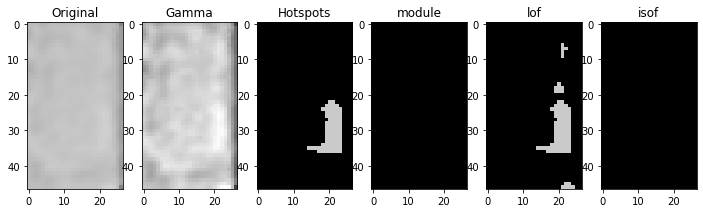

4799.jpg Normal
4941.jpg Normal
4955.jpg Normal
361.jpg Normal
1193.jpg Normal
407.jpg Normal
3784.jpg Normal
3974.jpg Normal
349.jpg Normal
1805.jpg Normal
1811.jpg Normal
4969.jpg Normal
3960.jpg Normal
1144.jpg Normal
3753.jpg Normal
4982.jpg Normal
3035.jpg Normal
1622.jpg Normal
1636.jpg Normal
4996.jpg Normal
3021.jpg Normal
4028.jpg Normal
3747.jpg Normal
2459.jpg Normal
1150.jpg Normal
4000.jpg Normal
2471.jpg Normal
1178.jpg Normal
2317.jpg Normal
3009.jpg Normal
4766.jpg Normal
2303.jpg Normal
4772.jpg Normal
4014.jpg Normal
2465.jpg Normal
177.jpg Normal
1385.jpg Normal
611.jpg Normal
89.jpg Normal
3592.jpg Normal
2854.jpg Normal
3586.jpg Normal
2840.jpg Normal
2698.jpg Normal
605.jpg Normal
1391.jpg Normal
163.jpg Normal
2868.jpg Normal
639.jpg Normal
1420.jpg Normal
4558.jpg Normal
3237.jpg Cluster-Anomaly


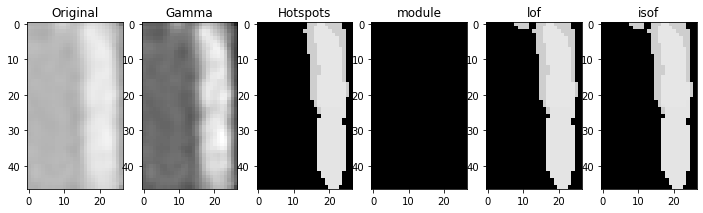

2129.jpg Normal
5120.jpg Normal
3551.jpg Normal
2897.jpg Single-Hotspot


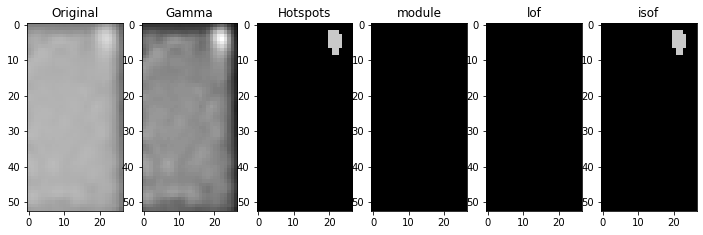

1346.jpg Normal
1352.jpg Normal
5134.jpg Normal
3545.jpg Normal
2883.jpg Normal
3223.jpg Normal
1434.jpg Normal
4564.jpg Normal
2115.jpg Normal
188.jpg Normal
836.jpg Normal
76.jpg Normal
2673.jpg Normal
4202.jpg Normal
5108.jpg Normal
2667.jpg Normal
3579.jpg Normal
4216.jpg Normal
822.jpg Normal
62.jpg Normal
1408.jpg Normal
4570.jpg Normal
2101.jpg Normal
4200.jpg Normal
2671.jpg Normal
74.jpg Normal
1378.jpg Normal
834.jpg Normal
2117.jpg Normal
3209.jpg Single-Hotspot


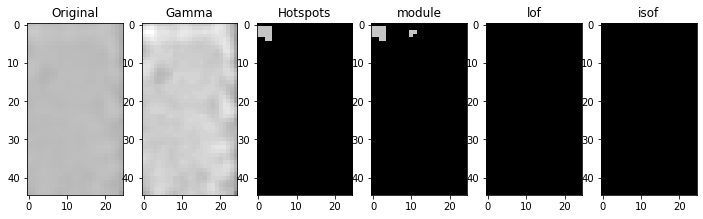

4566.jpg Single-Hotspot


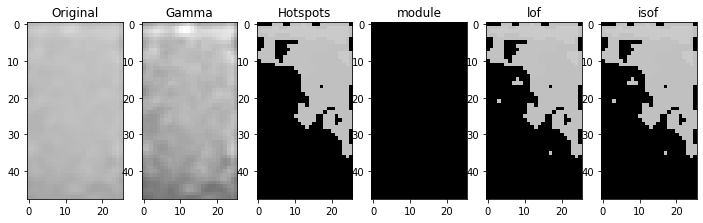

2103.jpg Normal
4572.jpg Normal
60.jpg Normal
820.jpg Normal
4214.jpg Normal
2665.jpg Normal
48.jpg Normal
1344.jpg Normal
808.jpg Normal
2895.jpg Normal
3553.jpg Normal
5122.jpg Normal
3235.jpg Normal
1422.jpg Normal
1436.jpg Normal
3221.jpg Normal
4228.jpg Normal
2881.jpg Normal
3547.jpg Normal
2659.jpg Normal
5136.jpg Normal
1350.jpg Normal
149.jpg Normal
2856.jpg Normal
3590.jpg Normal
613.jpg Normal
1387.jpg Normal
175.jpg Normal
4599.jpg Single-Hotspot


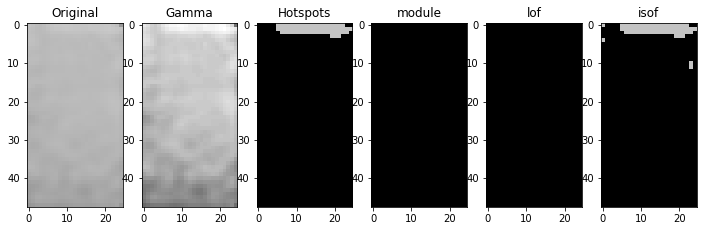

161.jpg Normal
1393.jpg Normal
607.jpg Normal
2842.jpg Normal
3584.jpg Normal
4764.jpg Normal
2315.jpg Normal
388.jpg Normal
2473.jpg Normal
4002.jpg Normal
2467.jpg Normal
3779.jpg Normal
4016.jpg Normal
1608.jpg Single-Hotspot


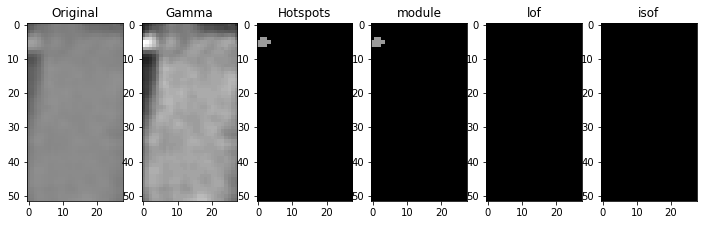

4770.jpg Normal
2301.jpg Normal
1620.jpg Normal
4758.jpg Normal
3037.jpg Normal
2329.jpg Normal
4980.jpg Normal
3989.jpg Normal
3751.jpg Normal
1146.jpg Normal
1152.jpg Normal
3745.jpg Normal
3023.jpg Normal
4994.jpg Junction-Box-Error
1634.jpg Normal
1807.jpg Normal
3976.jpg Normal
439.jpg Normal
3962.jpg Normal
1813.jpg Multi-Hotspots


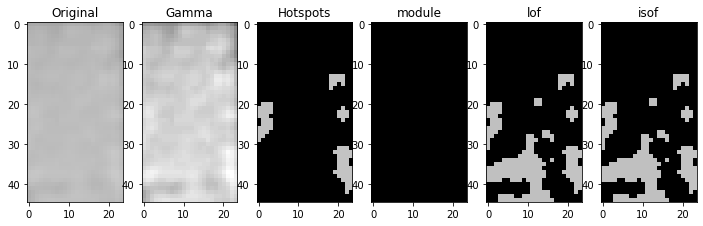

4943.jpg Single-Hotspot


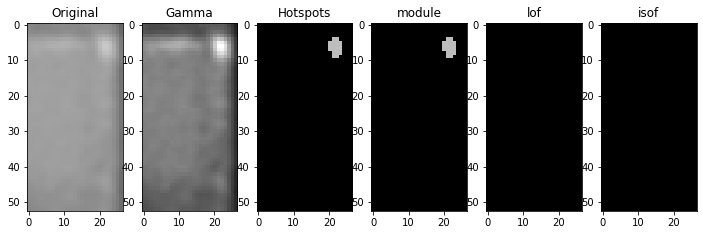

377.jpg Normal
1185.jpg Normal
411.jpg Normal
3792.jpg Normal
3786.jpg Normal
2498.jpg Normal
405.jpg Normal
1191.jpg Normal
363.jpg Normal
4957.jpg Normal
2261.jpg Normal
4610.jpg Junction-Box-Error
1768.jpg Single-Hotspot


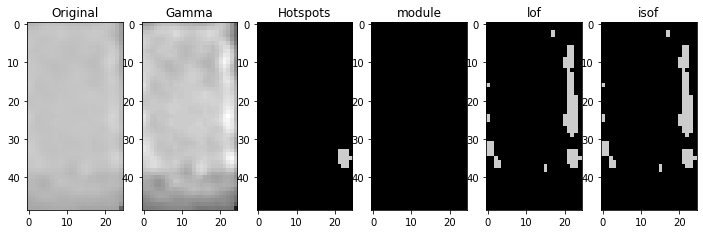

4176.jpg Normal
3619.jpg Normal
2507.jpg Normal
4162.jpg Normal
2513.jpg Normal
2275.jpg Normal
4604.jpg Normal
1754.jpg Multi-Hotspots


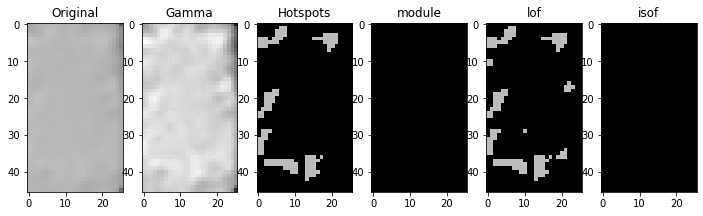

3143.jpg Normal
3625.jpg Normal
1032.jpg Normal
1026.jpg Normal
3631.jpg Normal
2249.jpg Single-Hotspot


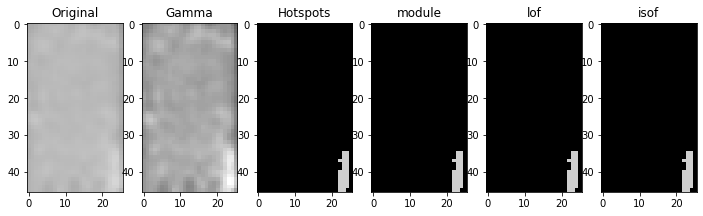

3157.jpg Normal
4638.jpg Normal
1998.jpg Normal
1740.jpg Normal
1973.jpg Normal
3802.jpg Normal
559.jpg Normal
3816.jpg Normal
1967.jpg Normal
3180.jpg Normal
4837.jpg Normal
1797.jpg Normal
203.jpg Normal
565.jpg Normal
4189.jpg Normal
571.jpg Normal
217.jpg Normal
1783.jpg Normal
3194.jpg Normal
4823.jpg Normal
2705.jpg Normal
4374.jpg Single-Hotspot


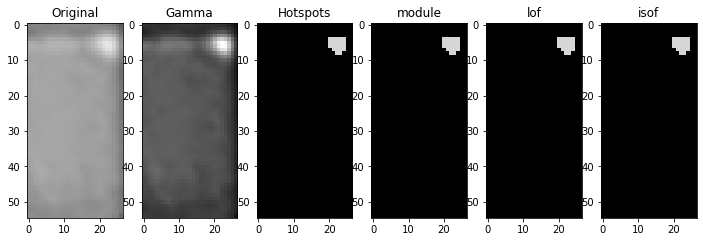

940.jpg Normal
798.jpg Normal
4412.jpg Normal
2063.jpg Normal
4406.jpg Normal
3369.jpg Normal
2077.jpg Normal
954.jpg Normal
1218.jpg Normal
2711.jpg Normal
4360.jpg Normal
1230.jpg Normal
5056.jpg Normal
2739.jpg Normal
3427.jpg Normal
4348.jpg Normal
3341.jpg Normal
1556.jpg Normal
1542.jpg Normal
3355.jpg Normal
5042.jpg Normal
3433.jpg Normal
968.jpg Normal
1224.jpg Normal
983.jpg Normal
997.jpg Normal
2922.jpg Normal
5095.jpg Junction-Box-Error
767.jpg Normal
1595.jpg Normal
3382.jpg Normal
2088.jpg Multi-Hotspots


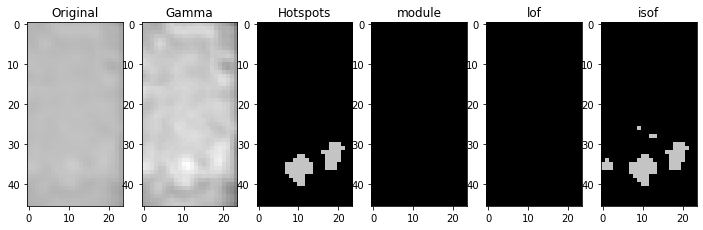

3396.jpg Normal
1581.jpg Normal
773.jpg Normal
2936.jpg Normal
5081.jpg Normal
1580.jpg Normal
3397.jpg Normal
2089.jpg Normal
5080.jpg Normal
2937.jpg Normal
772.jpg Normal
766.jpg Normal
5094.jpg Normal
2923.jpg Normal
3383.jpg Normal
1594.jpg Normal
996.jpg Normal
982.jpg Normal
3354.jpg Normal
1543.jpg Normal
1225.jpg Normal
969.jpg Normal
3432.jpg Normal
5043.jpg Normal
4349.jpg Normal
3426.jpg Normal
2738.jpg Normal
5057.jpg Normal
1231.jpg Normal
1557.jpg Normal
3340.jpg Normal
2076.jpg Normal
3368.jpg Normal
4407.jpg Normal
4361.jpg Normal
2710.jpg Normal
1219.jpg Normal
955.jpg Normal
799.jpg Normal
941.jpg Normal
4375.jpg Normal
2704.jpg Normal
2062.jpg Normal
4413.jpg Normal
570.jpg Normal
4822.jpg Normal
3195.jpg Normal
1782.jpg Normal
216.jpg Normal
202.jpg Normal
1796.jpg Normal
4836.jpg Junction-Box-Error
3181.jpg Normal
4188.jpg Normal
564.jpg Normal
3817.jpg Normal
1966.jpg Normal
1972.jpg Multi-Hotspots


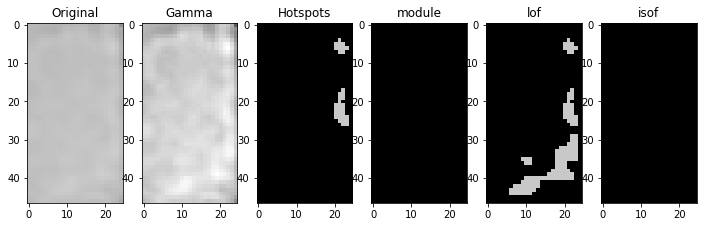

558.jpg Normal
3803.jpg Normal
3630.jpg Normal
1027.jpg Normal
1741.jpg Normal
1999.jpg Normal
4639.jpg Normal
3156.jpg Normal
2248.jpg Single-Hotspot


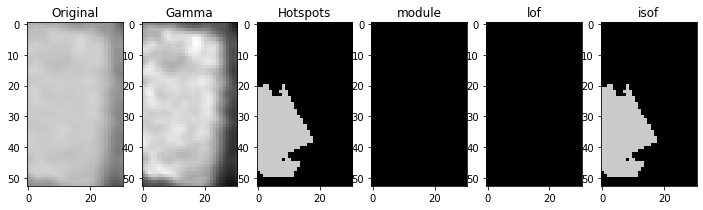

3142.jpg Normal
1755.jpg Normal
1033.jpg Normal
3624.jpg Normal
2512.jpg Normal
4163.jpg Normal
4605.jpg Normal
2274.jpg Normal
1769.jpg Normal
4611.jpg Normal
2260.jpg Normal
2506.jpg Normal
3618.jpg Normal
4177.jpg Normal
1190.jpg Normal
404.jpg Normal
2499.jpg Normal
3787.jpg Normal
4956.jpg Normal
362.jpg Normal
376.jpg Normal
4942.jpg Normal
3793.jpg Normal
410.jpg Normal
1184.jpg Normal
3963.jpg Normal
438.jpg Normal
1812.jpg Normal
1806.jpg Normal
3977.jpg Normal
3744.jpg Normal
1153.jpg Normal
1635.jpg Normal
4995.jpg Normal
3022.jpg Normal
4981.jpg Normal
2328.jpg Normal
3036.jpg Normal
4759.jpg Normal
1621.jpg Normal
1147.jpg Normal
3750.jpg Normal
3988.jpg Normal
4017.jpg Normal
3778.jpg Normal
2466.jpg Normal
2300.jpg Normal
4771.jpg Normal
1609.jpg Normal
389.jpg Normal
2314.jpg Normal
4765.jpg Single-Hotspot


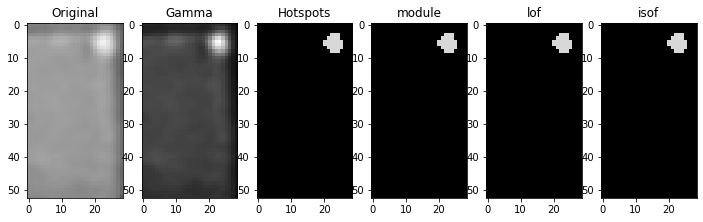

4003.jpg Normal
2472.jpg Normal
160.jpg Normal
3585.jpg Normal
2843.jpg Normal
606.jpg Normal
1392.jpg Normal
1386.jpg Single-Hotspot


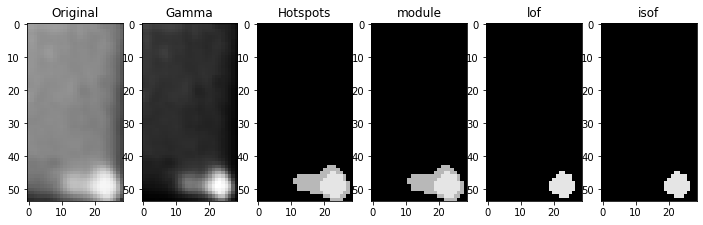

612.jpg Normal
3591.jpg Normal
2857.jpg Normal
4598.jpg Normal
174.jpg Normal
148.jpg Normal
3220.jpg Normal
1437.jpg Normal
1351.jpg Normal
5137.jpg Normal
2658.jpg Normal
3546.jpg Normal
2880.jpg Normal
4229.jpg Normal
5123.jpg Normal
3552.jpg Normal
2894.jpg Normal
809.jpg Normal
1345.jpg Normal
49.jpg Normal
1423.jpg Normal
3234.jpg Normal
4573.jpg Normal
2102.jpg Single-Hotspot


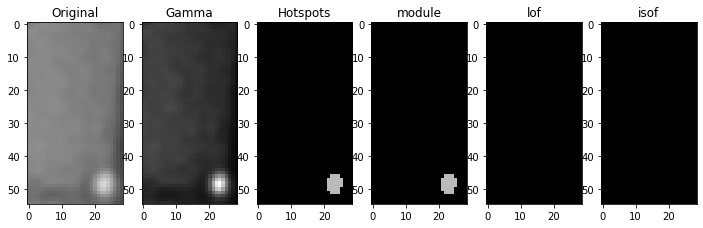

2664.jpg Normal
4215.jpg Normal
821.jpg Normal
61.jpg Normal
835.jpg Normal
1379.jpg Normal
75.jpg Normal
2670.jpg Normal
4201.jpg Normal
4567.jpg Normal
3208.jpg Normal
2116.jpg Normal
3230.jpg Normal
1427.jpg Normal
1341.jpg Normal
3556.jpg Normal
4239.jpg Normal
2890.jpg Single-Hotspot


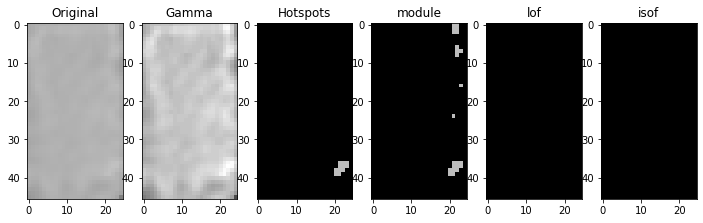

5127.jpg Normal
2648.jpg Normal
3542.jpg Normal
2884.jpg Normal
5133.jpg Normal
1355.jpg Normal
59.jpg Normal
819.jpg Normal
1433.jpg Normal
3224.jpg Normal
2112.jpg Normal
4563.jpg Normal
4205.jpg Normal
2674.jpg Normal
71.jpg Normal
831.jpg Normal
1369.jpg Normal
65.jpg Normal
825.jpg Normal
4211.jpg Normal
2660.jpg Normal
2106.jpg Normal
4577.jpg Normal
3218.jpg Normal
170.jpg Normal
3595.jpg Multi-Hotspots


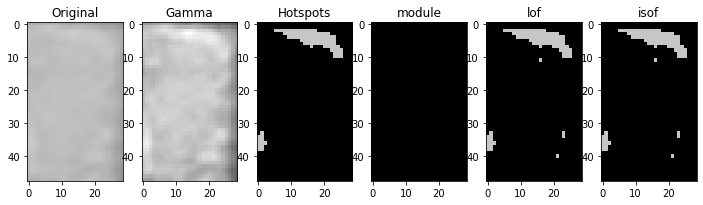

2853.jpg Normal
616.jpg Normal
1382.jpg Normal
1396.jpg Normal
602.jpg Normal
3581.jpg Normal
2847.jpg Normal
4588.jpg Normal
164.jpg Normal
158.jpg Normal
3754.jpg Normal
1143.jpg Normal
1625.jpg Multi-Hotspots


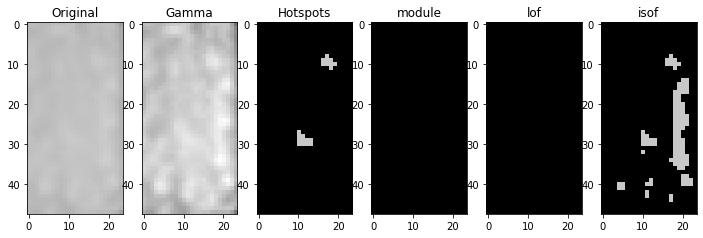

3032.jpg Normal
4985.jpg Junction-Box-Error
3026.jpg Normal
4749.jpg Normal
2338.jpg Normal
4991.jpg Normal
1631.jpg Normal
1157.jpg Normal
3998.jpg Normal
3740.jpg Normal
2476.jpg Normal
4007.jpg Normal
3768.jpg Normal
4761.jpg Normal
2310.jpg Normal
1619.jpg Normal
399.jpg Normal
4775.jpg Normal
2304.jpg Normal
2462.jpg Normal
4013.jpg Normal
1180.jpg Normal
414.jpg Normal
3797.jpg Normal
2489.jpg Normal
4946.jpg Normal
372.jpg Normal
366.jpg Normal
4952.jpg Single-Hotspot


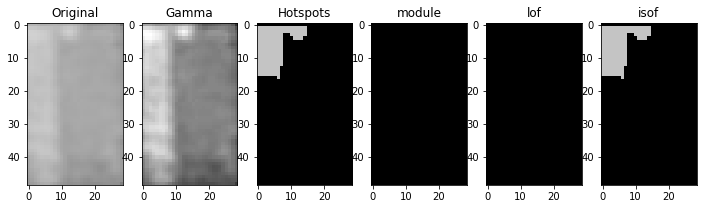

3783.jpg Normal
400.jpg Normal
1194.jpg Normal
3973.jpg Normal
428.jpg Normal
1802.jpg Multi-Hotspots


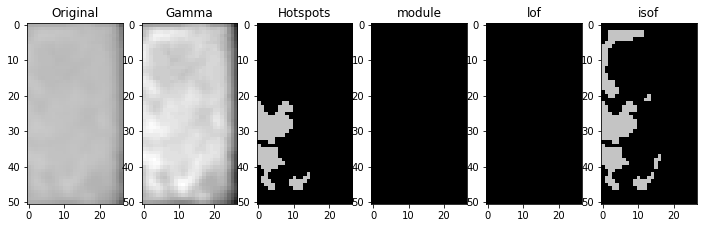

1816.jpg Normal
3967.jpg Multi-Hotspots


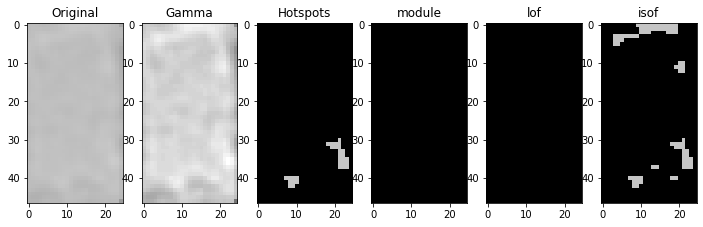

3620.jpg Normal
1037.jpg Normal
1989.jpg Normal
1751.jpg Normal
2258.jpg Normal
4629.jpg Normal
3146.jpg Normal
3152.jpg Normal
1745.jpg Normal
1023.jpg Normal
3634.jpg Normal
4173.jpg Normal
2502.jpg Normal
2264.jpg Multi-Hotspots


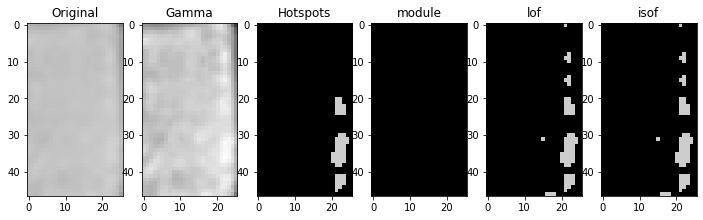

4615.jpg Normal
1779.jpg Normal
2270.jpg Normal
4601.jpg Single-Hotspot


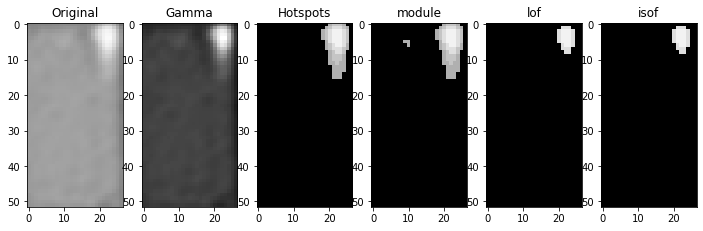

3608.jpg Junction-Box-Error
4167.jpg Normal
2516.jpg Normal
560.jpg Normal
3185.jpg Normal
4832.jpg Normal
1792.jpg Normal
206.jpg Normal
212.jpg Normal
1786.jpg Normal
3191.jpg Normal
4826.jpg Normal
4198.jpg Normal
574.jpg Normal
3807.jpg Normal
1976.jpg Normal
1962.jpg Normal
548.jpg Normal
3813.jpg Normal
3344.jpg Normal
1553.jpg Normal
979.jpg Normal
1235.jpg Normal
5053.jpg Normal
3422.jpg Normal
2728.jpg Normal
5047.jpg Normal
4359.jpg Normal
3436.jpg Normal
1221.jpg Normal
1547.jpg Normal
3350.jpg Normal
3378.jpg Normal
4417.jpg Normal
2066.jpg Normal
2700.jpg Normal
4371.jpg Normal
945.jpg Normal
1209.jpg Normal
951.jpg Normal
789.jpg Normal
2714.jpg Normal
4365.jpg Normal
4403.jpg Normal
2072.jpg Normal
1590.jpg Normal
2099.jpg Multi-Hotspots


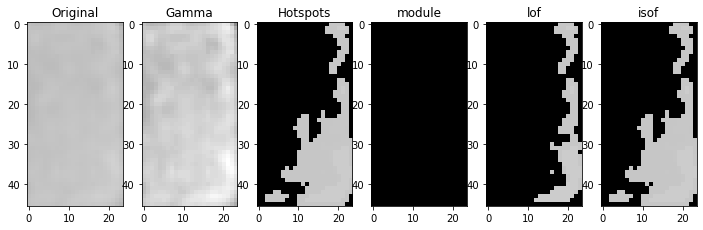

3387.jpg Normal
2927.jpg Normal
5090.jpg Normal
762.jpg Normal
776.jpg Normal
2933.jpg Normal
5084.jpg Normal
3393.jpg Normal
1584.jpg Normal
986.jpg Normal
992.jpg Normal
993.jpg Normal
987.jpg Normal
5085.jpg Normal
2932.jpg Normal
777.jpg Normal
1585.jpg Normal
3392.jpg Normal
3386.jpg Normal
2098.jpg Normal
1591.jpg Normal
763.jpg Normal
5091.jpg Normal
2926.jpg Normal
4364.jpg Normal
2715.jpg Normal
788.jpg Normal
950.jpg Normal
2073.jpg Normal
4402.jpg Single-Hotspot


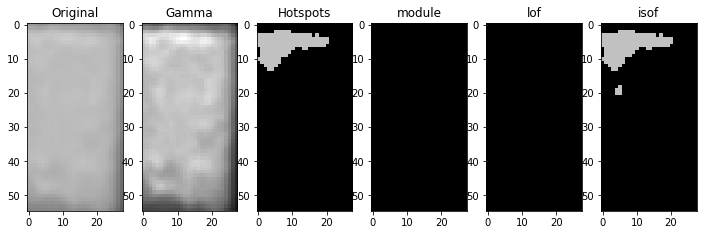

2067.jpg Normal
4416.jpg Normal
3379.jpg Normal
1208.jpg Normal
944.jpg Normal
4370.jpg Normal
2701.jpg Normal
1220.jpg Normal
3437.jpg Normal
4358.jpg Normal
5046.jpg Normal
2729.jpg Normal
3351.jpg Normal
1546.jpg Normal
1552.jpg Single-Hotspot


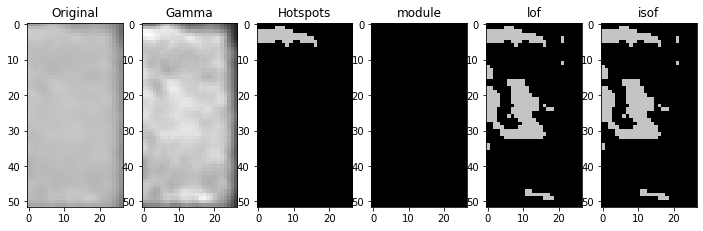

3345.jpg Normal
3423.jpg Normal
5052.jpg Normal
1234.jpg Normal
978.jpg Normal
1963.jpg Normal
3812.jpg Normal
549.jpg Normal
3806.jpg Multi-Hotspots


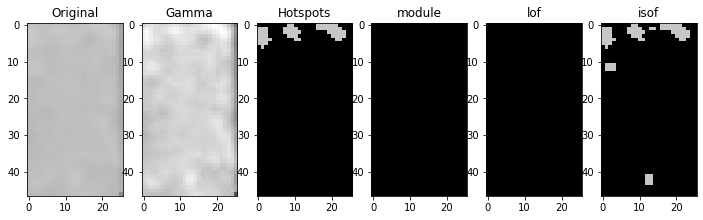

1977.jpg Normal
4827.jpg Normal
3190.jpg Normal
1787.jpg Normal
213.jpg Normal
575.jpg Normal
4199.jpg Normal
561.jpg Normal
207.jpg Normal
1793.jpg Normal
4833.jpg Normal
3184.jpg Normal
4600.jpg Normal
2271.jpg Normal
1778.jpg Normal
2517.jpg Normal
4166.jpg Normal
3609.jpg Normal
2503.jpg Normal
4172.jpg Normal
4614.jpg Normal
2265.jpg Normal
1744.jpg Normal
3153.jpg Normal
3635.jpg Normal
1022.jpg Normal
1036.jpg Normal
3621.jpg Normal
3147.jpg Normal
4628.jpg Normal
2259.jpg Normal
1750.jpg Normal
1988.jpg Normal
1817.jpg Normal
3966.jpg Normal
429.jpg Normal
3972.jpg Single-Hotspot


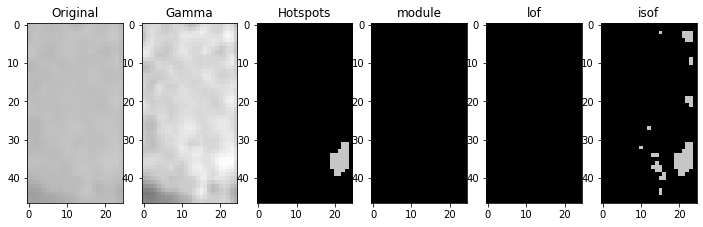

1803.jpg Normal
4953.jpg Normal
367.jpg Normal
1195.jpg Normal
401.jpg Normal
3782.jpg Normal
2488.jpg Normal
3796.jpg Normal
415.jpg Normal
1181.jpg Normal
373.jpg Normal
4947.jpg Normal
2305.jpg Normal
4774.jpg Normal
398.jpg Normal
4012.jpg Normal
2463.jpg Normal
3769.jpg Normal
4006.jpg Normal
2477.jpg Normal
1618.jpg Normal
2311.jpg Normal
4760.jpg Normal
1630.jpg Normal
4990.jpg Normal
2339.jpg Normal
4748.jpg Normal
3027.jpg Normal
3741.jpg Normal
3999.jpg Normal
1156.jpg Normal
1142.jpg Normal
3755.jpg Normal
4984.jpg Normal
3033.jpg Normal
1624.jpg Normal
159.jpg Normal
2846.jpg Normal
3580.jpg Normal
603.jpg Normal
1397.jpg Single-Hotspot


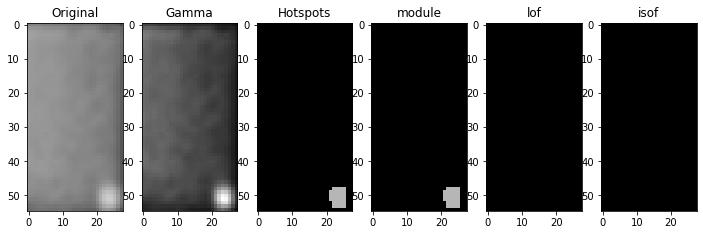

165.jpg Normal
4589.jpg Normal
171.jpg Normal
1383.jpg Normal
617.jpg Normal
2852.jpg Normal
3594.jpg Normal
2661.jpg Normal
4210.jpg Normal
824.jpg Normal
64.jpg Normal
1368.jpg Normal
3219.jpg Normal
4576.jpg Normal
2107.jpg Normal
4562.jpg Normal
2113.jpg Normal
830.jpg Normal
70.jpg Normal
2675.jpg Normal
4204.jpg Normal
818.jpg Normal
58.jpg Normal
1354.jpg Normal
5132.jpg Normal
2885.jpg Normal
3543.jpg Normal
3225.jpg Normal
1432.jpg Normal
1426.jpg Normal
3231.jpg Normal
2649.jpg Normal
5126.jpg Normal
2891.jpg Normal
4238.jpg Normal
3557.jpg Normal
1340.jpg Normal
1430.jpg Normal
2139.jpg Normal
4548.jpg Normal
3227.jpg Normal
8.jpg Normal
3541.jpg Normal
2887.jpg Normal
5130.jpg Normal
1356.jpg Normal
1342.jpg Normal
3555.jpg Normal
2893.jpg Normal
5124.jpg Normal
3233.jpg Normal
1424.jpg Normal
2105.jpg Normal
4574.jpg Normal
198.jpg Normal
66.jpg Normal
826.jpg Normal
4212.jpg Normal
2663.jpg Normal
3569.jpg Normal
4206.jpg Normal
5118.jpg Normal
2677.jpg Normal
72.jpg Norm

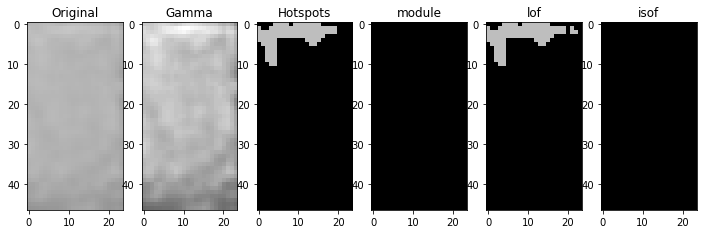

3031.jpg Normal
4986.jpg Normal
2449.jpg Normal
4038.jpg Normal
3757.jpg Normal
1140.jpg Normal
2461.jpg Normal
4010.jpg Normal
1168.jpg Normal
3019.jpg Normal
4776.jpg Normal
2307.jpg Normal
4762.jpg Junction-Box-Error
2313.jpg Normal
2475.jpg Normal
4004.jpg Normal
3780.jpg Normal
3958.jpg Normal
403.jpg Normal
1197.jpg Normal
1829.jpg Normal
365.jpg Normal
4951.jpg Normal
4789.jpg Normal
4945.jpg Normal
371.jpg Normal
1183.jpg Normal
417.jpg Normal
3794.jpg Normal
3964.jpg Normal
1815.jpg Normal
359.jpg Normal
1801.jpg Normal
4979.jpg Normal
3970.jpg Normal
1020.jpg Normal
3637.jpg Normal
4158.jpg Normal
2529.jpg Normal
3151.jpg Normal
1746.jpg Normal
1752.jpg Normal
3145.jpg Normal
3623.jpg Single-Hotspot


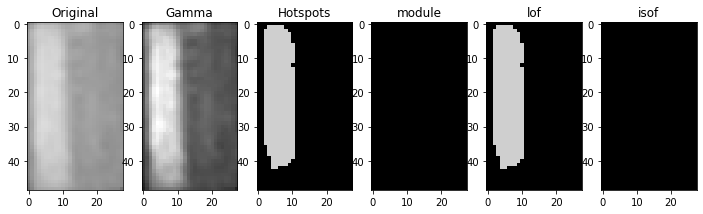

1034.jpg Normal
4164.jpg Normal
2515.jpg Normal
588.jpg Normal
2273.jpg Normal
4602.jpg Normal
2267.jpg Normal
4616.jpg Normal
3179.jpg Normal
1008.jpg Normal
4170.jpg Normal
2501.jpg Normal
577.jpg Normal
211.jpg Normal
1785.jpg Normal
3192.jpg Normal
4825.jpg Normal
3186.jpg Normal
4831.jpg Single-Hotspot


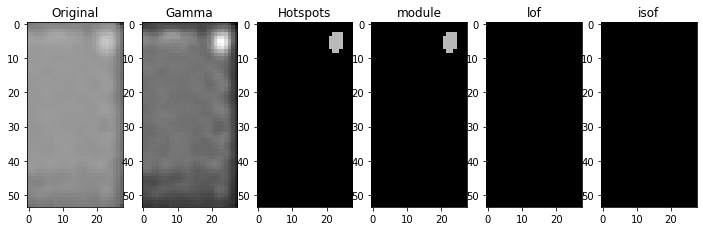

2298.jpg Normal
1791.jpg Normal
205.jpg Normal
1949.jpg Normal
563.jpg Normal
3838.jpg Normal
3810.jpg Normal
4819.jpg Normal
1961.jpg Normal
239.jpg Normal
1975.jpg Normal
3804.jpg Normal
1544.jpg Normal
3353.jpg Normal
5044.jpg Normal
3435.jpg Normal
1222.jpg Normal
1236.jpg Normal
5050.jpg Normal
3421.jpg Normal
3347.jpg Normal
4428.jpg Normal
2059.jpg Normal
1550.jpg Normal
4400.jpg Normal
2071.jpg Normal
1578.jpg Junction-Box-Error
952.jpg Normal
2717.jpg Single-Hotspot


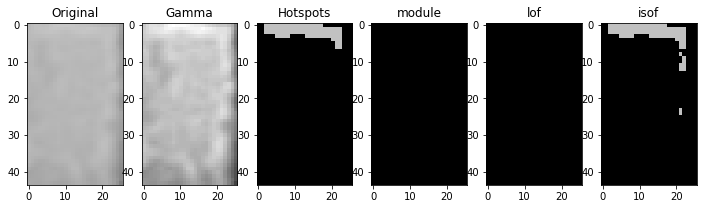

5078.jpg Junction-Box-Error
4366.jpg Normal
3409.jpg Normal
2703.jpg Normal
4372.jpg Normal
946.jpg Normal
4414.jpg Normal
2065.jpg Normal
3390.jpg Normal
1587.jpg Normal
775.jpg Normal
2930.jpg Normal
4399.jpg Single-Hotspot


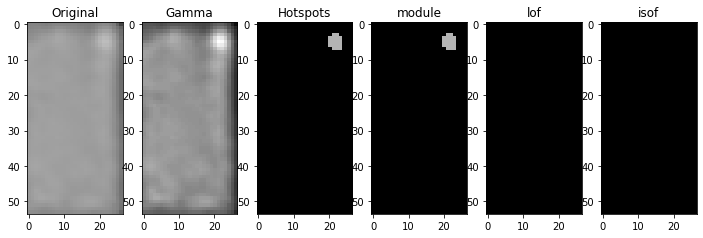

5087.jpg Normal
2924.jpg Normal
5093.jpg Normal
761.jpg Normal
1593.jpg Normal
3384.jpg Normal
749.jpg Normal
991.jpg Normal
985.jpg Normal
2918.jpg Normal
2919.jpg Normal
984.jpg Normal
990.jpg Normal
748.jpg Normal
760.jpg Normal
5092.jpg Normal
2925.jpg Normal
3385.jpg Normal
1592.jpg Normal
1586.jpg Normal
3391.jpg Normal
5086.jpg Normal
4398.jpg Normal
2931.jpg Normal
774.jpg Normal
947.jpg Normal
4373.jpg Normal
2702.jpg Normal
2064.jpg Normal
4415.jpg Normal
1579.jpg Normal
2070.jpg Normal
4401.jpg Normal
3408.jpg Single-Hotspot


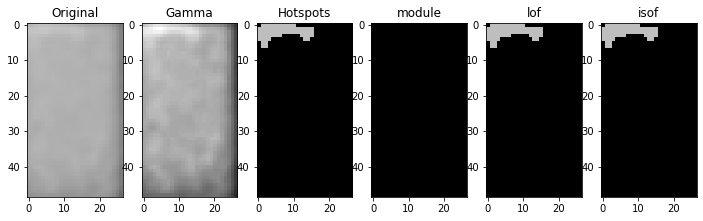

4367.jpg Normal
5079.jpg Normal
2716.jpg Normal
953.jpg Normal
3420.jpg Normal
5051.jpg Normal
1237.jpg Normal
1551.jpg Normal
2058.jpg Normal
4429.jpg Normal
3346.jpg Normal
3352.jpg Normal
1545.jpg Multi-Hotspots


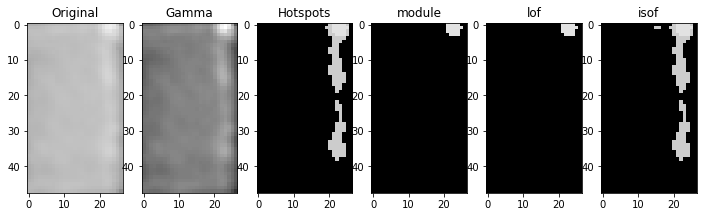

1223.jpg Normal
3434.jpg Normal
5045.jpg Normal
1974.jpg Normal
238.jpg Normal
3805.jpg Normal
3811.jpg Normal
1960.jpg Normal
4818.jpg Normal
1948.jpg Normal
204.jpg Normal
1790.jpg Normal
2299.jpg Normal
4830.jpg Normal
3187.jpg Normal
3839.jpg Normal
562.jpg Normal
576.jpg Normal
4824.jpg Normal
3193.jpg Normal
1784.jpg Multi-Hotspots


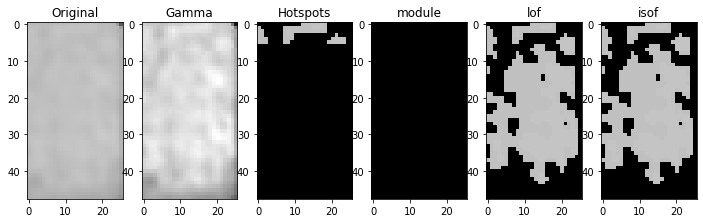

210.jpg Normal
3178.jpg Normal
4617.jpg Normal
2266.jpg Normal
2500.jpg Normal
4171.jpg Normal
1009.jpg Normal
589.jpg Normal
2514.jpg Normal
4165.jpg Normal
4603.jpg Normal
2272.jpg Normal
3144.jpg Normal
1753.jpg Normal
1035.jpg Normal
3622.jpg Normal
2528.jpg Normal
4159.jpg Normal
3636.jpg Normal
1021.jpg Normal
1747.jpg Normal
3150.jpg Normal
4978.jpg Normal
1800.jpg Normal
3971.jpg Normal
3965.jpg Normal
358.jpg Normal
1814.jpg Single-Hotspot


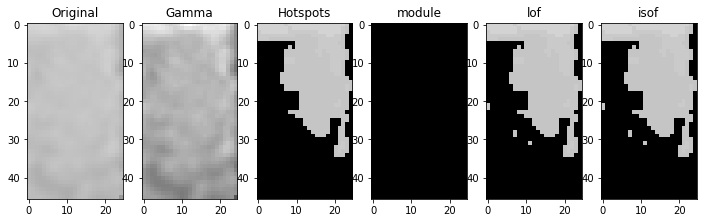

370.jpg Normal
4944.jpg Normal
3795.jpg Normal
416.jpg Normal
1182.jpg Normal
1196.jpg Normal
402.jpg Normal
3959.jpg Normal
3781.jpg Multi-Hotspots


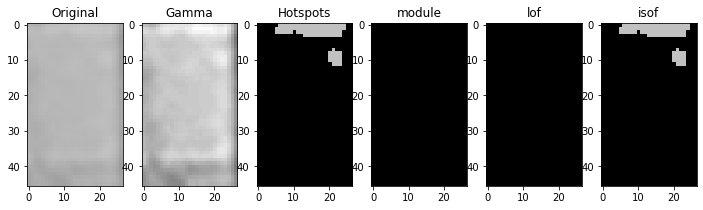

4788.jpg Normal
4950.jpg Junction-Box-Error
364.jpg Normal
1828.jpg Normal
2312.jpg Normal
4763.jpg Normal
4005.jpg Normal
2474.jpg Normal
1169.jpg Normal
4011.jpg Normal
2460.jpg Normal
2306.jpg Normal
4777.jpg Normal
3018.jpg Normal
4987.jpg Normal
3030.jpg Normal
1627.jpg Normal
1141.jpg Normal
3756.jpg Module-Anomaly


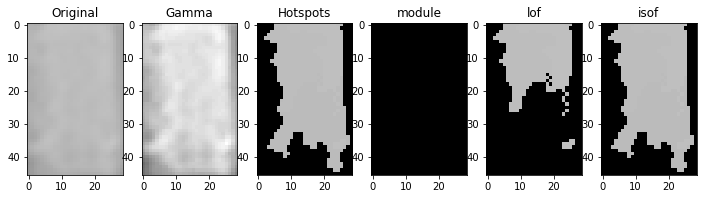

4039.jpg Normal
2448.jpg Normal
3742.jpg Normal
1155.jpg Normal
1633.jpg Normal
4993.jpg Normal
3024.jpg Normal
628.jpg Normal
2879.jpg Junction-Box-Error
1380.jpg Normal
614.jpg Normal
2851.jpg Normal
3597.jpg Normal
2689.jpg Normal
172.jpg Single-Hotspot


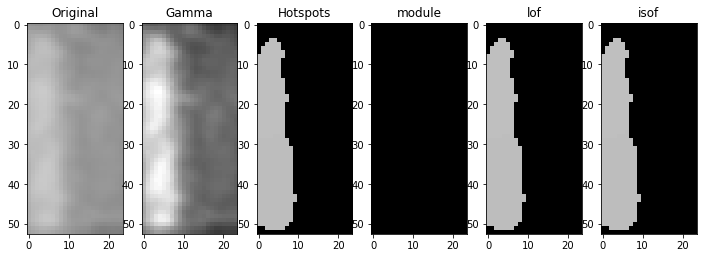

166.jpg Normal
2845.jpg Normal
3583.jpg Normal
98.jpg Normal
600.jpg Normal
1394.jpg Normal
833.jpg Normal
73.jpg Single-Hotspot


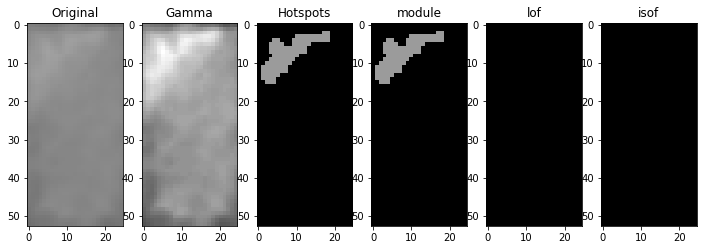

2676.jpg Normal
5119.jpg Normal
4207.jpg Normal
3568.jpg Normal
4561.jpg Normal
2110.jpg Normal
1419.jpg Normal
199.jpg Normal
4575.jpg Normal
2104.jpg Single-Hotspot


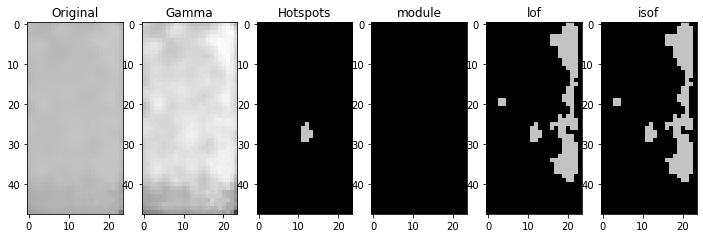

2662.jpg Normal
4213.jpg Normal
827.jpg Normal
67.jpg Normal
5125.jpg Normal
2892.jpg Junction-Box-Error
3554.jpg Normal
1343.jpg Normal
1425.jpg Normal
3232.jpg Normal
9.jpg Normal
3226.jpg Normal
4549.jpg Normal
2138.jpg Normal
1431.jpg Normal
1357.jpg Normal
5131.jpg Normal
2886.jpg Single-Hotspot


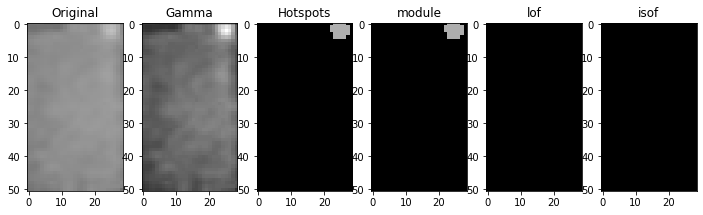

3540.jpg Normal
2163.jpg Normal
4512.jpg Normal
4274.jpg Single-Hotspot


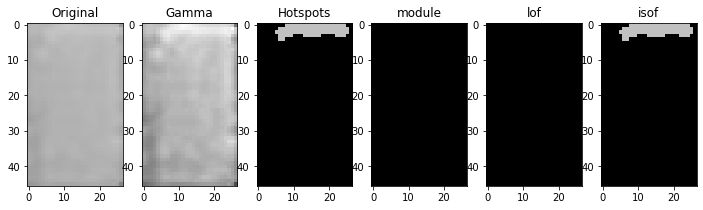

2605.jpg Normal
698.jpg Normal
840.jpg Normal
14.jpg Normal
1318.jpg Normal
854.jpg Normal
4260.jpg Normal
2611.jpg Normal
2177.jpg Normal
3269.jpg Normal
4506.jpg Normal
3241.jpg Normal
1456.jpg Normal
1330.jpg Normal
4248.jpg Normal
3527.jpg Normal
2639.jpg Normal
3533.jpg Normal
5142.jpg Normal
28.jpg Normal
1324.jpg Normal
868.jpg Normal
1442.jpg Normal
3255.jpg Normal
883.jpg Normal
897.jpg Normal
129.jpg Normal
1495.jpg Normal
101.jpg Normal
3282.jpg Normal
2822.jpg Normal
667.jpg Normal
673.jpg Normal
2836.jpg Normal
3296.jpg Normal
2188.jpg Normal
115.jpg Normal
1481.jpg Normal
2407.jpg Normal
3719.jpg Normal
4076.jpg Normal
4710.jpg Normal
2361.jpg Normal
1668.jpg Normal
4704.jpg Normal
2375.jpg Multi-Hotspots


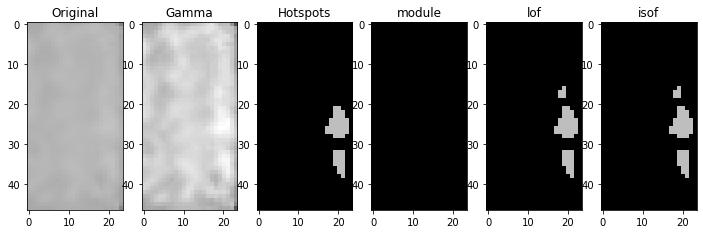

2413.jpg Normal
4062.jpg Normal
3725.jpg Normal
1132.jpg Normal
1654.jpg Normal
3043.jpg Normal
4738.jpg Normal
3057.jpg Normal
2349.jpg Normal
1640.jpg Normal
1898.jpg Normal
1126.jpg Normal
3731.jpg Normal
3902.jpg Normal
459.jpg Normal
1873.jpg Normal
1867.jpg Normal
3916.jpg Normal
465.jpg Normal
4089.jpg Normal
4937.jpg Normal
3080.jpg Normal
303.jpg Normal
1697.jpg Normal
1683.jpg Multi-Hotspots


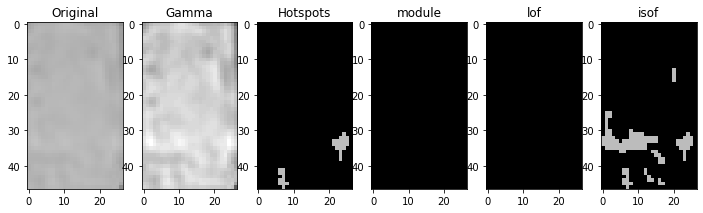

317.jpg Normal
4923.jpg Normal
3094.jpg Normal
471.jpg Normal
4102.jpg Normal
2573.jpg Normal
2215.jpg Normal
4664.jpg Normal
288.jpg Normal
1708.jpg Normal
2201.jpg Normal
4670.jpg Normal
4116.jpg Normal
3679.jpg Normal
2567.jpg Normal
3651.jpg Normal
3889.jpg Normal
1046.jpg Normal
1720.jpg Normal
2229.jpg Normal
4880.jpg Normal
3137.jpg Normal
4658.jpg Normal
4894.jpg Normal
3123.jpg Normal
1734.jpg Normal
1052.jpg Normal
3645.jpg Normal
3876.jpg Normal
1907.jpg Normal
1913.jpg Normal
539.jpg Normal
3862.jpg Normal
511.jpg Normal
1085.jpg Normal
3692.jpg Normal
4843.jpg Normal
277.jpg Normal
263.jpg Normal
4857.jpg Normal
2598.jpg Normal
3686.jpg Normal
1091.jpg Normal
505.jpg Normal
4466.jpg Normal
3309.jpg Normal
2017.jpg Normal
2771.jpg Normal
4300.jpg Normal
934.jpg Normal
1278.jpg Normal
920.jpg Normal
2765.jpg Normal
4314.jpg Normal
4472.jpg Normal
2003.jpg Normal
3335.jpg Multi-Hotspots


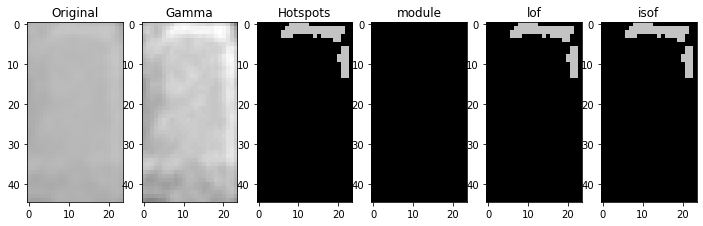

1522.jpg Normal
908.jpg Normal
1244.jpg Normal
5022.jpg Normal
3453.jpg Normal
2995.jpg Normal
5036.jpg Normal
2759.jpg Normal
3447.jpg Normal
4328.jpg Normal
2981.jpg Normal
1250.jpg Normal
1536.jpg Normal
3321.jpg Normal
4499.jpg Normal
3490.jpg Normal
2956.jpg Normal
1287.jpg Normal
713.jpg Normal
707.jpg Normal
1293.jpg Normal
3484.jpg Normal
2942.jpg Normal
2943.jpg Normal
3485.jpg Normal
1292.jpg Normal
706.jpg Normal
4498.jpg Normal
712.jpg Normal
1286.jpg Single-Hotspot


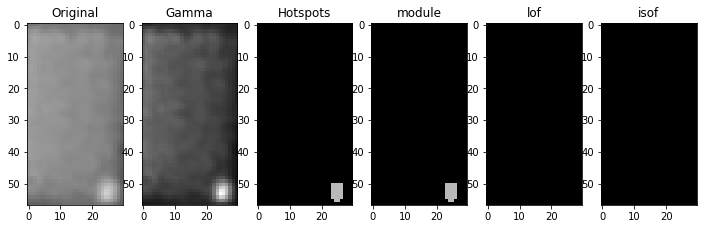

2957.jpg Normal
3491.jpg Normal
1251.jpg Normal
2980.jpg Normal
4329.jpg Normal
3446.jpg Normal
2758.jpg Normal
5037.jpg Normal
3320.jpg Normal
1537.jpg Normal
1523.jpg Single-Hotspot


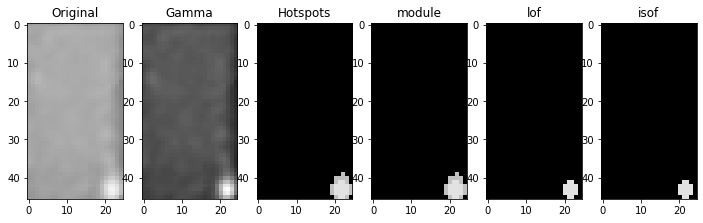

3334.jpg Normal
2994.jpg Normal
3452.jpg Normal
5023.jpg Normal
1245.jpg Normal
909.jpg Normal
4315.jpg Single-Hotspot


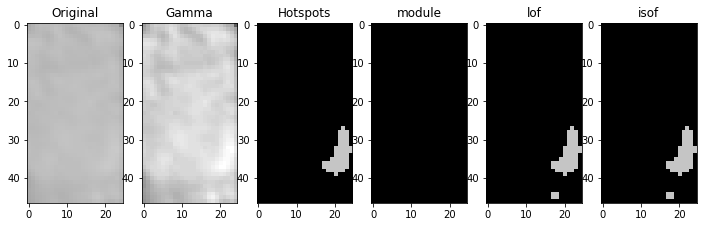

2764.jpg Normal
921.jpg Normal
2002.jpg Normal
4473.jpg Normal
2016.jpg Normal
3308.jpg Normal
4467.jpg Normal
1279.jpg Normal
935.jpg Normal
4301.jpg Normal
2770.jpg Normal
4856.jpg Normal
262.jpg Normal
504.jpg Normal
1090.jpg Normal
3687.jpg Normal
2599.jpg Normal
3693.jpg Normal
1084.jpg Normal
510.jpg Normal
276.jpg Normal
4842.jpg Normal
1912.jpg Normal
3863.jpg Normal
538.jpg Normal
3877.jpg Normal
1906.jpg Normal
1735.jpg Normal
3122.jpg Normal
4895.jpg Normal
3644.jpg Normal
1053.jpg Normal
1047.jpg Normal
3888.jpg Normal
3650.jpg Normal
4659.jpg Normal
3136.jpg Normal
4881.jpg Normal
2228.jpg Normal
1721.jpg Normal
4671.jpg Normal
2200.jpg Normal
1709.jpg Multi-Hotspots


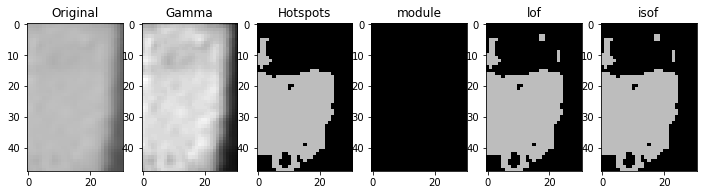

2566.jpg Normal
3678.jpg Normal
4117.jpg Normal
2572.jpg Normal
4103.jpg Normal
289.jpg Normal
4665.jpg Normal
2214.jpg Normal
3095.jpg Normal
4922.jpg Normal
316.jpg Normal
1682.jpg Multi-Hotspots


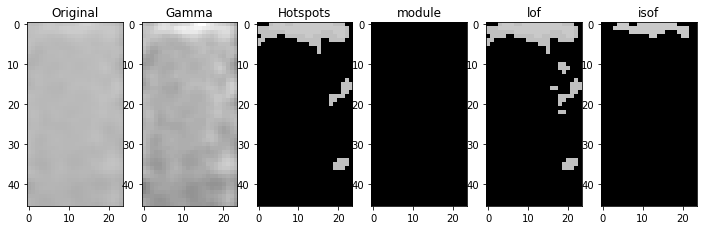

470.jpg Normal
4088.jpg Normal
464.jpg Normal
1696.jpg Normal
302.jpg Normal
3081.jpg Normal
4936.jpg Normal
1866.jpg Normal
3917.jpg Normal
458.jpg Normal
3903.jpg Normal
1872.jpg Normal
1899.jpg Normal
1641.jpg Normal
2348.jpg Normal
3056.jpg Normal
4739.jpg Normal
3730.jpg Normal
1127.jpg Normal
1133.jpg Normal
3724.jpg Normal
3042.jpg Normal
1655.jpg Normal
2374.jpg Normal
4705.jpg Normal
4063.jpg Single-Hotspot


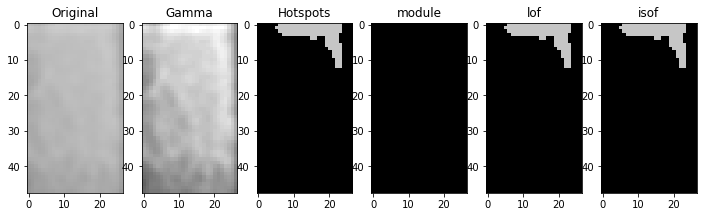

2412.jpg Normal
4077.jpg Multi-Hotspots


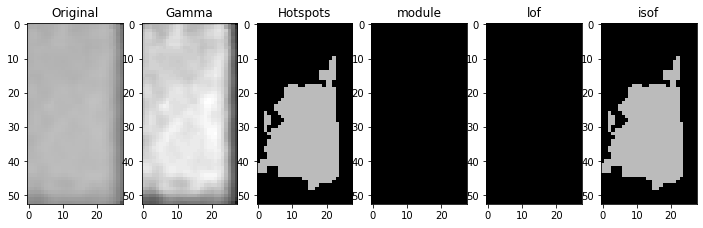

3718.jpg Normal
2406.jpg Normal
1669.jpg Normal
2360.jpg Normal
4711.jpg Normal
2837.jpg Normal
672.jpg Normal
1480.jpg Normal
114.jpg Normal
2189.jpg Normal
3297.jpg Normal
3283.jpg Normal
100.jpg Normal
1494.jpg Normal
666.jpg Normal
2823.jpg Normal
896.jpg Normal
128.jpg Normal
882.jpg Normal
869.jpg Normal
1325.jpg Normal
29.jpg Normal
5143.jpg Normal
3532.jpg Normal
3254.jpg Normal
1443.jpg Normal
1457.jpg Normal
3240.jpg Normal
2638.jpg Normal
3526.jpg Normal
4249.jpg Normal
1331.jpg Normal
2610.jpg Normal
4261.jpg Normal
855.jpg Normal
1319.jpg Normal
15.jpg Normal
4507.jpg Normal
3268.jpg Normal
2176.jpg Normal
4513.jpg Normal
2162.jpg Normal
841.jpg Normal
699.jpg Normal
2604.jpg Normal
4275.jpg Normal
2174.jpg Normal
4505.jpg Normal
17.jpg Normal
857.jpg Normal
4263.jpg Normal
2612.jpg Normal
4277.jpg Normal
3518.jpg Normal
2606.jpg Single-Hotspot


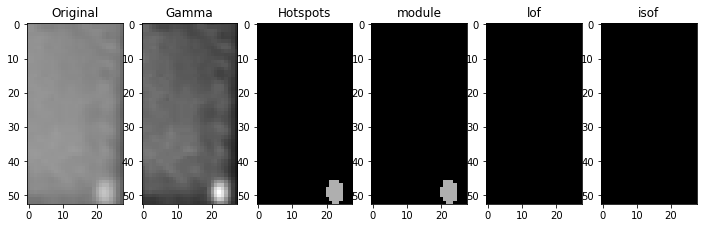

843.jpg Normal
1469.jpg Normal
2160.jpg Normal
4511.jpg Normal
1441.jpg Normal
2148.jpg Normal
3256.jpg Normal
4539.jpg Normal
3530.jpg Normal
5141.jpg Normal
1327.jpg Normal
1333.jpg Normal
3524.jpg Normal
3242.jpg Normal
1455.jpg Normal
2809.jpg Normal
894.jpg Normal
880.jpg Normal
658.jpg Normal
3295.jpg Normal
116.jpg Normal
1482.jpg Normal
670.jpg Normal
2835.jpg Normal
2821.jpg Normal
4288.jpg Normal
664.jpg Normal
1496.jpg Normal
102.jpg Normal
3281.jpg Normal
2410.jpg Normal
4061.jpg Normal
1119.jpg Normal
4707.jpg Normal
3068.jpg Normal
2376.jpg Normal
4713.jpg Normal
2362.jpg Normal
499.jpg Normal
2404.jpg Single-Hotspot


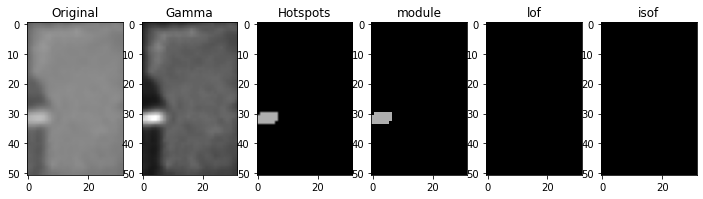

4075.jpg Normal
1125.jpg Normal
3732.jpg Normal
3054.jpg Normal
1643.jpg Normal
1657.jpg Junction-Box-Error
3040.jpg Normal
2438.jpg Normal
3726.jpg Normal
4049.jpg Normal
1131.jpg Normal
3915.jpg Normal
1864.jpg Normal
328.jpg Normal
1870.jpg Multi-Hotspots


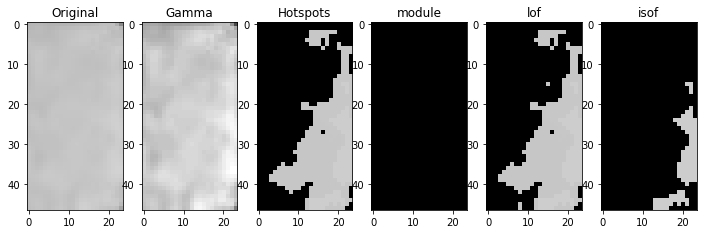

4908.jpg Normal
3901.jpg Normal
3929.jpg Normal
472.jpg Normal
1858.jpg Normal
1680.jpg Normal
314.jpg Normal
4920.jpg Normal
2389.jpg Normal
3097.jpg Normal
4934.jpg Normal
3083.jpg Normal
300.jpg Single-Hotspot


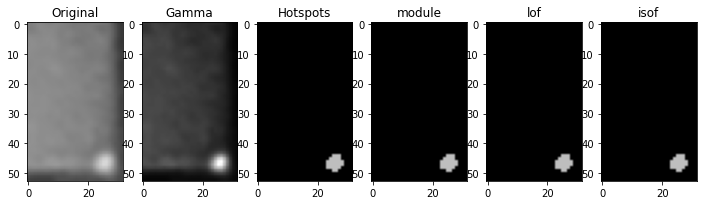

1694.jpg Normal
466.jpg Normal
4115.jpg Normal
2564.jpg Normal
2202.jpg Normal
4673.jpg Normal
2216.jpg Normal
3108.jpg Normal
4667.jpg Normal
1079.jpg Normal
4101.jpg Normal
2570.jpg Normal
1051.jpg Normal
4129.jpg Junction-Box-Error
3646.jpg Normal
2558.jpg Normal
4897.jpg Normal
3120.jpg Normal
1737.jpg Normal
1723.jpg Normal
4883.jpg Normal
3134.jpg Normal
3652.jpg Normal
1045.jpg Normal
3861.jpg Normal
4868.jpg Normal
1910.jpg Normal
248.jpg Normal
1904.jpg Normal
3875.jpg Normal
3685.jpg Normal
1092.jpg Normal
506.jpg Normal
260.jpg Normal
4854.jpg Normal
4698.jpg Normal
4840.jpg Normal
274.jpg Normal
1938.jpg Normal
512.jpg Normal
1086.jpg Normal
3849.jpg Normal
3691.jpg Normal
4471.jpg Normal
2000.jpg Normal
1509.jpg Normal
923.jpg Normal
5009.jpg Normal
2766.jpg Normal
3478.jpg Normal
4317.jpg Normal
2772.jpg Normal
4303.jpg Normal
937.jpg Normal
4465.jpg Normal
2014.jpg Normal
1535.jpg Normal
3322.jpg Normal
5035.jpg Normal
3444.jpg Normal
2982.jpg Normal
1253.jpg Normal
1247

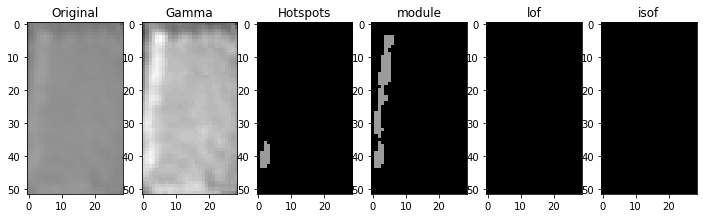

1093.jpg Normal
3684.jpg Normal
4855.jpg Normal
261.jpg Normal
1905.jpg Normal
249.jpg Normal
3874.jpg Normal
3860.jpg Normal
1911.jpg Normal
4869.jpg Normal
3135.jpg Normal
4882.jpg Normal
1722.jpg Normal
1044.jpg Normal
3653.jpg Normal
2559.jpg Normal
3647.jpg Normal
4128.jpg Normal
1050.jpg Normal
1736.jpg Normal
3121.jpg Normal
4896.jpg Normal
4666.jpg Normal
3109.jpg Normal
2217.jpg Normal
2571.jpg Normal
4100.jpg Normal
1078.jpg Normal
2565.jpg Normal
4114.jpg Normal
4672.jpg Normal
2203.jpg Normal
1695.jpg Single-Hotspot


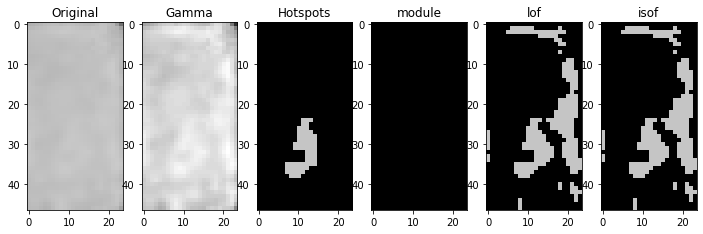

301.jpg Normal
3082.jpg Normal
4935.jpg Normal
467.jpg Normal
473.jpg Normal
3928.jpg Normal
3096.jpg Normal
2388.jpg Normal
4921.jpg Normal
315.jpg Normal
1681.jpg Normal
1859.jpg Normal
4909.jpg Normal
1871.jpg Normal
3900.jpg Normal
3914.jpg Normal
329.jpg Normal
1865.jpg Normal
3041.jpg Normal
1656.jpg Normal
1130.jpg Normal
4048.jpg Multi-Hotspots


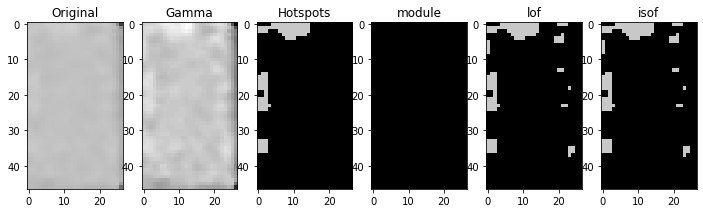

3727.jpg Junction-Box-Error
2439.jpg Normal
3733.jpg Normal
1124.jpg Normal
1642.jpg Normal
3055.jpg Normal
2363.jpg Normal
4712.jpg Normal
4074.jpg Normal
2405.jpg Normal
498.jpg Normal
1118.jpg Normal
4060.jpg Normal
2411.jpg Normal
2377.jpg Normal
3069.jpg Normal
4706.jpg Normal
665.jpg Normal
4289.jpg Normal
2820.jpg Normal
3280.jpg Normal
103.jpg Normal
1497.jpg Normal
1483.jpg Normal
117.jpg Normal
3294.jpg Normal
2834.jpg Normal
671.jpg Normal
659.jpg Normal
881.jpg Normal
895.jpg Normal
2808.jpg Normal
3525.jpg Normal
1332.jpg Normal
1454.jpg Normal
3243.jpg Normal
4538.jpg Normal
3257.jpg Normal
2149.jpg Normal
1440.jpg Normal
1326.jpg Normal
5140.jpg Normal
3531.jpg Multi-Hotspots


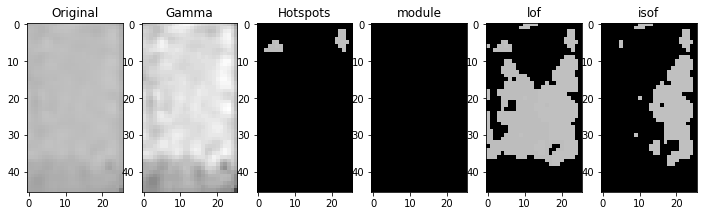

842.jpg Normal
2607.jpg Normal
3519.jpg Normal
4276.jpg Normal
4510.jpg Normal
2161.jpg Normal
1468.jpg Normal
4504.jpg Normal
2175.jpg Normal
2613.jpg Normal
4262.jpg Normal
856.jpg Normal
16.jpg Normal
3535.jpg Normal
5144.jpg Normal
1322.jpg Normal
1444.jpg Normal
3253.jpg Normal
2159.jpg Normal
4528.jpg Normal
3247.jpg Normal
1450.jpg Normal
1336.jpg Normal
3521.jpg Normal
5150.jpg Normal
12.jpg Normal
852.jpg Normal
3509.jpg Single-Hotspot


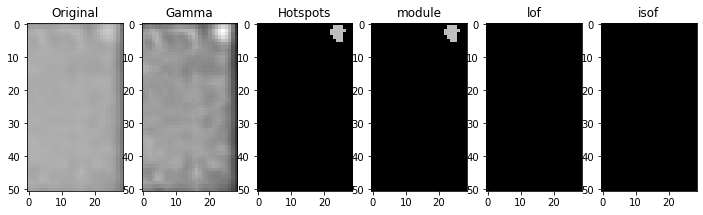

4266.jpg Normal
2617.jpg Normal
2171.jpg Normal
4500.jpg Normal
1478.jpg Single-Hotspot


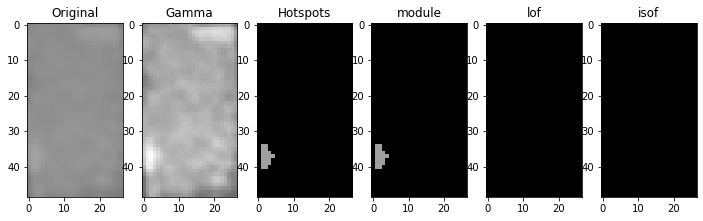

2165.jpg Multi-Hotspots


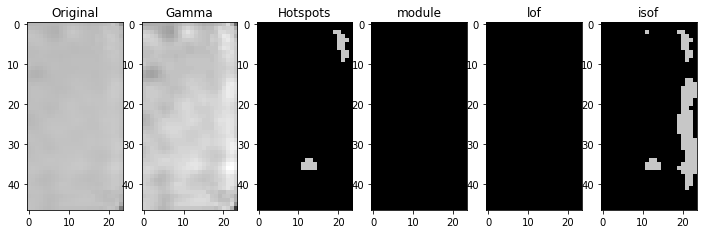

4514.jpg Single-Hotspot


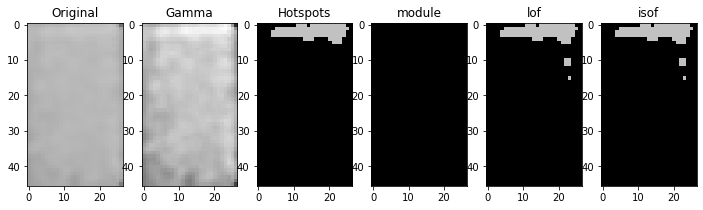

4272.jpg Normal
2603.jpg Normal
846.jpg Normal
675.jpg Normal
2830.jpg Normal
4299.jpg Normal
3290.jpg Normal
113.jpg Normal
1487.jpg Normal
1493.jpg Normal
107.jpg Normal
3284.jpg Normal
2824.jpg Normal
661.jpg Normal
891.jpg Normal
649.jpg Normal
885.jpg Normal
2818.jpg Normal
3051.jpg Normal
1646.jpg Normal
1120.jpg Normal
2429.jpg Normal
4058.jpg Normal
3737.jpg Normal
3723.jpg Normal
1134.jpg Normal
1652.jpg Normal
3045.jpg Normal
4702.jpg Normal
2373.jpg Normal
2415.jpg Normal
4064.jpg Normal
488.jpg Normal
1108.jpg Normal
2401.jpg Normal
4070.jpg Normal
3079.jpg Normal
4716.jpg Normal
2367.jpg Normal
1685.jpg Normal
311.jpg Normal
4925.jpg Normal
3092.jpg Normal
477.jpg Normal
463.jpg Normal
3938.jpg Normal
4931.jpg Normal
2398.jpg Normal
3086.jpg Normal
1849.jpg Normal
305.jpg Normal
1691.jpg Normal
4919.jpg Single-Hotspot


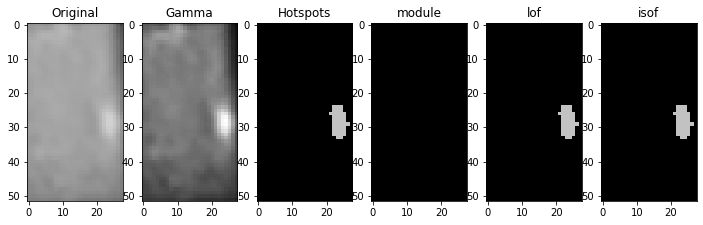

1861.jpg Normal
3910.jpg Normal
3904.jpg Normal
1875.jpg Normal
339.jpg Normal
4892.jpg Normal
3125.jpg Normal
1732.jpg Single-Hotspot


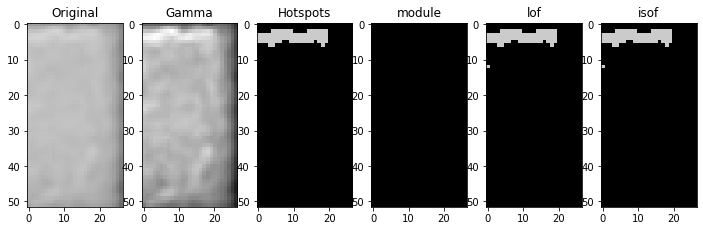

1054.jpg Normal
3643.jpg Single-Hotspot


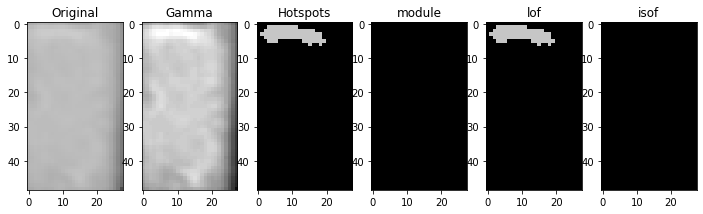

3657.jpg Normal
4138.jpg Normal
2549.jpg Normal
1040.jpg Normal
1726.jpg Normal
4886.jpg Normal
3131.jpg Normal
2207.jpg Normal
4676.jpg Normal
3119.jpg Normal
4110.jpg Normal
2561.jpg Normal
1068.jpg Normal
4104.jpg Normal
2575.jpg Normal
2213.jpg Normal
4662.jpg Normal
265.jpg Normal
1929.jpg Normal
4689.jpg Normal
4851.jpg Normal
3858.jpg Normal
3680.jpg Normal
1097.jpg Normal
503.jpg Normal
517.jpg Normal
1083.jpg Normal
3694.jpg Normal
4845.jpg Normal
271.jpg Normal
259.jpg Normal
1915.jpg Normal
3864.jpg Normal
3870.jpg Normal
1901.jpg Normal
4879.jpg Normal
5030.jpg Normal
2987.jpg Normal
3441.jpg Normal
1256.jpg Normal
1530.jpg Normal
3327.jpg Normal
4448.jpg Normal
2039.jpg Single-Hotspot


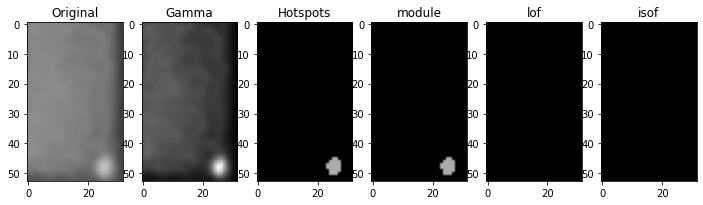

3333.jpg Normal
1524.jpg Normal
1242.jpg Normal
5024.jpg Normal
2993.jpg Normal
3455.jpg Normal
926.jpg Normal
2763.jpg Normal
4312.jpg Normal
4474.jpg Normal
2005.jpg Normal
1518.jpg Normal
4460.jpg Normal
2011.jpg Normal
2777.jpg Normal
5018.jpg Normal
4306.jpg Normal
3469.jpg Normal
932.jpg Normal
701.jpg Normal
1295.jpg Normal
2944.jpg Normal
3482.jpg Normal
2950.jpg Normal
3496.jpg Normal
2788.jpg Normal
1281.jpg Normal
715.jpg Normal
2978.jpg Normal
729.jpg Normal
728.jpg Normal
2979.jpg Normal
714.jpg Normal
1280.jpg Normal
2789.jpg Normal
3497.jpg Normal
2951.jpg Normal
3483.jpg Normal
2945.jpg Normal
1294.jpg Normal
700.jpg Normal
2010.jpg Normal
4461.jpg Junction-Box-Error
1519.jpg Normal
933.jpg Normal
3468.jpg Normal
4307.jpg Normal
5019.jpg Normal
2776.jpg Normal
4313.jpg Normal
2762.jpg Normal
927.jpg Normal
2004.jpg Normal
4475.jpg Normal
1525.jpg Normal
3332.jpg Junction-Box-Error
3454.jpg Normal
2992.jpg Normal
5025.jpg Normal
1243.jpg Normal
1257.jpg Normal
3440.jpg N

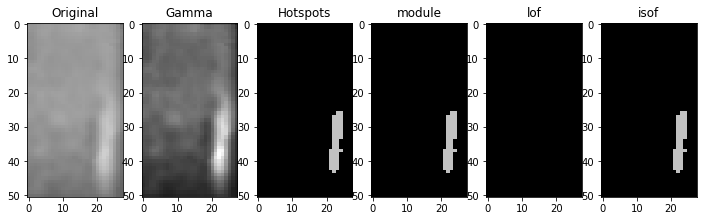

3871.jpg Multi-Hotspots


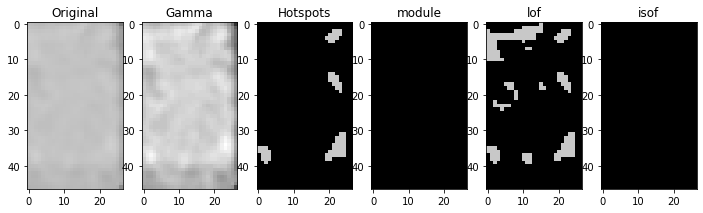

4878.jpg Normal
1900.jpg Normal
1914.jpg Normal
258.jpg Normal
3865.jpg Normal
3695.jpg Normal
1082.jpg Normal
516.jpg Normal
270.jpg Normal
4844.jpg Normal
4850.jpg Normal
4688.jpg Normal
1928.jpg Multi-Hotspots


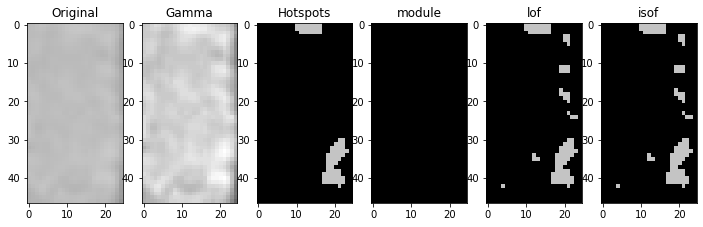

264.jpg Normal
502.jpg Normal
1096.jpg Normal
3681.jpg Normal
3859.jpg Normal
2574.jpg Normal
4105.jpg Normal
4663.jpg Normal
2212.jpg Normal
3118.jpg Normal
4677.jpg Normal
2206.jpg Normal
1069.jpg Normal
2560.jpg Normal
4111.jpg Normal
1041.jpg Normal
2548.jpg Normal
4139.jpg Normal
3656.jpg Normal
3130.jpg Normal
4887.jpg Normal
1727.jpg Normal
1733.jpg Multi-Hotspots


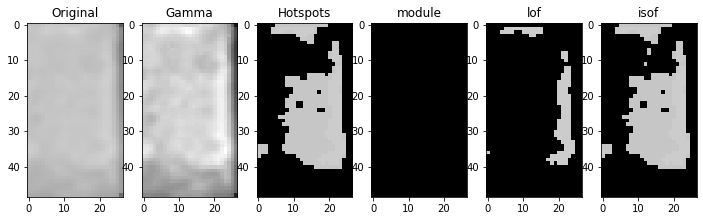

3124.jpg Normal
4893.jpg Normal
3642.jpg Normal
1055.jpg Normal
3905.jpg Normal
338.jpg Normal
1874.jpg Normal
1860.jpg Normal
4918.jpg Normal
3911.jpg Normal
3939.jpg Normal
462.jpg Normal
1690.jpg Normal
304.jpg Normal
1848.jpg Normal
3087.jpg Junction-Box-Error
2399.jpg Normal
4930.jpg Normal
3093.jpg Normal
4924.jpg Normal
310.jpg Normal
1684.jpg Single-Hotspot


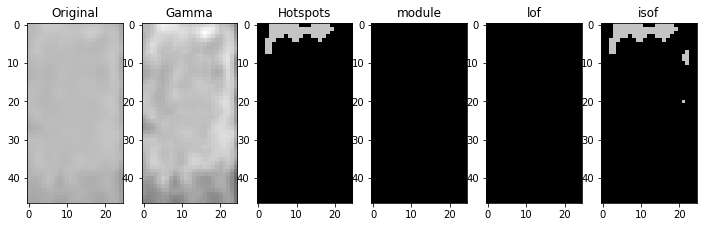

476.jpg Normal
4071.jpg Normal
2400.jpg Normal
1109.jpg Normal
2366.jpg Normal
4717.jpg Normal
3078.jpg Normal
2372.jpg Normal
4703.jpg Normal
489.jpg Normal
4065.jpg Normal
2414.jpg Normal
1135.jpg Normal
3722.jpg Normal
3044.jpg Normal
1653.jpg Normal
1647.jpg Normal
3050.jpg Normal
3736.jpg Normal
4059.jpg Normal
2428.jpg Normal
1121.jpg Normal
2819.jpg Normal
884.jpg Normal
648.jpg Normal
890.jpg Normal
3285.jpg Normal
106.jpg Normal
1492.jpg Normal
660.jpg Normal
2825.jpg Normal
4298.jpg Normal
2831.jpg Normal
674.jpg Normal
1486.jpg Normal
112.jpg Normal
3291.jpg Normal
4515.jpg Normal
2164.jpg Normal
847.jpg Normal
2602.jpg Normal
4273.jpg Normal
2616.jpg Normal
4267.jpg Normal
3508.jpg Normal
853.jpg Normal
13.jpg Normal
1479.jpg Normal
4501.jpg Normal
2170.jpg Normal
1451.jpg Normal
3246.jpg Normal
4529.jpg Normal
2158.jpg Single-Hotspot


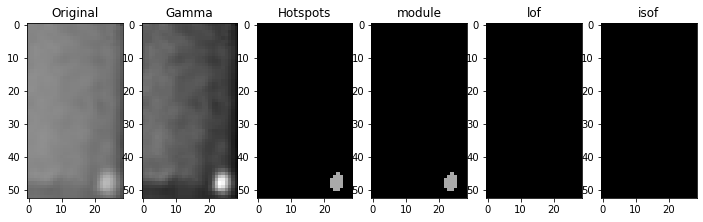

5151.jpg Normal
3520.jpg Normal
1337.jpg Normal
1323.jpg Normal
5145.jpg Normal
3534.jpg Normal
3252.jpg Normal
1445.jpg Normal
1335.jpg Normal
39.jpg Normal
879.jpg Normal
3522.jpg Normal
5153.jpg Normal
3244.jpg Normal
1453.jpg Normal
1447.jpg Normal
3250.jpg Normal
3536.jpg Normal
4259.jpg Normal
5147.jpg Normal
2628.jpg Normal
1321.jpg Normal
4271.jpg Normal
2600.jpg Normal
1309.jpg Normal
845.jpg Normal
2166.jpg Normal
4517.jpg Single-Hotspot


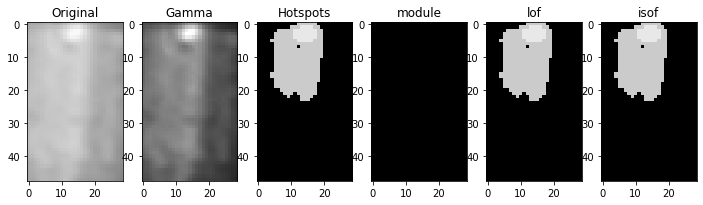

3278.jpg Normal
2172.jpg Normal
4503.jpg Normal
689.jpg Normal
11.jpg Normal
851.jpg Normal
4265.jpg Normal
2614.jpg Normal
2827.jpg Normal
662.jpg Normal
1490.jpg Normal
104.jpg Normal
3287.jpg Normal
2199.jpg Normal
3293.jpg Normal
110.jpg Normal
1484.jpg Normal
676.jpg Normal
2833.jpg Normal
886.jpg Normal
138.jpg Normal
892.jpg Normal
1651.jpg Normal
1889.jpg Normal
3046.jpg Normal
4729.jpg Normal
2358.jpg Normal
3720.jpg Normal
1137.jpg Normal
1123.jpg Normal
3734.jpg Normal
3052.jpg Normal
1645.jpg Normal
4715.jpg Normal
2364.jpg Normal
2402.jpg Normal
4073.jpg Normal
2416.jpg Normal
4067.jpg Normal
3708.jpg Single-Hotspot


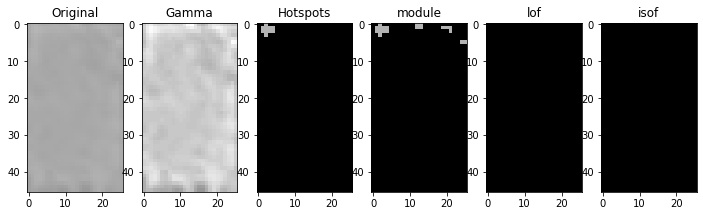

1679.jpg Normal
4701.jpg Normal
2370.jpg Normal
4932.jpg Normal
3085.jpg Normal
306.jpg Normal
1692.jpg Normal
460.jpg Normal
4098.jpg Normal
474.jpg Normal
1686.jpg Normal
312.jpg Normal
4926.jpg Normal
3091.jpg Normal
1876.jpg Normal
3907.jpg Normal
448.jpg Normal
3913.jpg Normal
1862.jpg Normal
1725.jpg Normal
4885.jpg Normal
3132.jpg Normal
3654.jpg Normal
1043.jpg Normal
1057.jpg Normal
3640.jpg Normal
3898.jpg Normal
2238.jpg Normal
4891.jpg Normal
4649.jpg Normal
3126.jpg Normal
1731.jpg Normal
2210.jpg Normal
4661.jpg Normal
1719.jpg Normal
3668.jpg Normal
4107.jpg Normal
2576.jpg Normal
4113.jpg Normal
2562.jpg Normal
299.jpg Normal
2204.jpg Normal
4675.jpg Normal
4846.jpg Normal
272.jpg Normal
514.jpg Normal
1080.jpg Normal
2589.jpg Normal
3697.jpg Normal
3683.jpg Normal
1094.jpg Normal
500.jpg Normal
266.jpg Normal
4852.jpg Normal
1902.jpg Normal
3873.jpg Normal
528.jpg Normal
3867.jpg Normal
1916.jpg Normal
1241.jpg Normal
2748.jpg Normal
5027.jpg Normal
4339.jpg Normal
299

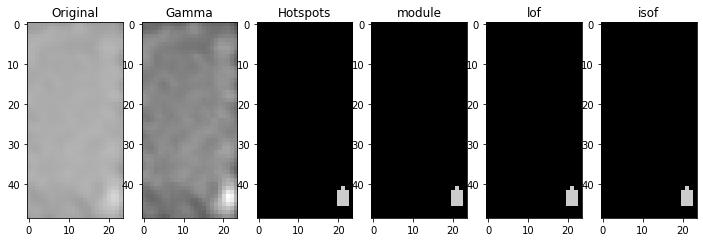

3481.jpg Normal
4489.jpg Normal
3480.jpg Normal
2946.jpg Normal
1297.jpg Normal
703.jpg Normal
717.jpg Single-Hotspot


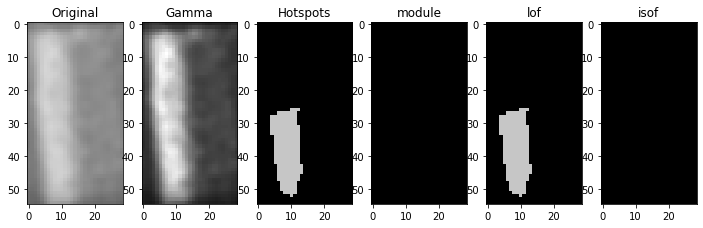

1283.jpg Normal
3494.jpg Normal
2952.jpg Normal
2007.jpg Normal
4476.jpg Normal
3319.jpg Normal
4310.jpg Normal
2761.jpg Normal
1268.jpg Normal
924.jpg Normal
930.jpg Normal
4304.jpg Normal
2775.jpg Normal
2013.jpg Normal
4462.jpg Normal
3325.jpg Normal
1532.jpg Normal
1254.jpg Normal
918.jpg Normal
3443.jpg Normal
2985.jpg Normal
5032.jpg Normal
3457.jpg Normal
2991.jpg Normal
4338.jpg Normal
5026.jpg Normal
2749.jpg Normal
1240.jpg Normal
1526.jpg Normal
3331.jpg Junction-Box-Error
3866.jpg Normal
1917.jpg Normal
1903.jpg Normal
529.jpg Normal
3872.jpg Normal
501.jpg Normal
1095.jpg Normal
3682.jpg Normal
4853.jpg Normal
267.jpg Normal
273.jpg Normal
4847.jpg Normal
3696.jpg Normal
2588.jpg Normal
1081.jpg Normal
515.jpg Normal
2563.jpg Normal
4112.jpg Normal
4674.jpg Normal
2205.jpg Normal
298.jpg Normal
1718.jpg Normal
4660.jpg Normal
2211.jpg Normal
2577.jpg Normal
4106.jpg Normal
3669.jpg Normal
3899.jpg Normal
3641.jpg Normal
1056.jpg Normal
1730.jpg Normal
3127.jpg Normal
4648.

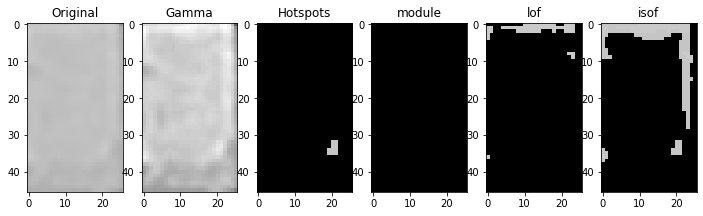

4890.jpg Normal
2239.jpg Normal
3133.jpg Normal
4884.jpg Normal
1724.jpg Normal
1042.jpg Normal
3655.jpg Normal
3912.jpg Normal
449.jpg Normal
1863.jpg Normal
1877.jpg Normal
3906.jpg Normal
475.jpg Normal
4099.jpg Normal
3090.jpg Normal
4927.jpg Normal
313.jpg Normal
1687.jpg Normal
1693.jpg Normal
307.jpg Normal
3084.jpg Normal
4933.jpg Normal
461.jpg Normal
3709.jpg Normal
4066.jpg Normal
2417.jpg Normal
2371.jpg Normal
4700.jpg Normal
1678.jpg Normal
2365.jpg Normal
4714.jpg Normal
4072.jpg Normal
2403.jpg Normal
3735.jpg Normal
1122.jpg Normal
1644.jpg Normal
3053.jpg Normal
2359.jpg Normal
4728.jpg Normal
3047.jpg Normal
1888.jpg Normal
1650.jpg Normal
1136.jpg Normal
3721.jpg Normal
893.jpg Normal
887.jpg Normal
139.jpg Normal
1485.jpg Normal
111.jpg Normal
3292.jpg Normal
2832.jpg Normal
677.jpg Normal
663.jpg Normal
2826.jpg Normal
2198.jpg Normal
3286.jpg Normal
105.jpg Normal
1491.jpg Normal
4502.jpg Normal
2173.jpg Normal
2615.jpg Normal
4264.jpg Normal
850.jpg Normal
10.jp

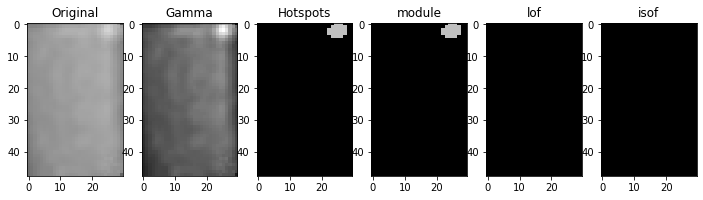

2368.jpg Normal
3710.jpg Normal
493.jpg Normal
1107.jpg Normal
478.jpg Normal
4094.jpg Normal
3923.jpg Normal
2383.jpg Normal
1852.jpg Normal
1846.jpg Normal
2397.jpg Normal
3089.jpg Normal
4080.jpg Single-Hotspot


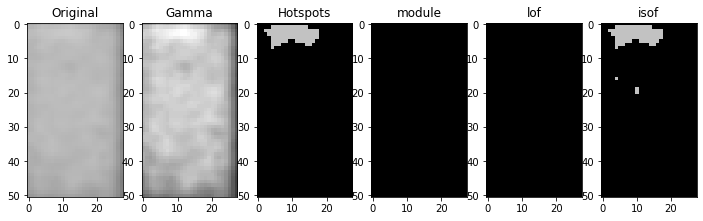

3937.jpg Normal
444.jpg Normal
322.jpg Normal
4916.jpg Normal
4902.jpg Normal
336.jpg Normal
450.jpg Normal
4123.jpg Normal
2552.jpg Normal
3894.jpg Normal
2234.jpg Normal
4645.jpg Normal
4889.jpg Normal
2220.jpg Multi-Hotspots


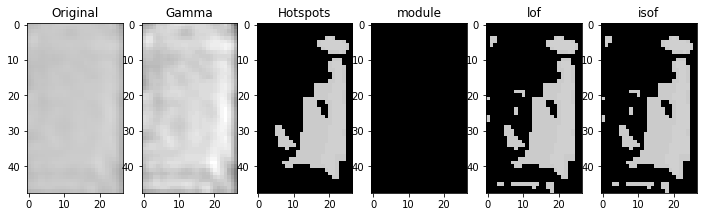

4651.jpg Normal
1729.jpg Normal
4137.jpg Normal
3658.jpg Normal
2546.jpg Normal
3880.jpg Normal
1067.jpg Normal
3670.jpg Normal
2208.jpg Normal
3116.jpg Normal
4679.jpg Normal
1701.jpg Normal
295.jpg Normal
281.jpg Normal
1715.jpg Normal
3102.jpg Normal
3664.jpg Normal
1073.jpg Normal
1098.jpg Normal
2591.jpg Normal
3857.jpg Normal
4686.jpg Normal
1926.jpg Normal
1932.jpg Single-Hotspot


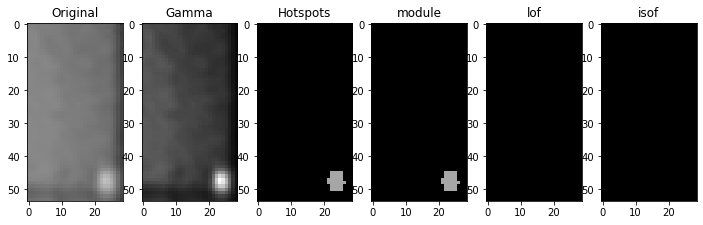

4692.jpg Normal
2585.jpg Normal
3843.jpg Normal
518.jpg Normal
530.jpg Normal
256.jpg Normal
4862.jpg Normal
4876.jpg Normal
242.jpg Normal
524.jpg Normal
4447.jpg Normal
3328.jpg Normal
2036.jpg Normal
915.jpg Normal
1259.jpg Normal
2750.jpg Normal
2988.jpg Normal
4321.jpg Single-Hotspot


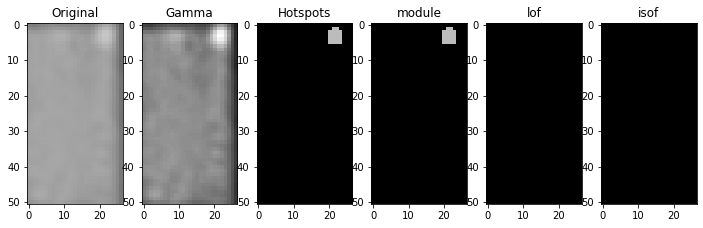

2744.jpg Normal
4335.jpg Normal
901.jpg Normal
4453.jpg Normal
2022.jpg Normal
1503.jpg Normal
3314.jpg Normal
5003.jpg Normal
3472.jpg Normal
929.jpg Normal
1265.jpg Normal
1271.jpg Normal
5017.jpg Normal
2778.jpg Normal
3466.jpg Normal
4309.jpg Normal
3300.jpg Normal
1517.jpg Normal
4484.jpg Normal
2793.jpg Normal
3499.jpg Normal
2787.jpg Normal
4490.jpg Normal
732.jpg Normal
2977.jpg Normal
2963.jpg Normal
726.jpg Normal
727.jpg Normal
2962.jpg Normal
2976.jpg Normal
733.jpg Normal
2786.jpg Normal
3498.jpg Normal
4491.jpg Junction-Box-Error
4485.jpg Normal
2792.jpg Normal
4308.jpg Normal
3467.jpg Normal
2779.jpg Normal
5016.jpg Multi-Hotspots


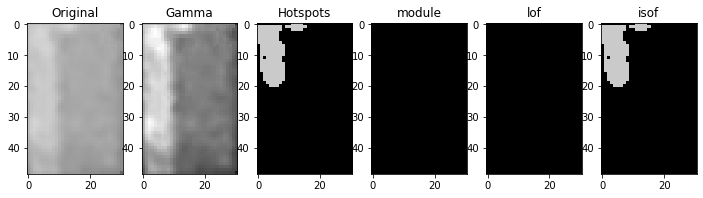

1270.jpg Normal
1516.jpg Normal
3301.jpg Normal
3315.jpg Normal
1502.jpg Normal
1264.jpg Normal
928.jpg Normal
3473.jpg Normal
5002.jpg Normal
900.jpg Single-Hotspot


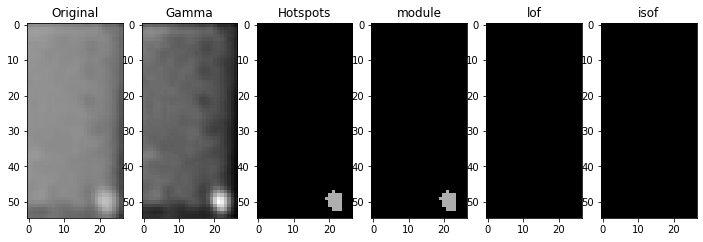

4334.jpg Normal
2745.jpg Normal
2023.jpg Normal
4452.jpg Normal
2037.jpg Normal
3329.jpg Normal
4446.jpg Normal
4320.jpg Normal
2989.jpg Normal
2751.jpg Normal
1258.jpg Normal
914.jpg Normal
243.jpg Normal
4877.jpg Single-Hotspot


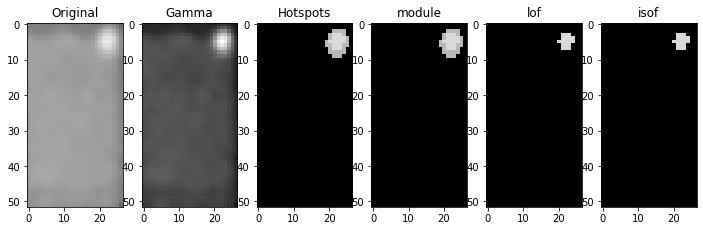

525.jpg Normal
531.jpg Normal
4863.jpg Normal
257.jpg Normal
4693.jpg Normal
1933.jpg Normal
519.jpg Normal
3842.jpg Normal
2584.jpg Normal
3856.jpg Single-Hotspot


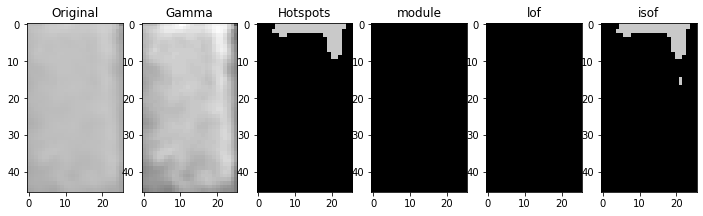

2590.jpg Normal
1099.jpg Normal
1927.jpg Normal
4687.jpg Normal
3103.jpg Normal
1714.jpg Normal
280.jpg Normal
1072.jpg Normal
3665.jpg Normal
3671.jpg Normal
1066.jpg Normal
294.jpg Normal
1700.jpg Normal
4678.jpg Normal
3117.jpg Normal
2209.jpg Normal
1728.jpg Normal
4650.jpg Normal
2221.jpg Normal
4888.jpg Normal
3881.jpg Normal
2547.jpg Normal
3659.jpg Normal
4136.jpg Single-Hotspot


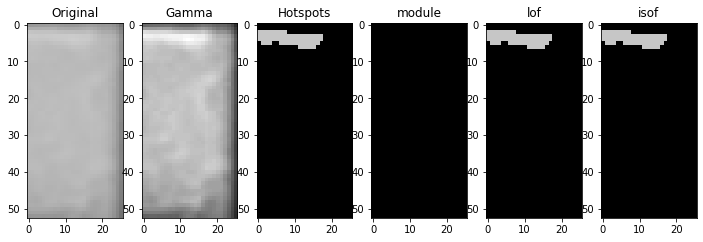

3895.jpg Normal
2553.jpg Normal
4122.jpg Normal
4644.jpg Normal
2235.jpg Normal
337.jpg Normal
4903.jpg Normal
451.jpg Normal
445.jpg Normal
4917.jpg Normal
323.jpg Normal
3088.jpg Normal
2396.jpg Normal
1847.jpg Normal
3936.jpg Normal
4081.jpg Normal
3922.jpg Normal
4095.jpg Normal
479.jpg Normal
1853.jpg Normal
2382.jpg Normal
2369.jpg Normal
3077.jpg Normal
4718.jpg Normal
1660.jpg Normal
1106.jpg Normal
492.jpg Normal
3711.jpg Normal
3705.jpg Normal
486.jpg Normal
1112.jpg Normal
1674.jpg Normal
3063.jpg Normal
1884.jpg Multi-Hotspots


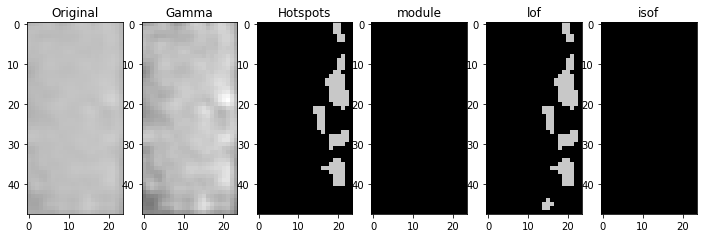

2355.jpg Normal
4724.jpg Normal
4042.jpg Normal
2433.jpg Normal
4056.jpg Normal
3739.jpg Normal
2427.jpg Normal
2341.jpg Single-Hotspot


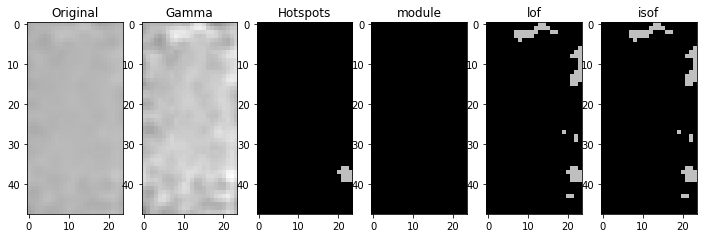

4730.jpg Normal
1890.jpg Normal
1648.jpg Single-Hotspot


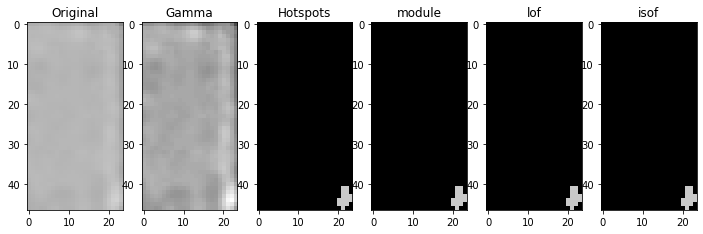

653.jpg Normal
2816.jpg Normal
135.jpg Normal
121.jpg Normal
2802.jpg Normal
647.jpg Normal
4283.jpg Normal
109.jpg Normal
2194.jpg Normal
2180.jpg Normal
1489.jpg Normal
4297.jpg Normal
3513.jpg Normal
848.jpg Normal
690.jpg Normal
1304.jpg Normal
1462.jpg Normal
3275.jpg Normal
3261.jpg Normal
1476.jpg Normal
1310.jpg Normal
684.jpg Normal
2619.jpg Normal
3507.jpg Normal
4268.jpg Normal
874.jpg Normal
1338.jpg Normal
34.jpg Normal
2631.jpg Normal
4240.jpg Normal
4526.jpg Normal
3249.jpg Normal
2157.jpg Normal
4532.jpg Normal
2143.jpg Multi-Hotspots


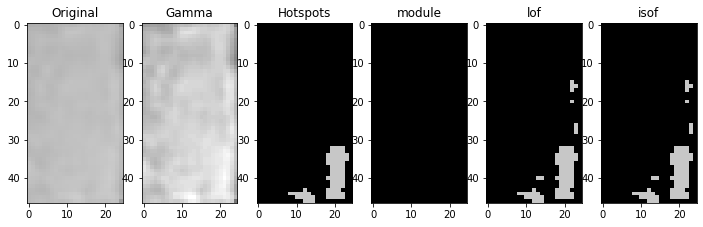

2625.jpg Normal
4254.jpg Normal
860.jpg Normal
20.jpg Normal
2155.jpg Normal
4524.jpg Normal
4242.jpg Normal
2633.jpg Normal
36.jpg Normal
876.jpg Normal
22.jpg Normal
862.jpg Normal
4256.jpg Multi-Hotspots


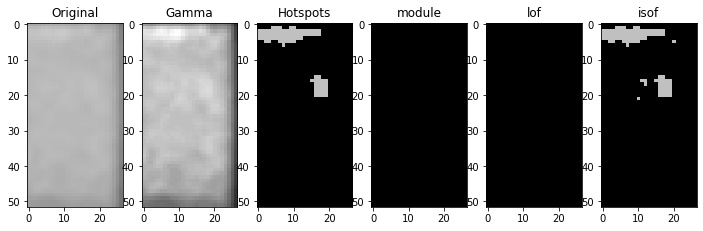

3539.jpg Normal
2627.jpg Normal
5148.jpg Normal
2141.jpg Normal
4530.jpg Single-Hotspot


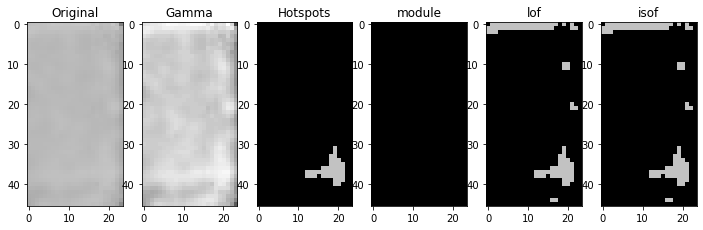

1448.jpg Normal
2169.jpg Normal
3277.jpg Normal
4518.jpg Normal
1460.jpg Normal
1306.jpg Normal
692.jpg Normal
3511.jpg Normal
3505.jpg Normal
686.jpg Normal
1312.jpg Normal
1474.jpg Normal
3263.jpg Normal
3288.jpg Normal
2196.jpg Normal
4281.jpg Normal
2828.jpg Normal
4295.jpg Normal
679.jpg Normal
2182.jpg Normal
137.jpg Normal
2814.jpg Normal
889.jpg Normal
651.jpg Normal
645.jpg Normal
2800.jpg Normal
123.jpg Normal
1138.jpg Normal
2431.jpg Normal
4040.jpg Normal
4726.jpg Normal
3049.jpg Normal
2357.jpg Normal
1886.jpg Normal
1892.jpg Normal
4732.jpg Normal
2343.jpg Normal
2425.jpg Normal
4054.jpg Normal
3713.jpg Normal
490.jpg Normal
1104.jpg Normal
1662.jpg Normal
3075.jpg Normal
3061.jpg Normal
1676.jpg Normal
1110.jpg Normal
484.jpg Normal
2419.jpg Normal
3707.jpg Normal
4068.jpg Normal
4083.jpg Normal
3934.jpg Normal
1845.jpg Normal
309.jpg Normal
2394.jpg Normal
2380.jpg Normal
4929.jpg Normal
1851.jpg Normal
1689.jpg Normal
4097.jpg Normal
3920.jpg Normal
453.jpg Normal
3908

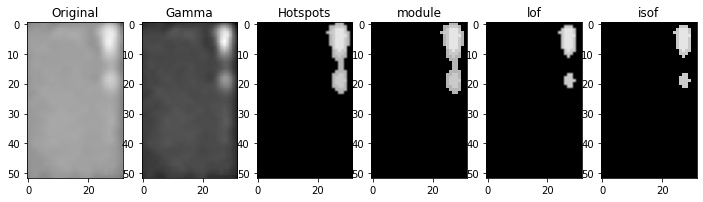

4120.jpg Normal
2551.jpg Normal
3897.jpg Normal
1058.jpg Normal
4108.jpg Normal
3667.jpg Normal
2579.jpg Normal
1070.jpg Normal
282.jpg Normal
1716.jpg Normal
3101.jpg Normal
3115.jpg Normal
1702.jpg Normal
296.jpg Normal
1064.jpg Normal
3673.jpg Normal
2586.jpg Normal
3840.jpg Normal
3698.jpg Normal
1931.jpg Normal
4691.jpg Normal
4849.jpg Normal
4685.jpg Normal
269.jpg Normal
1925.jpg Normal
2592.jpg Normal
3854.jpg Normal
527.jpg Normal
4875.jpg Normal
241.jpg Normal
255.jpg Normal
1919.jpg Normal
4861.jpg Normal
3868.jpg Normal
533.jpg Normal
1528.jpg Normal
4450.jpg Normal
2021.jpg Normal
5028.jpg Normal
2747.jpg Normal
3459.jpg Normal
4336.jpg Single-Hotspot


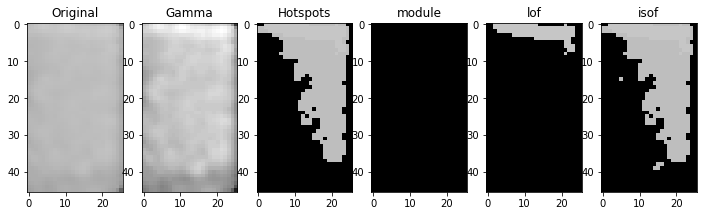

902.jpg Normal
916.jpg Normal
2753.jpg Normal
4322.jpg Normal
4444.jpg Normal
2035.jpg Normal
3303.jpg Normal
1514.jpg Normal
1272.jpg Normal
5014.jpg Normal
3465.jpg Normal
5000.jpg Normal
3471.jpg Normal
1266.jpg Normal
1500.jpg Normal
4478.jpg Normal
3317.jpg Single-Hotspot


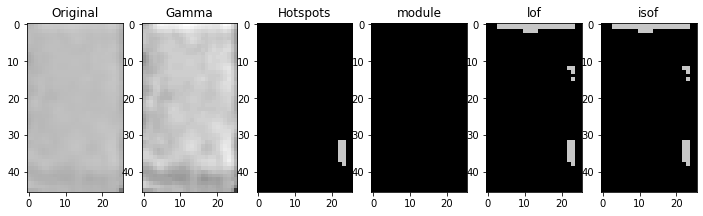

2009.jpg Normal
4493.jpg Normal
719.jpg Single-Hotspot


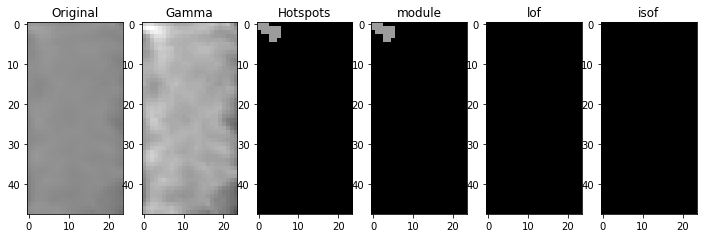

2784.jpg Normal
2948.jpg Normal
2790.jpg Normal
1299.jpg Normal
4487.jpg Normal
2960.jpg Normal
725.jpg Normal
731.jpg Normal
2974.jpg Normal
2975.jpg Normal
730.jpg Normal
724.jpg Normal
2961.jpg Normal
1298.jpg Normal
2791.jpg Normal
2949.jpg Normal
4486.jpg Normal
4492.jpg Normal
2785.jpg Normal
718.jpg Normal
1267.jpg Normal
3470.jpg Normal
5001.jpg Normal
2008.jpg Normal
3316.jpg Normal
4479.jpg Single-Hotspot


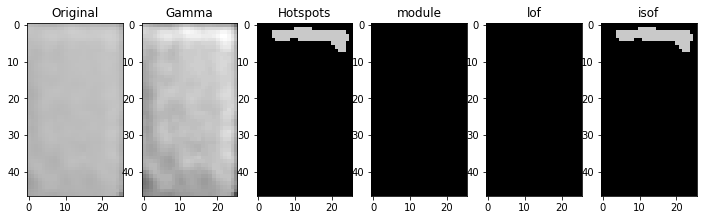

1501.jpg Multi-Hotspots


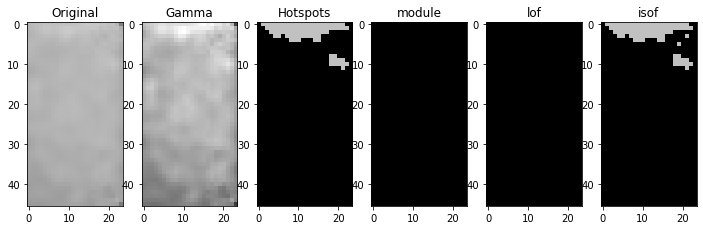

1515.jpg Single-Hotspot


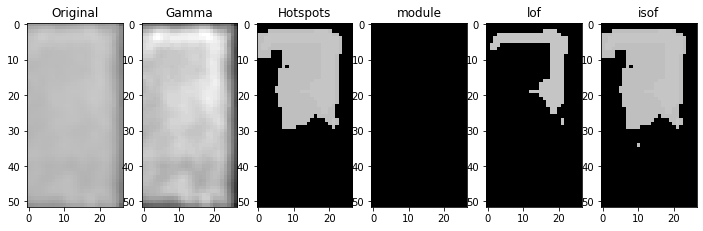

3302.jpg Normal
3464.jpg Normal
5015.jpg Normal
1273.jpg Normal
4323.jpg Normal
2752.jpg Normal
917.jpg Normal
2034.jpg Normal
4445.jpg Normal
2020.jpg Normal
4451.jpg Normal
1529.jpg Normal
903.jpg Normal
4337.jpg Normal
3458.jpg Normal
2746.jpg Normal
5029.jpg Normal
4860.jpg Normal
1918.jpg Normal
254.jpg Normal
532.jpg Normal
3869.jpg Normal
526.jpg Normal
240.jpg Normal
4874.jpg Single-Hotspot


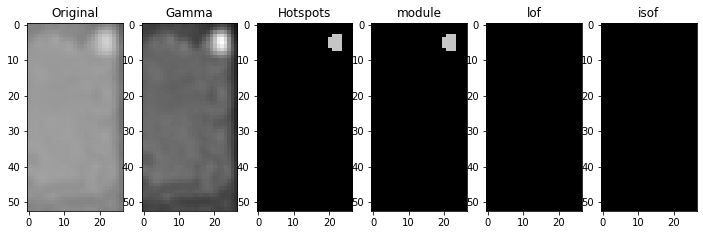

1924.jpg Normal
268.jpg Normal
4684.jpg Normal
3855.jpg Normal
2593.jpg Normal
3699.jpg Single-Hotspot


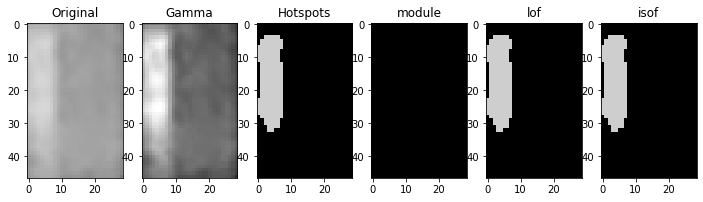

3841.jpg Normal
2587.jpg Normal
4848.jpg Normal
4690.jpg Normal
1930.jpg Normal
297.jpg Normal
1703.jpg Normal
3114.jpg Normal
3672.jpg Normal
1065.jpg Normal
1071.jpg Normal
2578.jpg Normal
3666.jpg Normal
4109.jpg Normal
3100.jpg Normal
1717.jpg Module-Anomaly


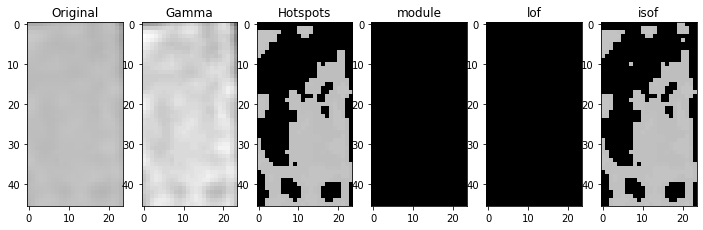

283.jpg Normal
4647.jpg Normal
3128.jpg Normal
2236.jpg Normal
1059.jpg Normal
3896.jpg Normal
2550.jpg Normal
4121.jpg Normal
3882.jpg Normal
2544.jpg Normal
4135.jpg Normal
4653.jpg Normal
2222.jpg Normal
4914.jpg Normal
320.jpg Normal
446.jpg Normal
3909.jpg Normal
452.jpg Normal
334.jpg Normal
1878.jpg Normal
4900.jpg Normal
1688.jpg Normal
1850.jpg Normal
4928.jpg Normal
2381.jpg Normal
3921.jpg Normal
4096.jpg Normal
3935.jpg Normal
4082.jpg Junction-Box-Error
2395.jpg Normal
308.jpg Normal
1844.jpg Normal
1677.jpg Normal
3060.jpg Normal
4069.jpg Normal
3706.jpg Normal
2418.jpg Normal
485.jpg Normal
1111.jpg Normal
1105.jpg Normal
491.jpg Normal
3712.jpg Normal
3074.jpg Normal
1663.jpg Normal
2342.jpg Normal
4733.jpg Single-Hotspot


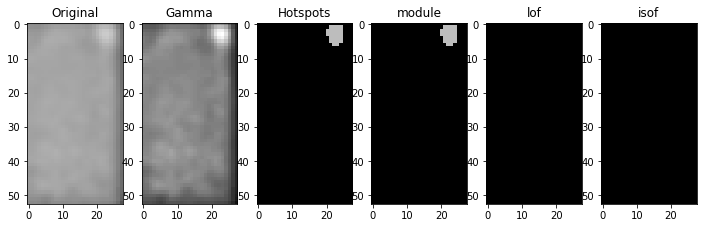

1893.jpg Normal
4055.jpg Normal
2424.jpg Normal
4041.jpg Normal
2430.jpg Normal
1139.jpg Normal
1887.jpg Normal
2356.jpg Normal
3048.jpg Normal
4727.jpg Normal
2801.jpg Normal
644.jpg Normal
122.jpg Normal
136.jpg Normal
650.jpg Normal
888.jpg Normal
2815.jpg Normal
678.jpg Normal
4294.jpg Normal
2183.jpg Multi-Hotspots


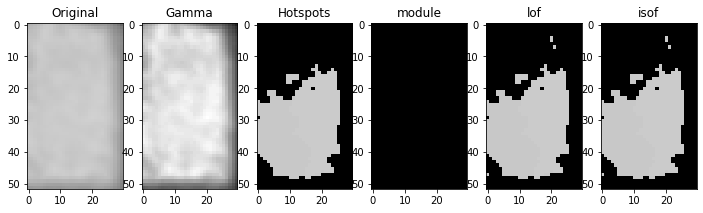

2197.jpg Normal
3289.jpg Normal
2829.jpg Normal
4280.jpg Normal
1313.jpg Normal
687.jpg Normal
3504.jpg Normal
3262.jpg Normal
1475.jpg Normal
1461.jpg Normal
4519.jpg Normal
3276.jpg Normal
2168.jpg Normal
3510.jpg Normal
693.jpg Normal
1307.jpg Normal
5149.jpg Normal
2626.jpg Normal
3538.jpg Normal
4257.jpg Normal
863.jpg Normal
23.jpg Normal
1449.jpg Normal
4531.jpg Normal
2140.jpg Normal
4525.jpg Normal
2154.jpg Normal
877.jpg Single-Hotspot


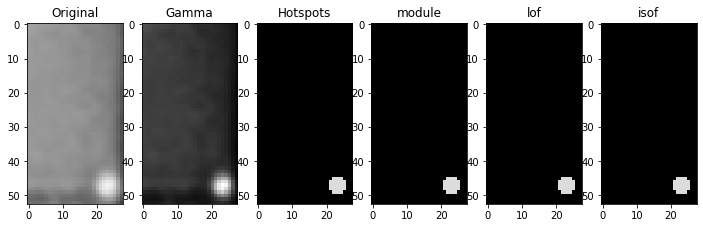

37.jpg Normal
2632.jpg Normal
4243.jpg Normal
1303.jpg Normal
697.jpg Normal
3514.jpg Multi-Hotspots


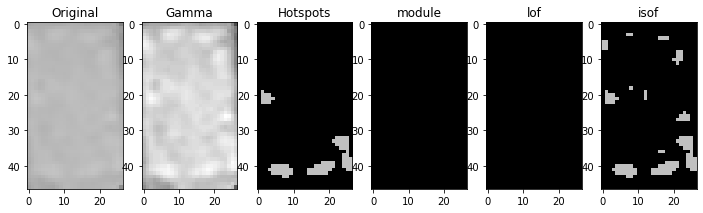

3272.jpg Normal
1465.jpg Normal
1471.jpg Normal
2178.jpg Normal
4509.jpg Normal
3266.jpg Normal
3500.jpg Normal
683.jpg Normal
1317.jpg Normal
3528.jpg Normal
4247.jpg Normal
2636.jpg Normal
33.jpg Normal
873.jpg Normal
1459.jpg Normal
2150.jpg Normal
4521.jpg Normal
2144.jpg Normal
4535.jpg Normal
27.jpg Normal
867.jpg Normal
4253.jpg Normal
2622.jpg Normal
2811.jpg Normal
654.jpg Normal
132.jpg Normal
126.jpg Normal
898.jpg Normal
640.jpg Normal
2805.jpg Normal
668.jpg Normal
4284.jpg Normal
2193.jpg Normal
3299.jpg Normal
2187.jpg Normal
4290.jpg Normal
2839.jpg Normal
1667.jpg Normal
3070.jpg Normal
2408.jpg Normal
4079.jpg Normal
3716.jpg Normal
495.jpg Normal
1101.jpg Normal
1115.jpg Normal
481.jpg Single-Hotspot


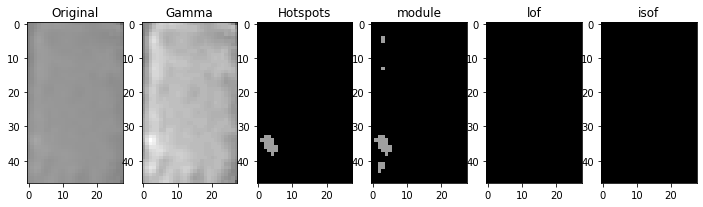

3702.jpg Normal
3064.jpg Normal
1673.jpg Normal
4723.jpg Normal
2352.jpg Normal
1883.jpg Normal
2434.jpg Normal
4045.jpg Normal
2420.jpg Single-Hotspot


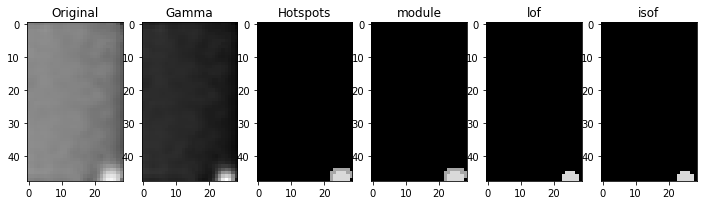

4051.jpg Normal
1129.jpg Normal
1897.jpg Normal
3058.jpg Normal
4737.jpg Normal
2346.jpg Normal
4904.jpg Normal
330.jpg Normal
456.jpg Normal
3919.jpg Normal
442.jpg Normal
1868.jpg Normal
324.jpg Normal
4910.jpg Normal
1840.jpg Normal
1698.jpg Normal
2391.jpg Normal
4938.jpg Normal
4086.jpg Normal
3931.jpg Multi-Hotspots


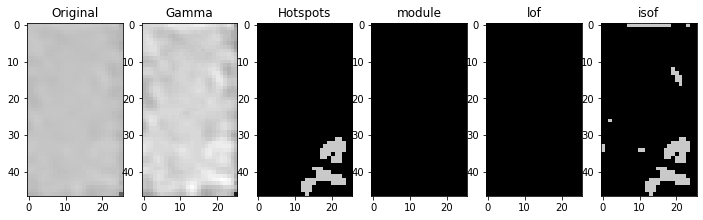

4092.jpg Normal
3925.jpg Normal
2385.jpg Normal
1854.jpg Normal
318.jpg Normal
287.jpg Normal
1713.jpg Normal
3104.jpg Normal
3662.jpg Normal
1075.jpg Normal
1061.jpg Normal
3676.jpg Normal
4119.jpg Normal
2568.jpg Normal
3110.jpg Normal
1707.jpg Normal
293.jpg Normal
2226.jpg Normal
4657.jpg Normal
3138.jpg Normal
1049.jpg Normal
4131.jpg Normal
3886.jpg Normal
2540.jpg Normal
4125.jpg Normal
3892.jpg Normal
2554.jpg Single-Hotspot


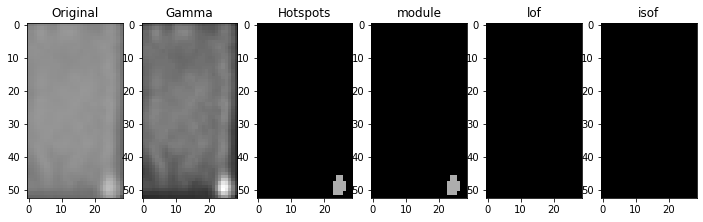

2232.jpg Normal
4643.jpg Normal
4870.jpg Normal
244.jpg Normal
1908.jpg Normal
522.jpg Normal
3879.jpg Junction-Box-Error
536.jpg Normal
250.jpg Normal
4864.jpg Normal
278.jpg Normal
1934.jpg Normal
4694.jpg Normal
3845.jpg Normal
2583.jpg Normal
3851.jpg Normal
2597.jpg Normal
3689.jpg Normal
4680.jpg Normal
4858.jpg Normal
1920.jpg Junction-Box-Error
1277.jpg Normal
5011.jpg Junction-Box-Error
3460.jpg Normal
3306.jpg Normal
4469.jpg Normal
2018.jpg Normal
1511.jpg Normal
1505.jpg Normal
3312.jpg Normal
5005.jpg Normal
3474.jpg Normal
1263.jpg Normal
2742.jpg Normal
4333.jpg Normal
907.jpg Normal
4455.jpg Normal
2024.jpg Normal
4441.jpg Normal
2030.jpg Normal
1539.jpg Normal
913.jpg Normal
2756.jpg Normal
5039.jpg Normal
4327.jpg Normal
3448.jpg Normal
2965.jpg Normal
720.jpg Normal
734.jpg Normal
2971.jpg Normal
1288.jpg Normal
2959.jpg Normal
2781.jpg Normal
4496.jpg Normal
4482.jpg Normal
2795.jpg Normal
708.jpg Normal
4483.jpg Normal
709.jpg Normal
2794.jpg Normal
2780.jpg Normal

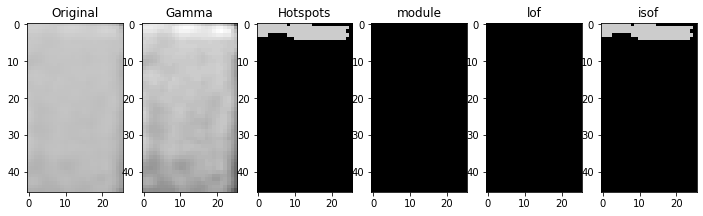

5004.jpg Normal
3461.jpg Normal
5010.jpg Normal
1276.jpg Normal
1510.jpg Single-Hotspot


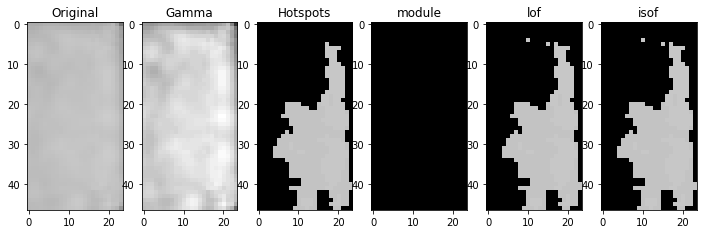

2019.jpg Single-Hotspot


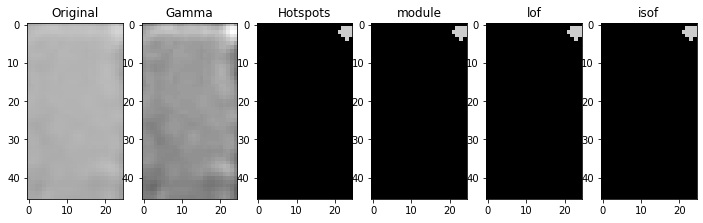

4468.jpg Normal
3307.jpg Normal
3688.jpg Normal
2596.jpg Normal
3850.jpg Normal
1921.jpg Normal
4859.jpg Normal
4681.jpg Normal
4695.jpg Normal
1935.jpg Normal
279.jpg Normal
2582.jpg Normal
3844.jpg Normal
537.jpg Normal
4865.jpg Normal
251.jpg Normal
1909.jpg Normal
245.jpg Normal
4871.jpg Normal
3878.jpg Normal
523.jpg Normal
2555.jpg Normal
3893.jpg Normal
4124.jpg Normal
4642.jpg Normal
2233.jpg Normal
3139.jpg Normal
4656.jpg Junction-Box-Error
2227.jpg Normal
2541.jpg Normal
3887.jpg Normal
4130.jpg Normal
1048.jpg Normal
2569.jpg Normal
4118.jpg Normal
3677.jpg Normal
1060.jpg Normal
292.jpg Normal
1706.jpg Normal
3111.jpg Normal
3105.jpg Normal
1712.jpg Normal
286.jpg Normal
1074.jpg Normal
3663.jpg Normal
3924.jpg Normal
4093.jpg Normal
319.jpg Normal
1855.jpg Normal
2384.jpg Normal
4939.jpg Normal
2390.jpg Normal
1699.jpg Normal
1841.jpg Normal
3930.jpg Normal
4087.jpg Normal
443.jpg Normal
3918.jpg Normal
4911.jpg Normal
325.jpg Normal
1869.jpg Normal
331.jpg Normal
4905.jp

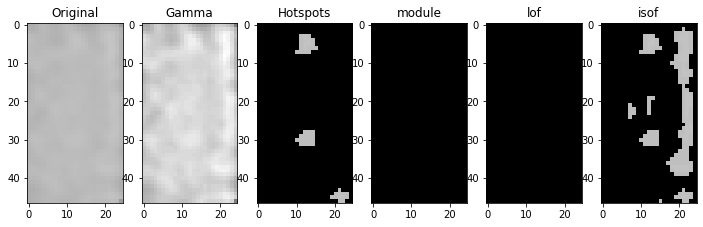

1666.jpg Normal
1100.jpg Normal
494.jpg Normal
3717.jpg Normal
4078.jpg Normal
2409.jpg Normal
2186.jpg Normal
3298.jpg Normal
2838.jpg Normal
4291.jpg Normal
4285.jpg Normal
669.jpg Normal
2192.jpg Normal
127.jpg Normal
2804.jpg Normal
641.jpg Normal
899.jpg Normal
655.jpg Normal
2810.jpg Normal
133.jpg Normal
4534.jpg Normal
2145.jpg Normal
2623.jpg Normal
4252.jpg Normal
866.jpg Normal
26.jpg Normal
872.jpg Normal
32.jpg Normal
2637.jpg Normal
4246.jpg Normal
3529.jpg Normal
4520.jpg Normal
2151.jpg Normal
1458.jpg Normal
3267.jpg Normal
4508.jpg Normal
2179.jpg Normal
1470.jpg Normal
1316.jpg Normal
682.jpg Normal
3501.jpg Normal
3515.jpg Normal
696.jpg Normal
1302.jpg Normal
1464.jpg Junction-Box-Error
3273.jpg Normal
3503.jpg Normal
680.jpg Normal
1314.jpg Normal
18.jpg Normal
858.jpg Normal
1472.jpg Normal
3265.jpg Normal
3271.jpg Normal
1466.jpg Normal
1300.jpg Normal
694.jpg Normal
3517.jpg Normal
4278.jpg Normal
2609.jpg Normal
1328.jpg Normal
24.jpg Normal
864.jpg Normal
425

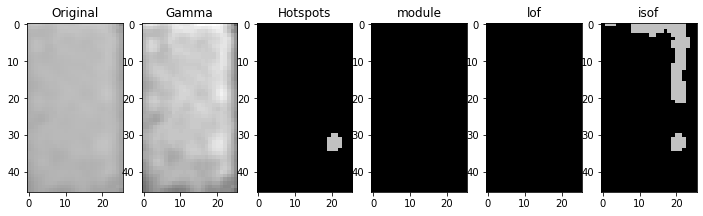

2635.jpg Normal
30.jpg Normal
870.jpg Normal
643.jpg Normal
2806.jpg Normal
125.jpg Normal
131.jpg Normal
2812.jpg Normal
657.jpg Normal
4293.jpg Normal
119.jpg Normal
2184.jpg Normal
2190.jpg Normal
1499.jpg Normal
4287.jpg Normal
3067.jpg Normal
4708.jpg Normal
2379.jpg Normal
1670.jpg Normal
1116.jpg Normal
482.jpg Normal
3701.jpg Normal
3715.jpg Normal
496.jpg Normal
1102.jpg Normal
1664.jpg Normal
3073.jpg Normal
1894.jpg Normal
4734.jpg Normal
2345.jpg Normal
2423.jpg Normal
4052.jpg Normal
2437.jpg Normal
4046.jpg Normal
3729.jpg Normal
4720.jpg Normal
2351.jpg Normal
1658.jpg Normal
1880.jpg Normal
327.jpg Normal
4913.jpg Normal
441.jpg Normal
455.jpg Normal
4907.jpg Normal
333.jpg Normal
2386.jpg Single-Hotspot


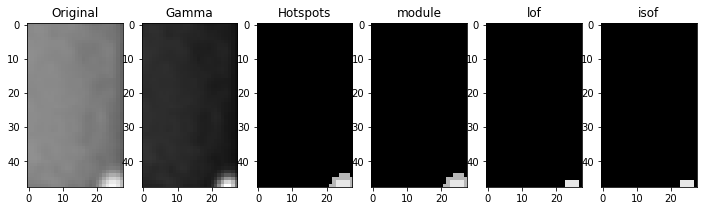

3098.jpg Normal
1857.jpg Multi-Hotspots


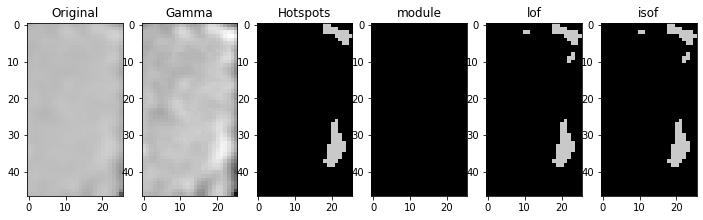

4091.jpg Normal
3926.jpg Single-Hotspot


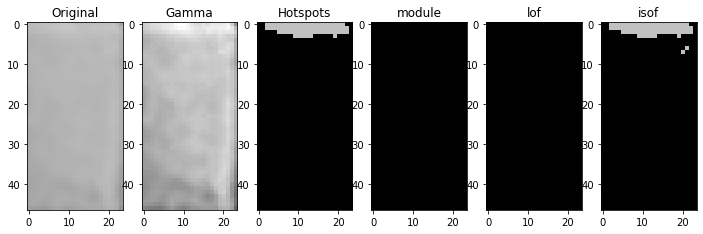

4085.jpg Normal
3932.jpg Normal
469.jpg Normal
1843.jpg Normal
2392.jpg Normal
3113.jpg Normal
1704.jpg Normal
290.jpg Normal
1062.jpg Normal
3675.jpg Normal
3661.jpg Normal
1076.jpg Normal
284.jpg Normal
1710.jpg Normal
2219.jpg Normal
4668.jpg Normal
3107.jpg Normal
1738.jpg Multi-Hotspots


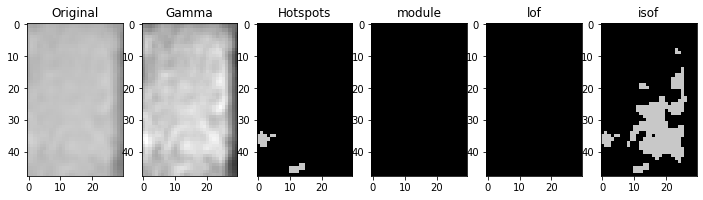

4898.jpg Normal
2231.jpg Normal
4640.jpg Normal
3649.jpg Junction-Box-Error
4126.jpg Normal
3891.jpg Normal
2557.jpg Normal
4132.jpg Normal
3885.jpg Normal
2543.jpg Normal
2225.jpg Normal
4654.jpg Normal
253.jpg Normal
4867.jpg Normal
535.jpg Normal
521.jpg Normal
4873.jpg Normal
247.jpg Normal
4683.jpg Normal
1923.jpg Normal
509.jpg Normal
3852.jpg Normal
2594.jpg Normal
3846.jpg Normal
2580.jpg Normal
1089.jpg Normal
1937.jpg Normal
4697.jpg Normal
2769.jpg Normal
5006.jpg Normal
4318.jpg Normal
3477.jpg Normal
1260.jpg Normal
1506.jpg Normal
3311.jpg Normal
3305.jpg Normal
1512.jpg Normal
938.jpg Normal
1274.jpg Normal
5012.jpg Normal
3463.jpg Normal
910.jpg Normal
2755.jpg Normal
4324.jpg Normal
4442.jpg Normal
2033.jpg Normal
3339.jpg Normal
4456.jpg Normal
2027.jpg Normal
2741.jpg Normal
2999.jpg Normal
4330.jpg Normal
904.jpg Normal
1248.jpg Single-Hotspot


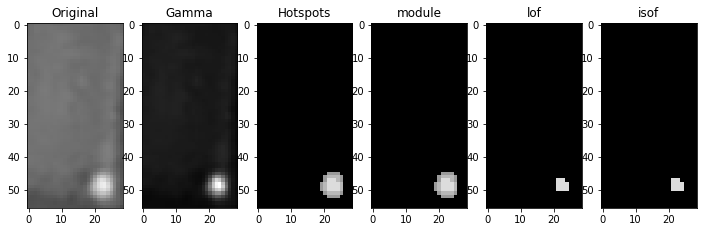

737.jpg Normal
2972.jpg Normal
2966.jpg Normal
723.jpg Normal
3488.jpg Normal
2796.jpg Normal
4481.jpg Normal
4495.jpg Normal
2782.jpg Normal
4494.jpg Normal
2783.jpg Normal
2797.jpg Normal
3489.jpg Normal
4480.jpg Normal
722.jpg Normal
2967.jpg Normal
2973.jpg Normal
736.jpg Normal
2026.jpg Normal
4457.jpg Junction-Box-Error
3338.jpg Normal
1249.jpg Normal
905.jpg Normal
4331.jpg Normal
2998.jpg Normal
2740.jpg Normal
4325.jpg Normal
2754.jpg Normal
911.jpg Normal
2032.jpg Normal
4443.jpg Normal
1513.jpg Normal
3304.jpg Normal
3462.jpg Normal
5013.jpg Normal
1275.jpg Normal
939.jpg Normal
1261.jpg Normal
3476.jpg Normal
4319.jpg Normal
5007.jpg Normal
2768.jpg Normal
3310.jpg Normal
1507.jpg Normal
1088.jpg Normal
2581.jpg Normal
3847.jpg Normal
4696.jpg Junction-Box-Error
1936.jpg Normal
1922.jpg Normal
4682.jpg Normal
2595.jpg Normal
3853.jpg Normal
508.jpg Normal
520.jpg Normal
246.jpg Normal
4872.jpg Normal
4866.jpg Normal
252.jpg Normal
534.jpg Normal
2542.jpg Normal
3884.jpg Nor

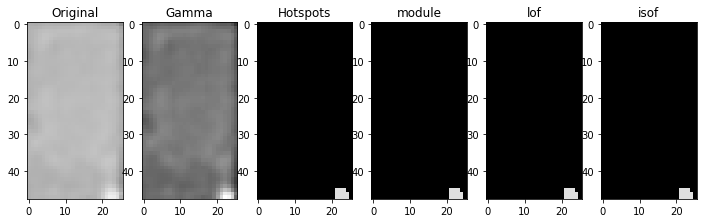

3112.jpg Normal
3674.jpg Normal
1063.jpg Normal
468.jpg Normal
3933.jpg Normal
4084.jpg Normal
2393.jpg Normal
1842.jpg Normal
1856.jpg Normal
3099.jpg Normal
2387.jpg Normal
3927.jpg Single-Hotspot


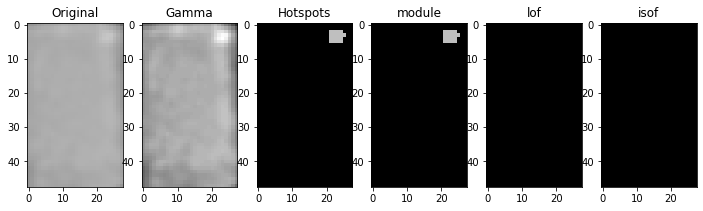

4090.jpg Normal
454.jpg Normal
332.jpg Normal
4906.jpg Normal
4912.jpg Normal
326.jpg Normal
440.jpg Normal
3728.jpg Normal
4047.jpg Normal
2436.jpg Normal
1881.jpg Normal
1659.jpg Normal
2350.jpg Normal
4721.jpg Normal
2344.jpg Normal
4735.jpg Normal
1895.jpg Normal
4053.jpg Normal
2422.jpg Normal
1103.jpg Normal
497.jpg Normal
3714.jpg Normal
3072.jpg Normal
1665.jpg Normal
1671.jpg Normal
2378.jpg Single-Hotspot


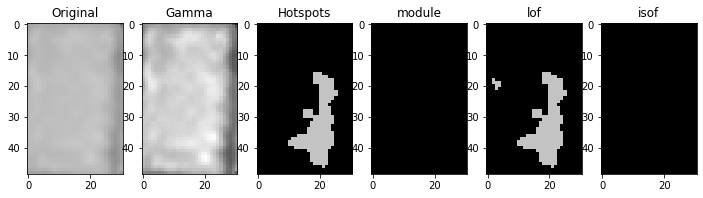

4709.jpg Normal
3066.jpg Normal
3700.jpg Normal
483.jpg Normal
1117.jpg Normal
1498.jpg Multi-Hotspots


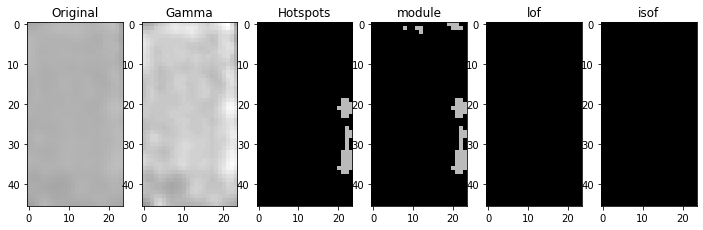

2191.jpg Normal
4286.jpg Normal
4292.jpg Junction-Box-Error
2185.jpg Normal
118.jpg Normal
130.jpg Normal
656.jpg Normal
2813.jpg Normal
2807.jpg Normal
642.jpg Normal
124.jpg Multi-Hotspots


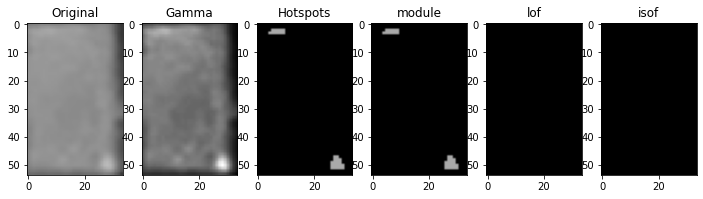

4523.jpg Normal
2152.jpg Single-Hotspot


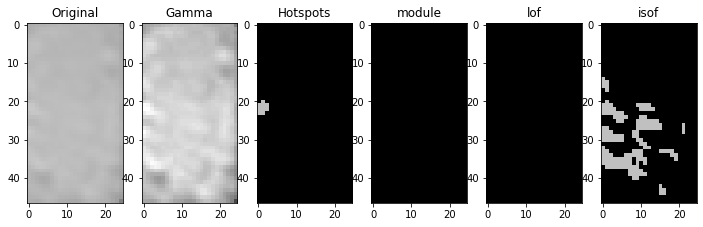

871.jpg Normal
31.jpg Normal
2634.jpg Normal
4245.jpg Normal
2620.jpg Normal
4251.jpg Normal
865.jpg Normal
25.jpg Normal
1329.jpg Normal
3258.jpg Normal
4537.jpg Normal
2146.jpg Normal
1467.jpg Normal
3270.jpg Normal
2608.jpg Normal
4279.jpg Normal
3516.jpg Normal
695.jpg Normal
1301.jpg Normal
859.jpg Normal
19.jpg Normal
1315.jpg Normal
681.jpg Normal
3502.jpg Normal
3264.jpg Normal
1473.jpg Normal
4236.jpg Normal
3559.jpg Normal
2647.jpg Normal
5128.jpg Normal
42.jpg Normal
802.jpg Normal
1428.jpg Normal
2121.jpg Normal
4550.jpg Normal
2135.jpg Normal
4.jpg Normal
4544.jpg Normal
56.jpg Normal
816.jpg Normal
4222.jpg Normal
2653.jpg Normal
1372.jpg Normal
3565.jpg Normal
5114.jpg Normal
3203.jpg Single-Hotspot


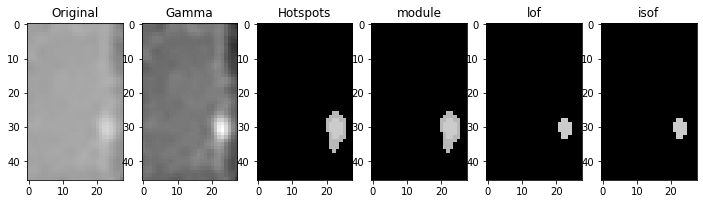

180.jpg Normal
1414.jpg Normal
1400.jpg Normal
194.jpg Normal
2109.jpg Normal
3217.jpg Normal
4578.jpg Normal
3571.jpg Normal
5100.jpg Normal
1366.jpg Normal
81.jpg Normal
619.jpg Normal
2684.jpg Normal
4593.jpg Normal
4587.jpg Normal
2690.jpg Normal
2848.jpg Normal
95.jpg Normal
1399.jpg Normal
2860.jpg Normal
625.jpg Normal
143.jpg Normal
157.jpg Normal
631.jpg Normal
2874.jpg Normal
4752.jpg Normal
2323.jpg Normal
3983.jpg Normal
2445.jpg Normal
4034.jpg Normal
3997.jpg Normal
2451.jpg Normal
4020.jpg Normal
1158.jpg Normal
4746.jpg Normal
3029.jpg Normal
2337.jpg Normal
1616.jpg Normal
382.jpg Normal
3001.jpg Normal
2479.jpg Normal
3767.jpg Normal
4008.jpg Normal
1170.jpg Normal
1164.jpg Normal
3773.jpg Normal
3015.jpg Normal
396.jpg Normal
1602.jpg Normal
1831.jpg Normal
4949.jpg Normal
4791.jpg Normal
3798.jpg Normal
3940.jpg Normal
2486.jpg Normal
3954.jpg Normal
2492.jpg Normal
4785.jpg Normal
1825.jpg Normal
369.jpg Normal
4975.jpg Normal
341.jpg Normal
427.jpg Normal
3968.jpg

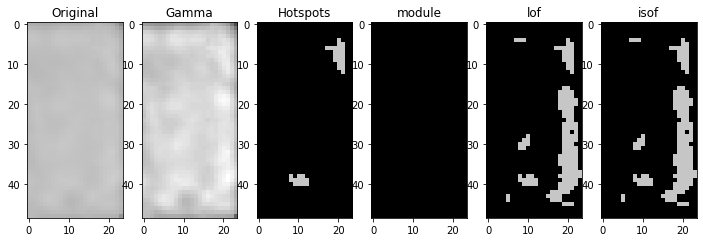

2243.jpg Normal
4632.jpg Normal
1762.jpg Normal
3175.jpg Normal
3613.jpg Normal
1004.jpg Normal
590.jpg Normal
584.jpg Normal
1010.jpg Normal
4168.jpg Normal
3607.jpg Normal
2519.jpg Normal
3161.jpg Normal
1776.jpg Normal
209.jpg Normal
1945.jpg Normal
2294.jpg Normal
3834.jpg Normal
4183.jpg Normal
3820.jpg Normal
4197.jpg Normal
2280.jpg Normal
4829.jpg Normal
1789.jpg Normal
1951.jpg Normal
4801.jpg Normal
235.jpg Normal
1979.jpg Normal
553.jpg Normal
3808.jpg Normal
547.jpg Normal
221.jpg Normal
4815.jpg Normal
2733.jpg Normal
4342.jpg Normal
976.jpg Normal
4424.jpg Normal
2055.jpg Normal
4430.jpg Normal
2041.jpg Single-Hotspot


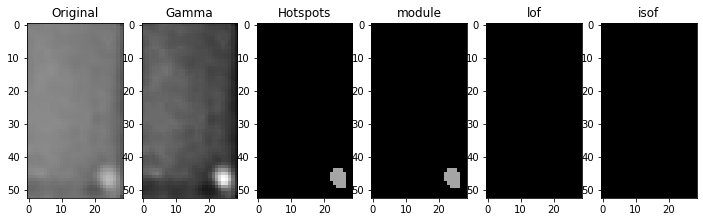

1548.jpg Normal
962.jpg Normal
5048.jpg Normal
2727.jpg Normal
3439.jpg Normal
4356.jpg Normal
792.jpg Normal
1206.jpg Normal
5060.jpg Normal
3411.jpg Normal
4418.jpg Normal
3377.jpg Normal
2069.jpg Normal
1560.jpg Normal
1574.jpg Junction-Box-Error
3363.jpg Normal
5074.jpg Normal
3405.jpg Normal
1212.jpg Single-Hotspot


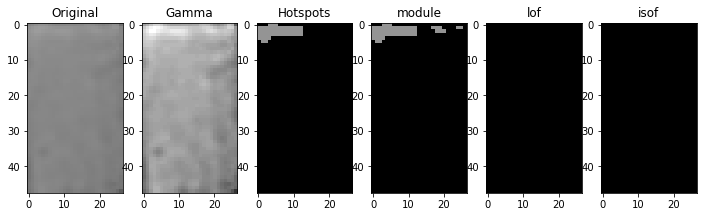

786.jpg Normal
4381.jpg Normal
2928.jpg Normal
2096.jpg Normal
3388.jpg Normal
2082.jpg Normal
4395.jpg Multi-Hotspots


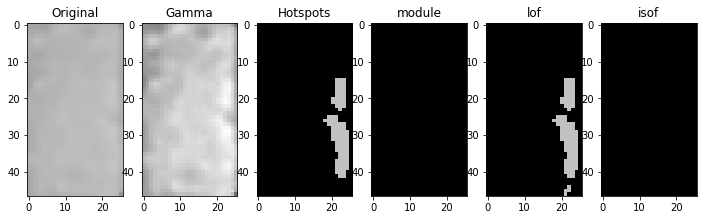

779.jpg Normal
2914.jpg Normal
751.jpg Normal
989.jpg Normal
745.jpg Normal
2900.jpg Normal
2901.jpg Normal
744.jpg Normal
988.jpg Normal
750.jpg Normal
2915.jpg Normal
2083.jpg Normal
778.jpg Normal
4394.jpg Normal
2929.jpg Normal
4380.jpg Normal
3389.jpg Normal
2097.jpg Normal
3362.jpg Normal
1575.jpg Normal
787.jpg Normal
1213.jpg Normal
3404.jpg Normal
5075.jpg Normal
3410.jpg Normal
5061.jpg Normal
1207.jpg Normal
793.jpg Normal
1561.jpg Normal
2068.jpg Normal
3376.jpg Normal
4419.jpg Normal
1549.jpg Normal
2040.jpg Normal
4431.jpg Normal
4357.jpg Normal
3438.jpg Normal
2726.jpg Normal
5049.jpg Normal
963.jpg Normal
977.jpg Normal
4343.jpg Normal
2732.jpg Normal
2054.jpg Normal
4425.jpg Normal
546.jpg Normal
4814.jpg Normal
220.jpg Normal
1978.jpg Normal
234.jpg Normal
4800.jpg Normal
3809.jpg Normal
552.jpg Normal
4196.jpg Normal
3821.jpg Multi-Hotspots


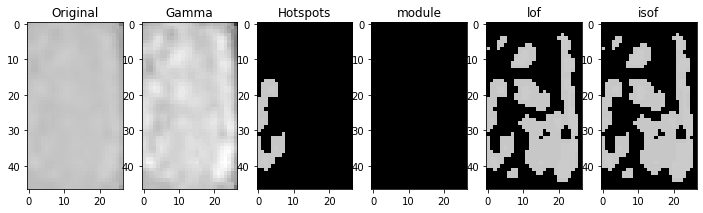

1950.jpg Normal
1788.jpg Normal
4828.jpg Normal
2281.jpg Normal
2295.jpg Normal
1944.jpg Normal
208.jpg Normal
4182.jpg Normal
3835.jpg Normal
2518.jpg Normal
3606.jpg Normal
4169.jpg Multi-Hotspots


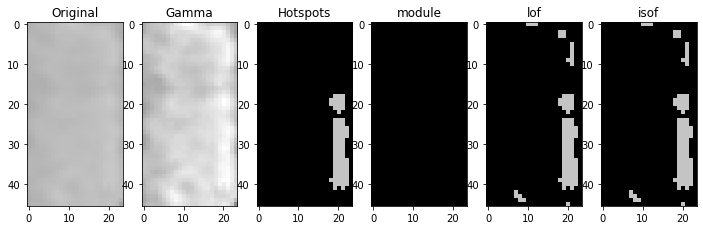

1011.jpg Normal
585.jpg Normal
1777.jpg Normal
3160.jpg Normal
3174.jpg Normal
1763.jpg Single-Hotspot


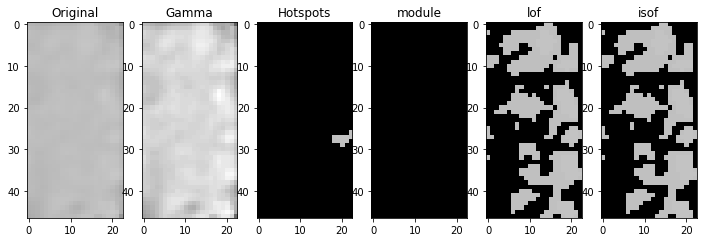

591.jpg Normal
1005.jpg Normal
3612.jpg Single-Hotspot


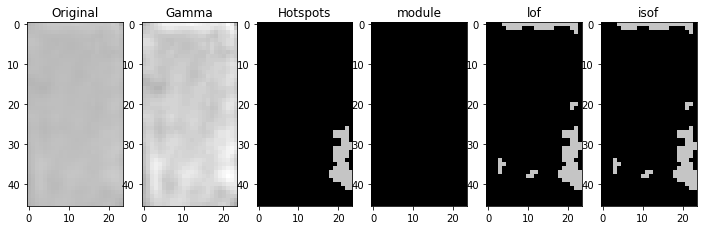

2524.jpg Normal
4155.jpg Normal
4633.jpg Normal
2242.jpg Normal
1993.jpg Normal
1987.jpg Normal
4627.jpg Normal
3148.jpg Normal
2256.jpg Normal
2530.jpg Normal
4141.jpg Normal
1039.jpg Normal
432.jpg Normal
3969.jpg Normal
4960.jpg Normal
354.jpg Normal
1818.jpg Normal
340.jpg Normal
4974.jpg Normal
426.jpg Normal
2493.jpg Normal
3955.jpg Normal
368.jpg Normal
1824.jpg Normal
4784.jpg Normal
4790.jpg Normal
4948.jpg Normal
1830.jpg Normal
2487.jpg Normal
3941.jpg Normal
3799.jpg Normal
3772.jpg Normal
1165.jpg Normal
1603.jpg Normal
397.jpg Normal
3014.jpg Normal
3000.jpg Normal
383.jpg Normal
1617.jpg Normal
1171.jpg Normal
4009.jpg Normal
3766.jpg Normal
2478.jpg Normal
1159.jpg Normal
4021.jpg Normal
2450.jpg Normal
3996.jpg Normal
2336.jpg Normal
3028.jpg Normal
4747.jpg Normal
2322.jpg Normal
4753.jpg Normal
4035.jpg Normal
2444.jpg Normal
3982.jpg Normal
156.jpg Normal
2875.jpg Normal
630.jpg Normal
624.jpg Normal
2861.jpg Normal
142.jpg Normal
4586.jpg Normal
1398.jpg Normal
94.

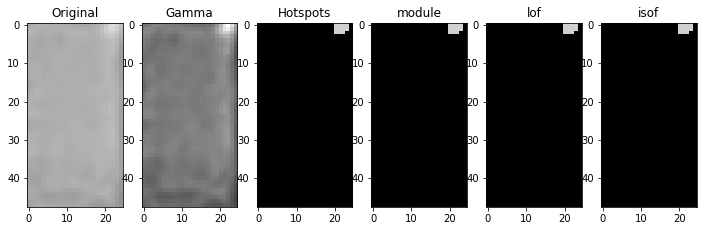

1367.jpg Normal
5101.jpg Normal
3570.jpg Normal
5115.jpg Normal
3564.jpg Junction-Box-Error
1373.jpg Normal
1415.jpg Normal
181.jpg Normal
3202.jpg Normal
4545.jpg Normal
5.jpg Normal
2134.jpg Normal
2652.jpg Single-Hotspot


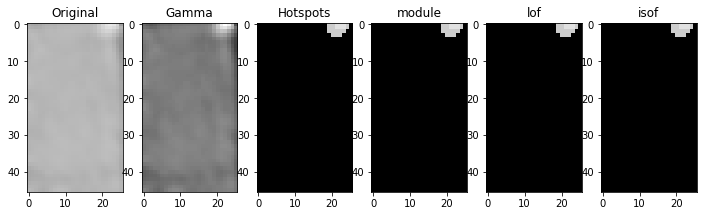

4223.jpg Normal
817.jpg Normal
57.jpg Normal
803.jpg Normal
43.jpg Normal
5129.jpg Normal
2646.jpg Normal
3558.jpg Normal
4237.jpg Normal
4551.jpg Normal
2120.jpg Normal
1429.jpg Normal
55.jpg Normal
1359.jpg Normal
815.jpg Normal
2888.jpg Normal
4221.jpg Normal
2650.jpg Normal
2136.jpg Normal
3228.jpg Normal
7.jpg Normal
4547.jpg Normal
2122.jpg Normal
4553.jpg Normal
4235.jpg Normal
2644.jpg Normal
41.jpg Normal
801.jpg Normal
3572.jpg Normal
5103.jpg Normal
69.jpg Normal
1365.jpg Normal
829.jpg Normal
1403.jpg Junction-Box-Error
197.jpg Normal
3214.jpg Normal
3200.jpg Normal
183.jpg Normal
1417.jpg Normal
1371.jpg Normal
4209.jpg Normal
3566.jpg Normal
2678.jpg Normal
5117.jpg Normal
2693.jpg Normal
96.jpg Normal
168.jpg Normal
4584.jpg Normal
4590.jpg Normal
82.jpg Normal
2687.jpg Normal
3599.jpg Normal
632.jpg Normal
2877.jpg Normal
154.jpg Normal
140.jpg Normal
2863.jpg Normal
626.jpg Normal
4745.jpg Normal
2334.jpg Normal
3994.jpg Normal
2452.jpg Normal
4023.jpg Normal
3980.jpg 

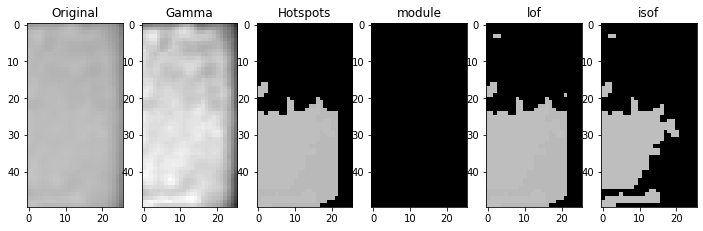

1167.jpg Normal
3770.jpg Normal
3764.jpg Normal
1173.jpg Normal
1615.jpg Multi-Hotspots


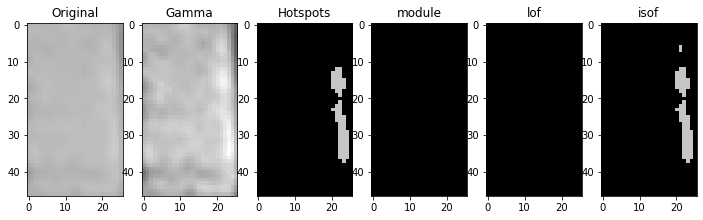

381.jpg Normal
3002.jpg Normal
4786.jpg Normal
1826.jpg Normal
1198.jpg Normal
3957.jpg Normal
2491.jpg Normal
3943.jpg Normal
2485.jpg Normal
418.jpg Normal
1832.jpg Normal
4792.jpg Normal
356.jpg Normal
4962.jpg Normal
430.jpg Normal
424.jpg Normal
4976.jpg Normal
342.jpg Normal
1991.jpg Normal
1749.jpg Normal
2240.jpg Normal
4631.jpg Normal
4157.jpg Normal
3638.jpg Normal
2526.jpg Normal
4143.jpg Junction-Box-Error
2532.jpg Normal
2254.jpg Normal
4625.jpg Normal
1985.jpg Normal
3162.jpg Normal
1775.jpg Normal
587.jpg Normal
1013.jpg Normal
3604.jpg Normal
3610.jpg Normal
1007.jpg Normal
593.jpg Normal
1761.jpg Normal
2268.jpg Normal
3176.jpg Normal
4619.jpg Normal
2283.jpg Multi-Hotspots


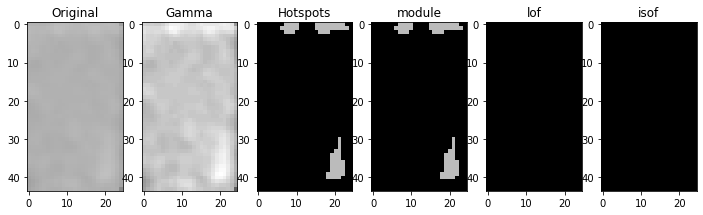

1952.jpg Normal
578.jpg Normal
3823.jpg Normal
4194.jpg Normal
3837.jpg Normal
4180.jpg Normal
1946.jpg Multi-Hotspots


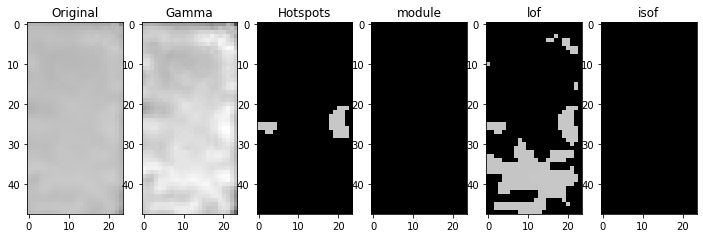

3189.jpg Normal
2297.jpg Normal
222.jpg Normal
4816.jpg Normal
544.jpg Normal
550.jpg Normal
4802.jpg Normal
236.jpg Normal
961.jpg Normal
2724.jpg Normal
4355.jpg Normal
4433.jpg Normal
2042.jpg Single-Hotspot


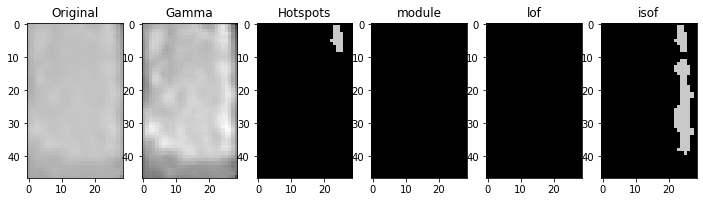

4427.jpg Normal
3348.jpg Normal
2056.jpg Normal
2730.jpg Normal
4341.jpg Normal
975.jpg Normal
1239.jpg Normal
5077.jpg Normal
2718.jpg Normal
3406.jpg Normal
4369.jpg Single-Hotspot


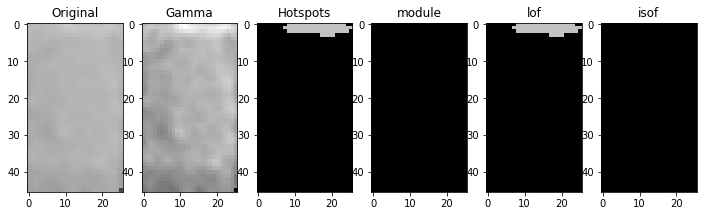

1211.jpg Normal
785.jpg Normal
1577.jpg Normal
3360.jpg Normal
3374.jpg Normal
1563.jpg Normal
949.jpg Normal
791.jpg Normal
1205.jpg Normal
5063.jpg Normal
3412.jpg Normal
4396.jpg Normal
5088.jpg Junction-Box-Error
1588.jpg Normal
2081.jpg Normal
2095.jpg Normal
4382.jpg Normal
746.jpg Normal
2903.jpg Normal
2917.jpg Normal
752.jpg Normal
753.jpg Normal
2916.jpg Normal
2902.jpg Normal
747.jpg Normal
2094.jpg Normal
4383.jpg Normal
5089.jpg Junction-Box-Error
4397.jpg Normal
2080.jpg Normal
1589.jpg Normal
1562.jpg Normal
3375.jpg Normal
3413.jpg Normal
5062.jpg Normal
1204.jpg Normal
790.jpg Normal
948.jpg Normal
784.jpg Normal
1210.jpg Normal
4368.jpg Normal
3407.jpg Normal
2719.jpg Normal
5076.jpg Normal
3361.jpg Normal
1576.jpg Normal
2057.jpg Normal
3349.jpg Normal
4426.jpg Normal
1238.jpg Normal
974.jpg Normal
4340.jpg Normal
2731.jpg Normal
4354.jpg Normal
2725.jpg Normal
960.jpg Normal
2043.jpg Normal
4432.jpg Normal
551.jpg Normal
237.jpg Normal
4803.jpg Normal
4817.jpg Norma

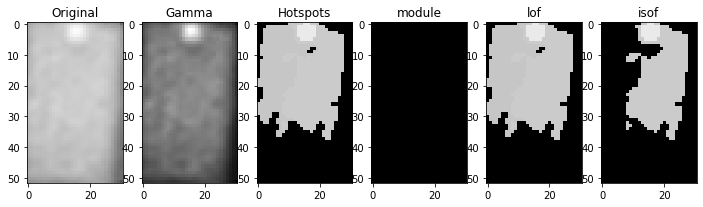

3759.jpg Normal
2447.jpg Normal
3981.jpg Normal
1628.jpg Normal
2321.jpg Normal
4988.jpg Normal
4750.jpg Normal
2335.jpg Normal
4744.jpg Normal
4022.jpg Normal
2453.jpg Normal
3995.jpg Normal
141.jpg Normal
627.jpg Normal
2862.jpg Normal
2876.jpg Normal
633.jpg Normal
155.jpg Normal
4591.jpg Normal
3598.jpg Normal
2686.jpg Normal
83.jpg Normal
97.jpg Normal
2692.jpg Normal
4585.jpg Normal
169.jpg Normal
1416.jpg Normal
182.jpg Normal
3201.jpg Normal
5116.jpg Normal
2679.jpg Normal
3567.jpg Normal
4208.jpg Normal
1370.jpg Normal
828.jpg Normal
1364.jpg Normal
68.jpg Normal
5102.jpg Normal
3573.jpg Normal
3215.jpg Normal
196.jpg Normal
1402.jpg Normal
4552.jpg Normal
2123.jpg Single-Hotspot


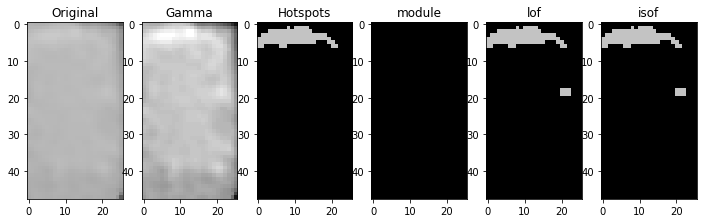

800.jpg Normal
40.jpg Normal
2645.jpg Normal
4234.jpg Normal
2651.jpg Normal
4220.jpg Normal
2889.jpg Normal
814.jpg Normal
1358.jpg Normal
54.jpg Normal
4546.jpg Normal
6.jpg Normal
3229.jpg Normal
2137.jpg Normal
1406.jpg Normal
192.jpg Normal
3211.jpg Normal
3577.jpg Normal
4218.jpg Normal
5106.jpg Normal
2669.jpg Normal
1360.jpg Normal
1374.jpg Normal
78.jpg Normal
838.jpg Normal
3563.jpg Normal
5112.jpg Normal
3205.jpg Normal
186.jpg Normal
1412.jpg Normal
2133.jpg Normal
4542.jpg Normal
2.jpg Normal
50.jpg Normal
810.jpg Normal
4224.jpg Normal
2655.jpg Normal
2899.jpg Normal
4230.jpg Normal
2641.jpg Normal
1348.jpg Normal
44.jpg Normal
804.jpg Normal
2127.jpg Normal
4556.jpg Normal
3239.jpg Normal
151.jpg Normal
637.jpg Normal
2872.jpg Normal
2866.jpg Normal
623.jpg Normal
145.jpg Normal
4581.jpg Normal
2696.jpg Normal
3588.jpg Normal
93.jpg Normal
87.jpg Normal
2682.jpg Normal
4595.jpg Normal
179.jpg Normal
1162.jpg Normal
3775.jpg Normal
3013.jpg Normal
390.jpg Normal
1604.jpg 

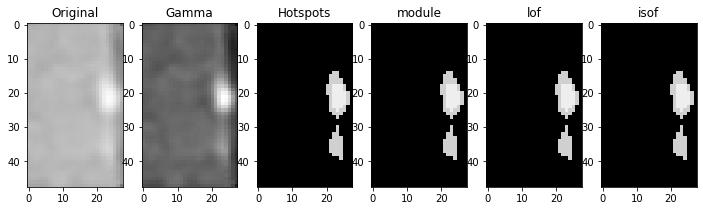

4740.jpg Normal
4998.jpg Normal
2331.jpg Normal
4754.jpg Normal
2325.jpg Multi-Hotspots


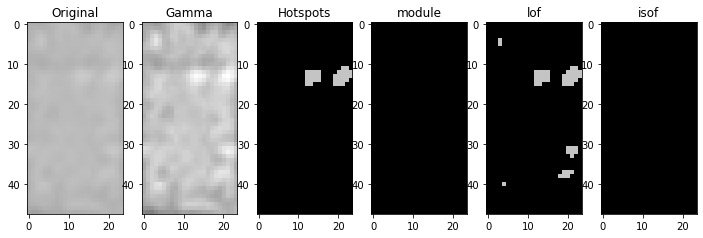

2443.jpg Normal
3985.jpg Single-Hotspot


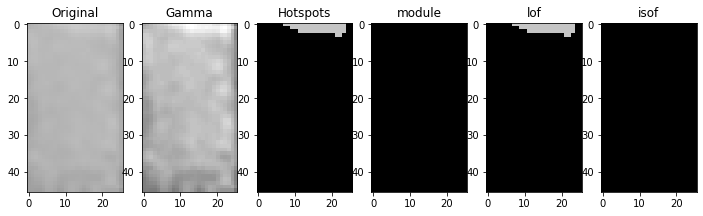

4032.jpg Normal
435.jpg Normal
353.jpg Normal
4967.jpg Normal
4973.jpg Normal
347.jpg Normal
421.jpg Normal
409.jpg Normal
2494.jpg Normal
3952.jpg Single-Hotspot


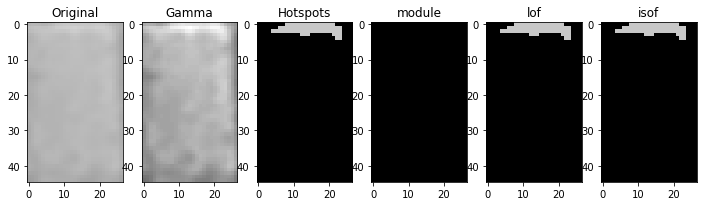

4783.jpg Normal
1823.jpg Normal
1837.jpg Normal
4797.jpg Normal
2480.jpg Normal
3946.jpg Normal
1189.jpg Normal
582.jpg Normal
1016.jpg Normal
3601.jpg Normal
2279.jpg Normal
4608.jpg Normal
3167.jpg Normal
1770.jpg Normal
1764.jpg Normal
3173.jpg Normal
3615.jpg Normal
1002.jpg Normal
596.jpg Normal
4152.jpg Normal
2523.jpg Normal
1994.jpg Normal
2245.jpg Normal
4634.jpg Normal
2251.jpg Normal
4620.jpg Normal
1980.jpg Normal
1758.jpg Normal
3629.jpg Normal
4146.jpg Normal
2537.jpg Normal
541.jpg Normal
227.jpg Normal
4813.jpg Normal
4807.jpg Normal
233.jpg Normal
555.jpg Normal
3826.jpg Single-Hotspot


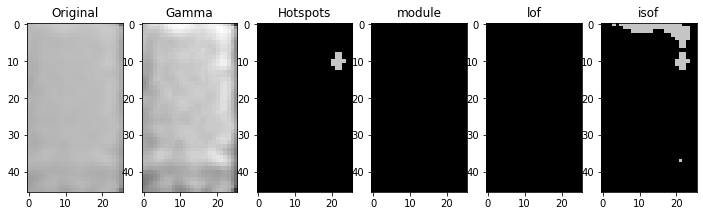

4191.jpg Normal
3198.jpg Normal
2286.jpg Normal
1957.jpg Normal
1943.jpg Normal
2292.jpg Normal
3832.jpg Normal
4185.jpg Normal
569.jpg Normal
1572.jpg Normal
3365.jpg Normal
5072.jpg Normal
3403.jpg Normal
958.jpg Normal
1214.jpg Single-Hotspot


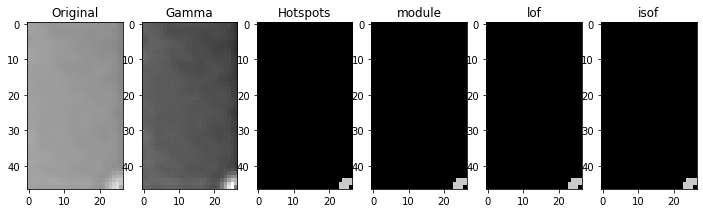

780.jpg Normal
794.jpg Normal
1200.jpg Normal
2709.jpg Normal
5066.jpg Normal
4378.jpg Normal
3417.jpg Normal
3371.jpg Normal
1566.jpg Single-Hotspot


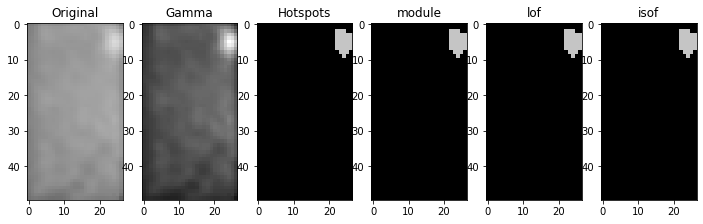

3359.jpg Normal
4436.jpg Normal
2047.jpg Normal
964.jpg Normal
1228.jpg Normal
2721.jpg Normal
4350.jpg Normal
2735.jpg Normal
4344.jpg Normal
970.jpg Normal
4422.jpg Normal
2053.jpg Normal
743.jpg Normal
2906.jpg Normal
2912.jpg Normal
757.jpg Normal
2084.jpg Normal
4393.jpg Normal
4387.jpg Normal
5099.jpg Normal
2090.jpg Normal
1599.jpg Normal
5098.jpg Normal
4386.jpg Normal
1598.jpg Normal
2091.jpg Normal
2085.jpg Normal
4392.jpg Normal
756.jpg Normal
2913.jpg Normal
2907.jpg Normal
742.jpg Normal
971.jpg Normal
4345.jpg Single-Hotspot


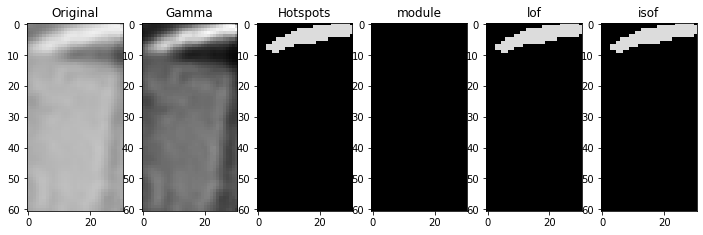

2734.jpg Normal
2052.jpg Normal
4423.jpg Normal
2046.jpg Normal
4437.jpg Normal
3358.jpg Normal
4351.jpg Normal
2720.jpg Normal
1229.jpg Normal
965.jpg Normal
3416.jpg Normal
4379.jpg Normal
5067.jpg Normal
2708.jpg Normal
1201.jpg Normal
795.jpg Normal
1567.jpg Normal
3370.jpg Normal
3364.jpg Normal
1573.jpg Normal
781.jpg Normal
1215.jpg Normal
959.jpg Normal
3402.jpg Normal
5073.jpg Normal
2293.jpg Normal
1942.jpg Normal
568.jpg Normal
4184.jpg Normal
3833.jpg Normal
4190.jpg Normal
3827.jpg Normal
1956.jpg Normal
2287.jpg Normal
3199.jpg Normal
232.jpg Normal
4806.jpg Normal
554.jpg Normal
540.jpg Normal
4812.jpg Normal
226.jpg Normal
1759.jpg Normal
1981.jpg Normal
4621.jpg Junction-Box-Error
2250.jpg Normal
2536.jpg Normal
4147.jpg Normal
3628.jpg Normal
2522.jpg Normal
4153.jpg Normal
4635.jpg Normal
2244.jpg Normal
1995.jpg Normal
3172.jpg Normal
1765.jpg Normal
597.jpg Normal
1003.jpg Normal
3614.jpg Normal
3600.jpg Normal
1017.jpg Normal
583.jpg Normal
1771.jpg Single-Hotspot

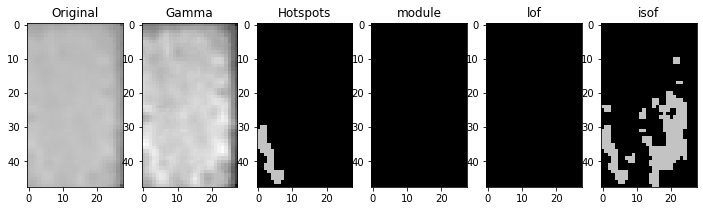

3166.jpg Normal
4609.jpg Normal
2278.jpg Normal
4796.jpg Normal
1836.jpg Normal
1188.jpg Normal
3947.jpg Normal
2481.jpg Normal
3953.jpg Normal
2495.jpg Normal
408.jpg Normal
1822.jpg Normal
4782.jpg Normal
346.jpg Normal
4972.jpg Normal
420.jpg Normal
434.jpg Normal
4966.jpg Normal
352.jpg Normal
2324.jpg Normal
4755.jpg Normal
4033.jpg Junction-Box-Error
3984.jpg Normal
2442.jpg Normal
3748.jpg Normal
4027.jpg Normal
3990.jpg Normal
2456.jpg Normal
2330.jpg Normal
4999.jpg Normal
4741.jpg Normal
1639.jpg Normal
2318.jpg Normal
4769.jpg Normal
3006.jpg Normal
385.jpg Normal
1611.jpg Normal
1177.jpg Normal
3760.jpg Normal
3774.jpg Normal
1163.jpg Normal
1605.jpg Normal
391.jpg Normal
3012.jpg Normal
2683.jpg Normal
86.jpg Normal
178.jpg Normal
4594.jpg Normal
4580.jpg Normal
92.jpg Normal
3589.jpg Normal
2697.jpg Normal
622.jpg Normal
2867.jpg Normal
144.jpg Normal
150.jpg Normal
2873.jpg Normal
636.jpg Normal
805.jpg Normal
45.jpg Normal
1349.jpg Normal
2640.jpg Normal
4231.jpg Normal

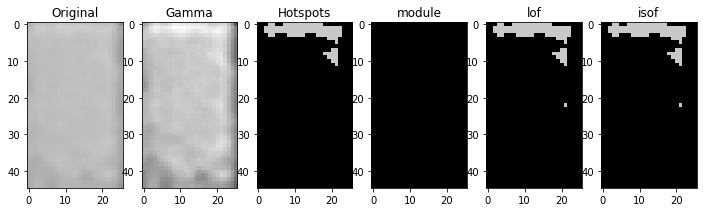

5111.jpg Normal
3574.jpg Normal
5105.jpg Normal
1363.jpg Normal
1405.jpg Normal
191.jpg Normal
3212.jpg Normal
2124.jpg Multi-Hotspots


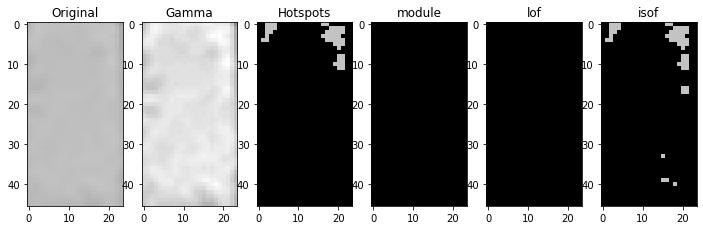

4555.jpg Normal
4233.jpg Normal
2642.jpg Normal
47.jpg Normal
807.jpg Normal
53.jpg Normal
813.jpg Normal
3548.jpg Normal
4227.jpg Normal
5139.jpg Junction-Box-Error
2656.jpg Normal
2130.jpg Normal
4541.jpg Normal
1.jpg Normal
1439.jpg Normal
146.jpg Normal
2865.jpg Normal
620.jpg Normal
634.jpg Normal
2871.jpg Normal
152.jpg Normal
4596.jpg Normal
1388.jpg Normal
84.jpg Normal
2681.jpg Normal
2859.jpg Normal
2695.jpg Normal
608.jpg Normal
90.jpg Normal
4582.jpg Normal
3762.jpg Normal
1175.jpg Normal
1613.jpg Normal
387.jpg Normal
3004.jpg Normal
3010.jpg Normal
393.jpg Normal
1607.jpg Normal
1161.jpg Normal
2468.jpg Normal
4019.jpg Normal
3776.jpg Normal
1149.jpg Normal
2440.jpg Normal
3986.jpg Multi-Hotspots


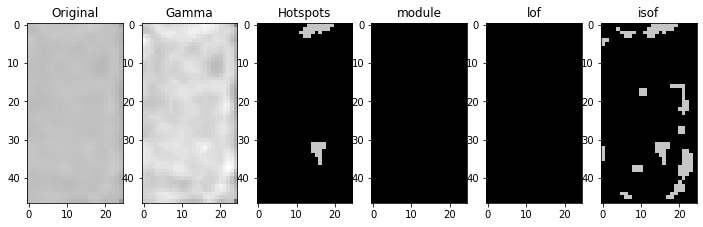

4031.jpg Normal
3038.jpg Normal
4757.jpg Normal
2326.jpg Normal
4743.jpg Normal
2332.jpg Normal
2454.jpg Normal
3992.jpg Normal
4025.jpg Normal
422.jpg Normal
3979.jpg Normal
4970.jpg Normal
1808.jpg Normal
344.jpg Normal
350.jpg Normal
4964.jpg Normal
436.jpg Normal
2483.jpg Normal
3945.jpg Normal
1834.jpg Module-Anomaly


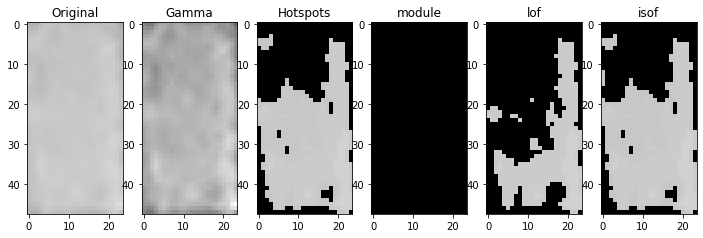

378.jpg Normal
4794.jpg Normal
4958.jpg Normal
4780.jpg Normal
1820.jpg Single-Hotspot


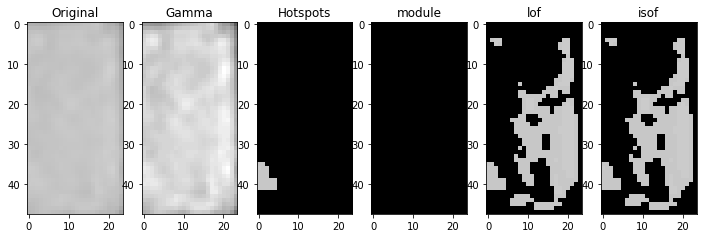

3789.jpg Normal
2497.jpg Normal
3951.jpg Normal
3616.jpg Normal
4179.jpg Normal
2508.jpg Normal
1001.jpg Normal
595.jpg Normal
1767.jpg Normal
3170.jpg Normal
3164.jpg Normal
1773.jpg Normal
581.jpg Normal
1015.jpg Normal
3602.jpg Normal
4145.jpg Normal
2534.jpg Normal
2252.jpg Normal
4623.jpg Normal
1983.jpg Normal
1997.jpg Normal
2246.jpg Normal
4637.jpg Normal
3158.jpg Normal
4151.jpg Normal
2520.jpg Normal
1029.jpg Normal
556.jpg Normal
4804.jpg Normal
230.jpg Normal
224.jpg Normal
1968.jpg Normal
4810.jpg Normal
3819.jpg Normal
542.jpg Normal
3831.jpg Normal
4186.jpg Normal
1798.jpg Normal
1940.jpg Normal
2291.jpg Normal
4838.jpg Normal
2285.jpg Junction-Box-Error
218.jpg Normal
1954.jpg Multi-Hotspots


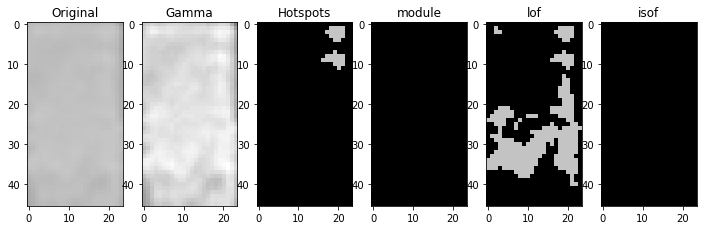

3825.jpg Single-Hotspot


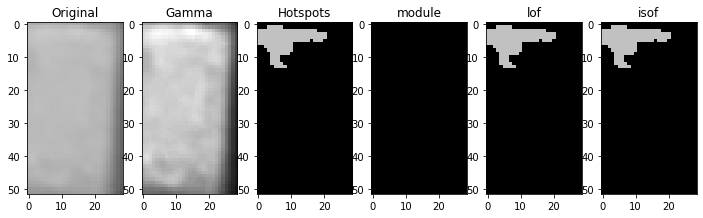

4192.jpg Normal
3372.jpg Normal
1565.jpg Normal
797.jpg Normal
1203.jpg Normal
5065.jpg Normal
3414.jpg Normal
5071.jpg Normal
3400.jpg Multi-Hotspots


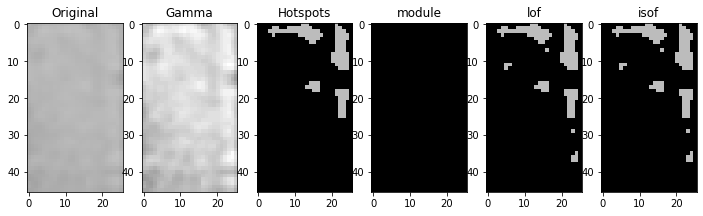

1217.jpg Normal
783.jpg Normal
1571.jpg Multi-Hotspots


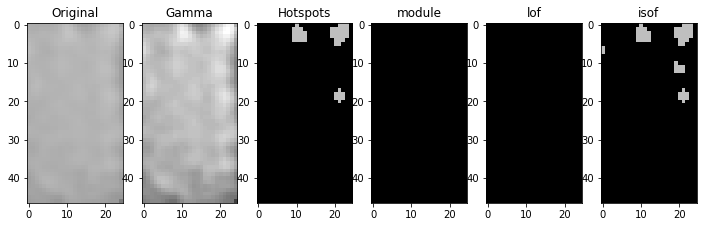

3366.jpg Normal
4409.jpg Normal
2078.jpg Normal
1559.jpg Multi-Hotspots


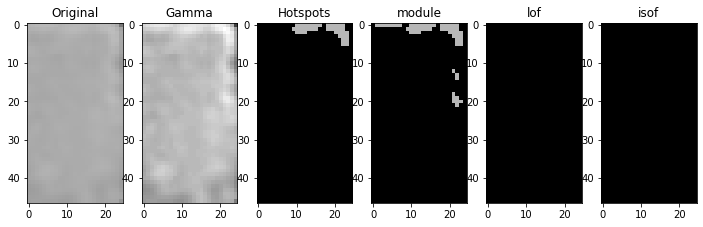

4421.jpg Normal
2050.jpg Junction-Box-Error
2736.jpg Normal
5059.jpg Normal
4347.jpg Normal
3428.jpg Normal
973.jpg Normal
967.jpg Normal
2722.jpg Normal
4353.jpg Normal
4435.jpg Normal
2044.jpg Normal
2911.jpg Normal
754.jpg Normal
740.jpg Normal
998.jpg Normal
2905.jpg Normal
2093.jpg Multi-Hotspots


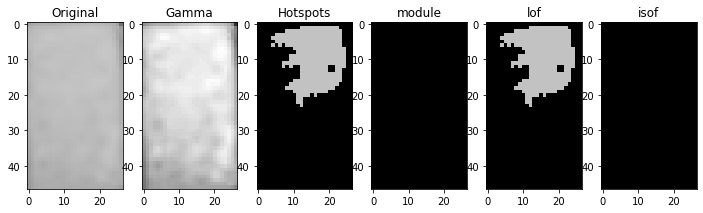

768.jpg Normal
4384.jpg Normal
4390.jpg Normal
2939.jpg Normal
2087.jpg Normal
3399.jpg Normal
2938.jpg Normal
4391.jpg Normal
3398.jpg Normal
2086.jpg Normal
2092.jpg Normal
4385.jpg Normal
769.jpg Normal
2904.jpg Normal
999.jpg Normal
741.jpg Normal
755.jpg Normal
2910.jpg Normal
4352.jpg Normal
2723.jpg Normal
966.jpg Normal
2045.jpg Normal
4434.jpg Normal
2051.jpg Normal
4420.jpg Normal
1558.jpg Normal
972.jpg Normal
3429.jpg Normal
4346.jpg Normal
5058.jpg Normal
2737.jpg Normal
782.jpg Normal
1216.jpg Normal
3401.jpg Normal
5070.jpg Junction-Box-Error
2079.jpg Normal
4408.jpg Normal
3367.jpg Normal
1570.jpg Normal
1564.jpg Normal
3373.jpg Normal
3415.jpg Normal
5064.jpg Normal
1202.jpg Normal
796.jpg Normal
1955.jpg Single-Hotspot


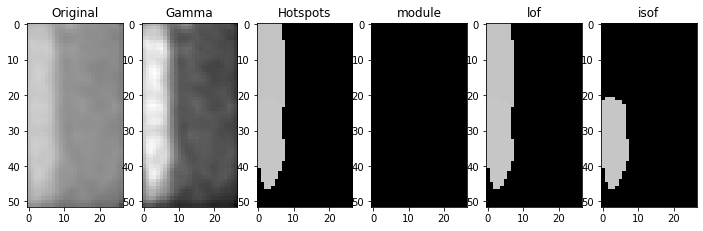

219.jpg Normal
2284.jpg Normal
4193.jpg Normal
3824.jpg Normal
4187.jpg Normal
3830.jpg Normal
4839.jpg Normal
2290.jpg Normal
1941.jpg Normal
1799.jpg Normal
4811.jpg Normal
1969.jpg Normal
225.jpg Normal
543.jpg Normal
3818.jpg Normal
557.jpg Normal
231.jpg Normal
4805.jpg Normal
3159.jpg Normal
4636.jpg Normal
2247.jpg Normal
1996.jpg Multi-Hotspots


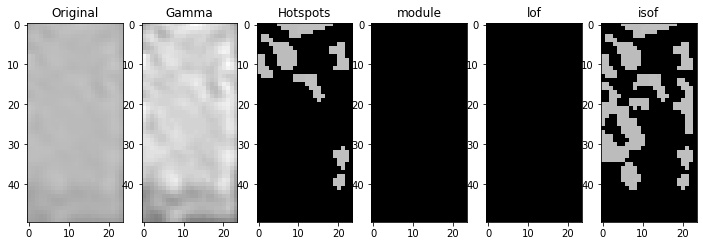

1028.jpg Normal
2521.jpg Normal
4150.jpg Normal
2535.jpg Normal
4144.jpg Normal
1982.jpg Normal
4622.jpg Normal
2253.jpg Normal
1772.jpg Normal
3165.jpg Normal
3603.jpg Normal
1014.jpg Normal
580.jpg Normal
594.jpg Normal
1000.jpg Normal
2509.jpg Normal
4178.jpg Normal
3617.jpg Normal
3171.jpg Normal
1766.jpg Normal
1821.jpg Normal
4781.jpg Normal
4959.jpg Normal
3950.jpg Normal
2496.jpg Normal
3788.jpg Normal
3944.jpg Normal
2482.jpg Normal
4795.jpg Normal
379.jpg Normal
1835.jpg Normal
4965.jpg Normal
351.jpg Normal
437.jpg Normal
3978.jpg Normal
423.jpg Normal
345.jpg Normal
1809.jpg Multi-Hotspots


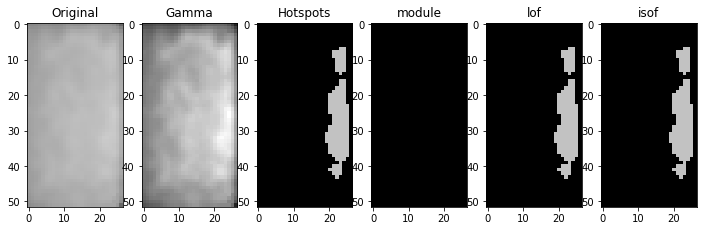

4971.jpg Normal
2333.jpg Normal
4742.jpg Normal
4024.jpg Normal
3993.jpg Normal
2455.jpg Normal
4030.jpg Single-Hotspot


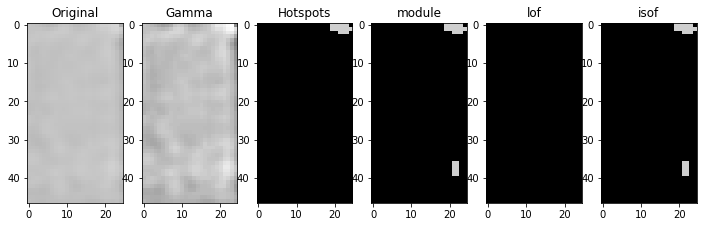

3987.jpg Normal
2441.jpg Normal
1148.jpg Normal
2327.jpg Normal
4756.jpg Normal
3039.jpg Normal
1606.jpg Normal
392.jpg Normal
3011.jpg Normal
3777.jpg Normal
4018.jpg Normal
2469.jpg Normal
1160.jpg Normal
1174.jpg Normal
3763.jpg Normal
3005.jpg Normal
386.jpg Normal
1612.jpg Normal
91.jpg Normal
609.jpg Normal
2694.jpg Normal
4583.jpg Normal
4597.jpg Junction-Box-Error
2858.jpg Normal
2680.jpg Normal
85.jpg Normal
1389.jpg Normal
2870.jpg Normal
635.jpg Normal
153.jpg Normal
147.jpg Normal
621.jpg Normal
2864.jpg Normal
2657.jpg Normal
5138.jpg Normal
4226.jpg Normal
3549.jpg Normal
812.jpg Normal
52.jpg Normal
1438.jpg Normal
0.jpg Normal
4540.jpg Normal
2131.jpg Normal
4554.jpg Normal
2125.jpg Normal
806.jpg Normal
46.jpg Normal
2643.jpg Normal
4232.jpg Normal
1362.jpg Normal
5104.jpg Normal
3575.jpg Single-Hotspot


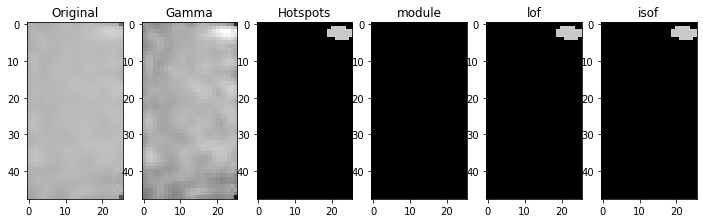

3213.jpg Normal
190.jpg Normal
1404.jpg Normal
1410.jpg Normal
184.jpg Normal
3207.jpg Normal
4568.jpg Normal
2119.jpg Module-Anomaly


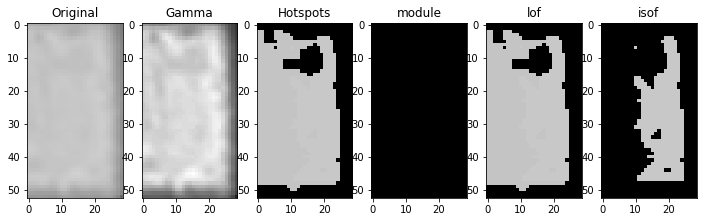

5110.jpg Normal
3561.jpg Normal
1376.jpg Normal
CPU times: user 8min 11s, sys: 7.39 s, total: 8min 19s
Wall time: 8min 21s


In [18]:
%%time
anomaly_modules = classifier.run(
    thermal_img_files, thermal_data, module_labels, input_dir_path)

異常モジュール可視化

In [19]:
modules = Modules(module_contours)
anomaly_contours = modules.get_anomaly_contours(anomaly_modules)

In [20]:
# ストリング異常の付与
if "Module-Anomaly" in anomaly_modules:
    string_anomaly_labels = modules.get_dbscan_labels(anomaly_contours["Module-Anomaly"])
    string_anomaly_modules = np.array(anomaly_modules["Module-Anomaly"])[string_anomaly_labels > 0]
    anomaly_modules["String-Anomaly"] = list(string_anomaly_modules )
    anomaly_contours = modules.get_anomaly_contours(anomaly_modules)

In [21]:
img_con = cv2.drawContours(np.zeros_like(img_org), module_contours, -1, 255, -1)
img_mask = cv2.bitwise_and(img_org, img_con)
img_mask_index = modules.add_index(img_mask)

In [22]:
#plt.imshow(img_mask_index)

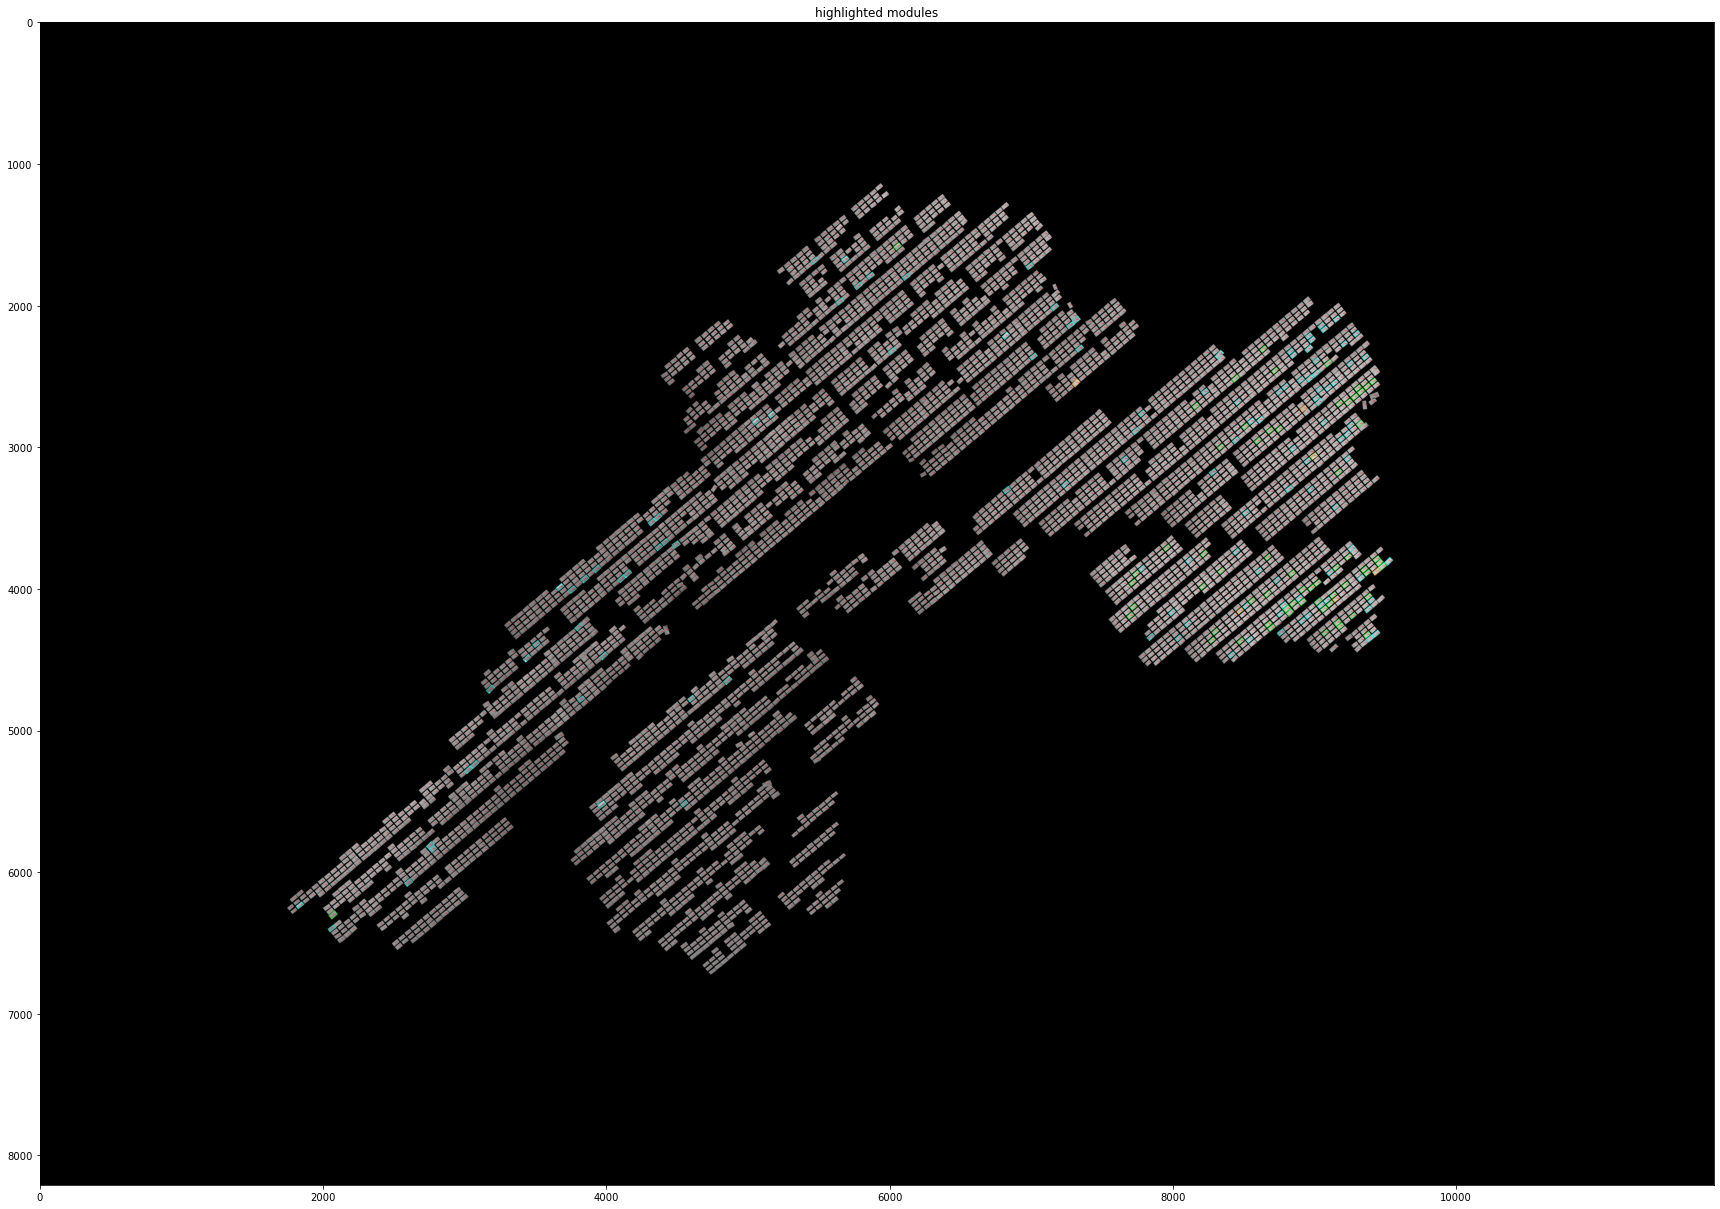

In [24]:
import copy
color_list = {
    "Single-Hotspot": (0,255,255), # aqua
    "Multi-Hotspots": (0,255,0), # green
    "Cluster-Anomaly": (255,255,0), # yellow
    "Module-Anomaly": (255,165,0), # orange
    "String-Anomaly": (238,130,238) # violet
}
img_target_index = copy.deepcopy(img_mask_index)
for k, v in anomaly_contours.items():
    if k in  ["Normal", "Junction-Box-Error"]:
        continue
    else:
        img_target_index = modules.get_img_target_contours(
            img_target_index, v, index=True, color=color_list[k])
utils.show_img(
    {"highlighted modules":img_target_index}, cmap="gray", figsize=(30,30)
)

In [25]:
img_write = cv2.cvtColor(img_target_index, cv2.COLOR_BGR2RGB)
cv2.imwrite(input_dir_path+'/img_target_index.png',img_write)

True

異常モジュールデータの保存

In [26]:
import json
with open(input_dir_path+"/anomaly_modules.json", "w") as f:
    json.dump(anomaly_modules, f, indent=4, sort_keys=True, separators=(',', ': '))